In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.utils import resample

2024-08-21 16:22:44.990830: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl7strings6StrCatB5cxx11ERKNS0_8AlphaNumES3_']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libt

In [2]:
dataset_path = '/kaggle/input/creditcardfraud/creditcard.csv'


In [3]:

data=pd.read_csv(dataset_path)

In [12]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Here V1, V2, ...... represent Dimensionality reduction through PCA.

In [5]:
data.shape

(284807, 31)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 284807 entries, 0 to 284806

Data columns (total 31 columns):

 #   Column  Non-Null Count   Dtype  

---  ------  --------------   -----  

 0   Time    284807 non-null  float64

 1   V1      284807 non-null  float64

 2   V2      284807 non-null  float64

 3   V3      284807 non-null  float64

 4   V4      284807 non-null  float64

 5   V5      284807 non-null  float64

 6   V6      284807 non-null  float64

 7   V7      284807 non-null  float64

 8   V8      284807 non-null  float64

 9   V9      284807 non-null  float64

 10  V10     284807 non-null  float64

 11  V11     284807 non-null  float64

 12  V12     284807 non-null  float64

 13  V13     284807 non-null  float64

 14  V14     284807 non-null  float64

 15  V15     284807 non-null  float64

 16  V16     284807 non-null  float64

 17  V17     284807 non-null  float64

 18  V18     284807 non-null  float64

 19  V19     284807 non-null  float64

 20  V20     284807 non-null

In [7]:
# Checking for null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data['Class'].value_counts() 

Class
0    284315
1       492
Name: count, dtype: int64

0 represents non-fraud entry, 1 represent a credit card fraud data
Here we can see that, there is so imbalance in the dataset

<Axes: xlabel='Class'>

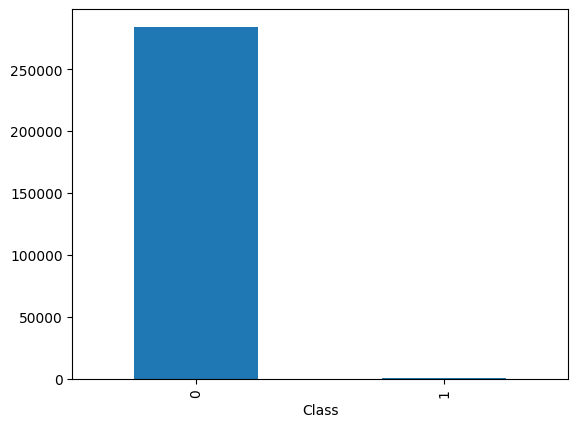

In [10]:
data['Class'].value_counts().plot.bar()

In [4]:
#Converting it into a X and Y
X = data.drop(columns = ['Class'], axis = 1)
Y = data['Class']
X.shape

(284807, 30)

In [7]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


# Using predefined library

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

In [5]:
# Normalize the feature data
def Normalization(X_train, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

In [10]:
X_train_scaled, X_test_scaled = Normalization(X_train, X_test)

In [11]:
X_train_scaled.shape

(227845, 30)

In [24]:
def create_model(X_train):
    model = Sequential([
        Dense(30, input_dim=X_train.shape[1], activation='relu'),
        Dense(13, activation='relu'),
        Dense(4, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    return model

In [13]:
model1 = create_model(X_train)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 13)             │           403 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,394 (5.45 KB)

 Trainable params: 1,394 (5.45 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model1.fit(X_train_scaled, y_train, epochs=5, batch_size= 16, validation_data=(X_test_scaled, y_test))


Epoch 1/5

14241/14241 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.9980 - loss: 0.0173 - val_accuracy: 0.9994 - val_loss: 0.0034

Epoch 2/5

14241/14241 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9994 - val_loss: 0.0031

Epoch 3/5

14241/14241 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9995 - val_loss: 0.0030

Epoch 4/5

14241/14241 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9995 - loss: 0.0028 - val_accuracy: 0.9995 - val_loss: 0.0031

Epoch 5/5

14241/14241 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9994 - loss: 0.0024 - val_accuracy: 0.9996 - val_loss: 0.0027


In [17]:

# Make predictions on the test data
def evaluation_metrices(X_test, y_test, model):
    y_pred = (model.predict(X_test) > 0.5).astype(int)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix =cm, display_labels =['True', 'Fake'])
    cm_display.plot()
    plt.tight_layout()
    plt.show()
    #visualizing the precision recall curve 

    precision, recall, thresholds = precision_recall_curve(y_pred, y_test)

    # create plot
    plt.plot(precision, recall, label='Precision-recall curve')
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Precision-recall curve')
    plt.legend(loc="lower left")


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Accuracy: 1.00

Classification Report:

              precision    recall  f1-score   support



           0       1.00      1.00      1.00     56872

           1       0.87      0.86      0.86        90



    accuracy                           1.00     56962

   macro avg       0.93      0.93      0.93     56962

weighted avg       1.00      1.00      1.00     56962



Confusion Matrix:

[[56860    12]

 [   13    77]]


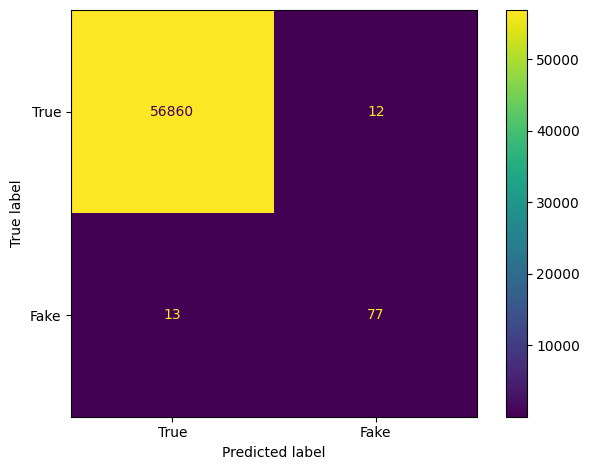

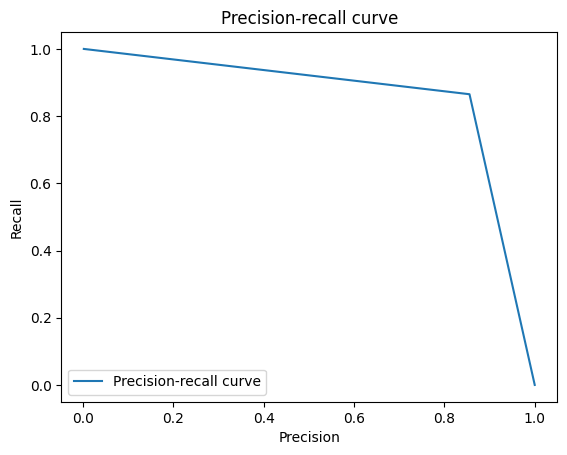

In [18]:
evaluation_metrices(X_test_scaled, y_test, model1)

 F1 Score is less, which represent this model as a bad classifier. The more the area under curve, more good is the model

# Using Upsampling to balance the dataset

In [35]:
# import resample module 

from sklearn.utils import resample


In [36]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [19]:
greater_data_df = data[data['Class'] == 0]
lesser_data_df = data[data['Class'] == 1]
print(greater_data_df.shape)
lesser_data_df.shape

(284315, 31)


(492, 31)

In [20]:
upsampled_df = resample(lesser_data_df, replace=True, n_samples=284315, random_state=12)


Class
1    284315
Name: count, dtype: int64

In [21]:
data_after_sampled = pd.concat([upsampled_df, greater_data_df])

In [22]:
data_after_sampled['Class'].value_counts()

Class
1    284315
0    284315
Name: count, dtype: int64

Training another model

In [23]:
data_after_sampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
153835,100298.0,-22.341889,15.536133,-22.865228,7.043374,-14.183129,-0.463145,-28.215112,-14.607791,-9.481456,...,-9.110423,4.158895,1.412928,0.382801,0.447154,-0.632816,-4.380154,-0.467863,1.00,1
55401,46925.0,-0.481531,1.059542,0.647117,0.905586,0.819368,-0.091184,0.504135,0.161064,-0.765054,...,0.070633,0.192491,-0.174659,-0.438908,0.239259,-0.217823,-0.072852,0.010463,1.00,1
204064,135095.0,0.232512,0.938944,-4.647780,3.079844,-1.902655,-1.041408,-1.020407,0.547069,-1.105990,...,0.911373,1.042929,0.999394,0.901260,-0.452093,0.192959,0.180859,-0.029315,345.00,1
123270,76867.0,1.082566,1.094862,-1.367020,2.012554,0.708142,-0.807712,0.151952,0.158353,0.009872,...,-0.325284,-0.734344,-0.106725,-0.224999,0.569167,-0.335033,0.089140,0.112337,1.00,1
114271,73408.0,-2.869795,1.335667,-1.009530,1.693885,-0.741480,-0.796773,-2.614242,1.066636,-1.135497,...,0.528421,0.228027,-0.749298,-0.067179,0.215792,-0.453651,0.349191,0.198862,16.48,1


In [24]:
len(data_after_sampled[data_after_sampled.duplicated()]) #because of oversampling

284904

In [26]:
X = data_after_sampled.drop(columns = ['Class'], axis = 1)
y = data_after_sampled['Class']

In [27]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=13)
# Normalize the feature data
X2_train_scaled, X2_test_scaled = Normalization(X2_train, X2_test)


In [30]:
model2 = create_model(X2_train)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 13)             │           403 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,394 (5.45 KB)

 Trainable params: 1,394 (5.45 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model2.fit(X2_train_scaled, y2_train, epochs=5, batch_size= 16, validation_data=(X2_test_scaled, y2_test))


Epoch 1/5

28432/28432 ━━━━━━━━━━━━━━━━━━━━ 59s 2ms/step - accuracy: 0.9725 - loss: 0.0790 - val_accuracy: 0.9983 - val_loss: 0.0092

Epoch 2/5

28432/28432 ━━━━━━━━━━━━━━━━━━━━ 55s 2ms/step - accuracy: 0.9967 - loss: 0.0128 - val_accuracy: 0.9955 - val_loss: 0.0142

Epoch 3/5

28432/28432 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - accuracy: 0.9977 - loss: 0.0088 - val_accuracy: 0.9986 - val_loss: 0.0055

Epoch 4/5

28432/28432 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - accuracy: 0.9983 - loss: 0.0066 - val_accuracy: 0.9993 - val_loss: 0.0039

Epoch 5/5

28432/28432 ━━━━━━━━━━━━━━━━━━━━ 55s 2ms/step - accuracy: 0.9984 - loss: 0.0066 - val_accuracy: 0.9993 - val_loss: 0.0041


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step

Accuracy: 1.00

Classification Report:

              precision    recall  f1-score   support



           0       1.00      1.00      1.00     56853

           1       1.00      1.00      1.00     56873



    accuracy                           1.00    113726

   macro avg       1.00      1.00      1.00    113726

weighted avg       1.00      1.00      1.00    113726



Confusion Matrix:

[[56768    85]

 [    0 56873]]


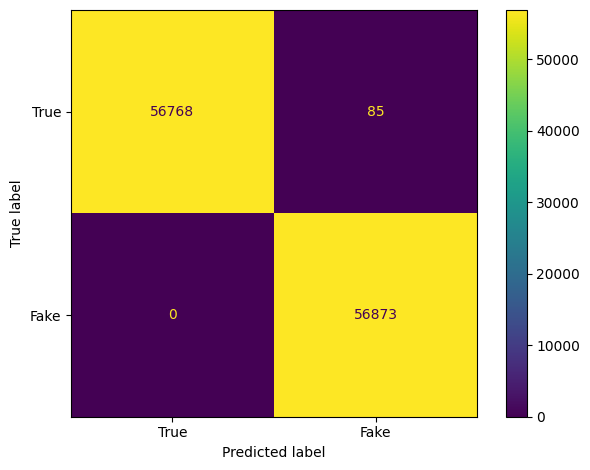

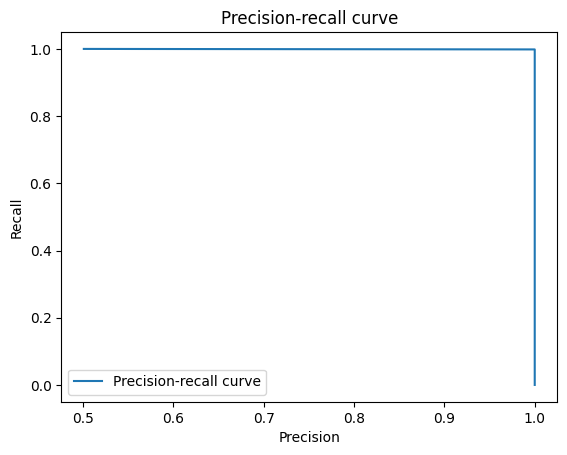

In [33]:
evaluation_metrices(X2_test_scaled, y2_test, model2)

We got an accuracy of 1 due to excessive repetative data during upsampling.

# Using downsampling

In [7]:
# import resample module 

from sklearn.utils import resample

In [6]:
greater_data_df = data[data['Class'] == 0]
lesser_data_df = data[data['Class'] == 1]
print(greater_data_df.shape)
lesser_data_df.shape

(284315, 31)


(492, 31)

In [7]:
undersampled_df = resample(greater_data_df, replace=True, n_samples=492, random_state=12)

In [8]:
data_after_sampled = pd.concat([undersampled_df, lesser_data_df])

In [9]:
data_after_sampled['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [10]:
X3 = data_after_sampled.drop(['Class'], axis = 1)
y3 = data_after_sampled['Class']

In [11]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=13)
# Normalize the feature data
X3_train_scaled, X3_test_scaled = Normalization(X3_train, X3_test)

In [25]:
model3 = create_model(X3_train)

In [26]:
# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model3.fit(X3_train_scaled, y3_train, epochs=20, batch_size= 8, validation_data=(X3_test_scaled, y3_test))


Epoch 1/20
99/99 [==============================] - 1s 5ms/step - loss: 0.5412 - accuracy: 0.7954 - val_loss: 0.3928 - val_accuracy: 0.8985
Epoch 2/20
99/99 [==============================] - 0s 3ms/step - loss: 0.3021 - accuracy: 0.9022 - val_loss: 0.2465 - val_accuracy: 0.9036
Epoch 3/20
99/99 [==============================] - 0s 3ms/step - loss: 0.2035 - accuracy: 0.9339 - val_loss: 0.2147 - val_accuracy: 0.9239
Epoch 4/20
99/99 [==============================] - 0s 3ms/step - loss: 0.1701 - accuracy: 0.9416 - val_loss: 0.2102 - val_accuracy: 0.9188
Epoch 5/20
99/99 [==============================] - 0s 3ms/step - loss: 0.1468 - accuracy: 0.9466 - val_loss: 0.2035 - val_accuracy: 0.9137
Epoch 6/20
99/99 [==============================] - 0s 3ms/step - loss: 0.1321 - accuracy: 0.9479 - val_loss: 0.2016 - val_accuracy: 0.9137
Epoch 7/20
99/99 [==============================] - 0s 3ms/step - loss: 0.1206 - accuracy: 0.9504 - val_loss: 0.2010 - val_accuracy: 0.9137
Epoch 8/20
99/99 [==

7/7 [==============================] - 0s 2ms/step
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        91
           1       0.95      0.91      0.93       106

    accuracy                           0.92       197
   macro avg       0.92      0.93      0.92       197
weighted avg       0.93      0.92      0.92       197

Confusion Matrix:
[[86  5]
 [10 96]]


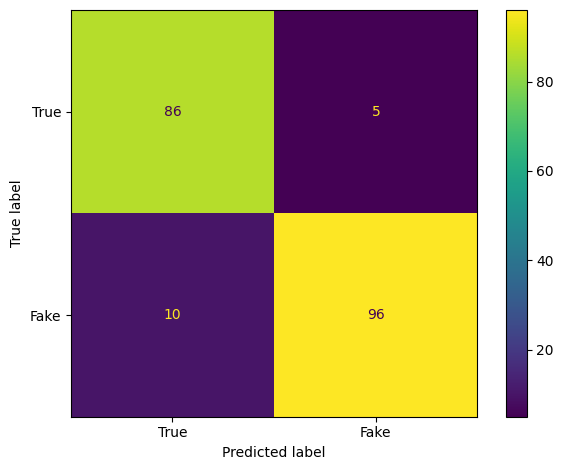

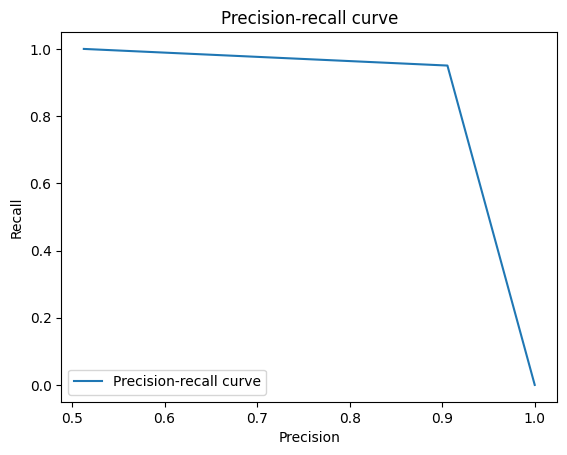

In [27]:
evaluation_metrices(X3_test_scaled, y3_test, model3)

Here, we can see we got a realistic model which have a good F1 score and high area under precision-recall curve.
1. Upsampling
    At first, I used upsampling to balance the data. But due to excessive repetative data, we got accuracy of 1 and the model is biased toward one direction. So, I have used another approach of Downsampling to balance the repetative data

2. Downsampling
    I have downsample the excessive biased data, and trained using a simple ANN model. I got an accuracy of 93%

# Using gradient descent from Scratch

In [57]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_cost(X, y, w, b, *argv):


    m, n = X.shape

    cost = 0.
    epsilon = 1e-15  # Small constant to avoid log(0) and division by zero

    for i in range(m-1):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        # Avoiding extreme values to prevent NaN issues
        f_wb_i = np.clip(f_wb_i, epsilon, 1 - epsilon)
        cost += - y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)

    total_cost = cost / m

    return total_cost


def compute_gradient(X, y, w, b, *argv):

    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        z_wb = np.dot(X[i], w) + b
        f_wb = sigmoid(z_wb)

        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i

        for j in range(n):
            dj_dw[j] += X[i, j] * dj_db_i

    dj_db /= m
    dj_dw /= m

    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):


    # number of training examples
    m = len(X)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=13)
X_train_scaled, X_test_scaled = Normalization(X_train, X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)



In [81]:
print(X_train.shape)
X_train_scaled.shape

(787, 30)


(787, 30)

In [82]:
## Initializing Weights and Biases

n_features = X_train_scaled.shape[1]
w = np.zeros(n_features)
b = 0


In [89]:
# Define hyperparameters
alpha = 0.01         # Learning rate
num_iters = 10000     # Number of iterations
lambda_ = 0          # Regularization parameter (if not used, keep it 0)

# Train the model
w_final, b_final, J_history, w_history = gradient_descent(
    X_train_scaled, y_train, w, b, compute_cost, compute_gradient, alpha, num_iters, lambda_
)


Iteration    0: Cost     0.68   

Iteration 1000: Cost     0.23   

Iteration 2000: Cost     0.20   

Iteration 3000: Cost     0.18   

Iteration 4000: Cost     0.17   

Iteration 5000: Cost     0.16   

Iteration 6000: Cost     0.15   

Iteration 7000: Cost     0.15   

Iteration 8000: Cost     0.14   

Iteration 9000: Cost     0.14   

Iteration 9999: Cost     0.14   


In [90]:
def predict(X, w, b):

    # number of training examples
    m, n = X.shape
    p = np.zeros(m)

    ### START CODE HERE ###
    # Loop over each example
    for i in range(m):
        z_wb = np.dot(X[i], w) + b  # Linear combination of features and weights
        f_wb = sigmoid(z_wb)  # Sigmoid function to get probabilities

        # Apply the threshold (0.5) to determine the class (0 or 1)
        p[i] = 1 if f_wb > 0.5 else 0

    ### END CODE HERE ###
    return p


In [93]:
## Training accuracy of the model
y_pred = predict(X_train_scaled, w_final,b_final)
accuracy = accuracy_score (y_train, y_pred)
print(f"Train Accuracy of the model is: {accuracy * 100}%")

#Testing accuracy of the model
y_pred = predict(X_test_scaled, w_final,b_final)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of the model is: {accuracy * 100}%")




Train Accuracy of the model is: 95.1715374841169%

Test Accuracy of the model is: 92.38578680203045%


Confusion Matrix:

[[88  3]

 [12 94]]


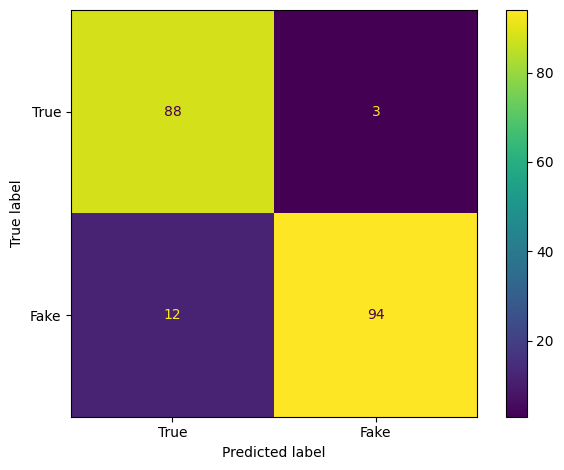

In [94]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix =cm, display_labels =['True', 'Fake'])
cm_display.plot()
plt.tight_layout()
plt.show()

By using this approach, we can update the weight and bias and train the data using gradient descent method. I get an accuracy of 92.38% with the downsampled datasets. 

# Hyperparameter tunning

In [13]:
!pip install -U scikit-learn==1.2.2 scikeras==0.10.0


In [18]:
!pip install sklearn-deap
!pip install tpot
%pip install scikeras
%pip install keras
%pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
Note: you may need to restart the kernel to use updated packages.


In [12]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV 
from keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy

In [19]:
%pip install "tensorflow<2.11"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 41.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 23.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:

In [21]:
def create_model_tunning(activation, learning_rate, optimizer = 'adam', **kwargs):
    # Create model
    model = Sequential([
    Dense(30, input_dim=X3_train_scaled.shape[1], activation=activation),
    Dense(13, activation=activation),
    Dense(4, activation=activation),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])    
    # Choose optimizer
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer}")

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
40/40 [==============================] - 1s 3ms/step - loss: 0.5807 - accuracy: 0.5278
Epoch 2/10
40/40 [==============================] - 1s 3ms/step - loss: 0.7225 - accuracy: 0.4651
Epoch 2/10
40/40 [==============================] - 1s 3ms/step - loss: 0.6110 - accuracy: 0.6057
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.4834 - accuracy: 0.8251
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.6589 - accuracy: 0.6317
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4947 - accuracy: 0.8521
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.3678 - accuracy: 0.8746
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.5504 - accuracy: 0.8032
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.4426 - accuracy: 0.8998
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.3858 - accu

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.1264 - accuracy: 0.9556
Epoch 1/10
40/40 [==============================] - 1s 2ms/step - loss: 0.5984 - accuracy: 0.6921
Epoch 2/10
40/40 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.8921
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.3236 - accuracy: 0.9000
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2396 - accuracy: 0.9190
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1893 - accuracy: 0.9444
Epoch 6/10
10/10 [==============================] - 0s 4ms/steposs: 0.1853 - accuracy: 0.9300


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.1646 - accuracy: 0.9476
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1492 - accuracy: 0.9492
Epoch 8/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1382 - accuracy: 0.9540
Epoch 9/10
40/40 [==============================] - 0s 2ms/step - loss: 0.1291 - accuracy: 0.9587
Epoch 10/10
40/40 [==============================] - 1s 3ms/step - loss: 0.5636 - accuracy: 0.8124
Epoch 2/10
16/40 [===========>..................] - ETA: 0s - loss: 0.4242 - accuracy: 0.9023

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
40/40 [==============================] - 0s 4ms/step - loss: 0.3788 - accuracy: 0.9046
Epoch 3/10
40/40 [==============================] - 0s 5ms/step - loss: 0.2768 - accuracy: 0.9221
Epoch 4/10
40/40 [==============================] - 1s 5ms/step - loss: 0.6116 - accuracy: 0.5866
Epoch 2/10
40/40 [==============================] - 0s 5ms/step - loss: 0.2268 - accuracy: 0.9332
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 0.4651 - accuracy: 0.8601
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1963 - accuracy: 0.9380
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.3673 - accuracy: 0.9062
Epoch 4/10
40/40 [==============================] - 1s 5ms/step - loss: 0.6564 - accuracy: 0.6810
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2775 - accuracy: 0.9205
Epoch 5/10
40/40 [==============================] - 0s 6ms/step - loss: 0.1742 - accuracy: 0.9412
Epoch 7/10
40/40 [==

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.1441 - accuracy: 0.9556
Epoch 8/10
40/40 [==============================] - 0s 3ms/step - loss: 0.3775 - accuracy: 0.8810
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1291 - accuracy: 0.9603
Epoch 9/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2787 - accuracy: 0.8937
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1158 - accuracy: 0.9603
Epoch 10/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2254 - accuracy: 0.9238
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1900 - accuracy: 0.9317
Epoch 6/10
40/40 [==============================] - 0s 2ms/step - loss: 0.1649 - accuracy: 0.9381
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1476 - accuracy: 0.9508
Epoch 8/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1322 - accuracy: 0.9524
Epoch 9/10
40/40 [============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 1s 3ms/step - loss: 0.7626 - accuracy: 0.5508
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.4987 - accuracy: 0.8222
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.3707 - accuracy: 0.8968
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2950 - accuracy: 0.9111
Epoch 5/10
 1/40 [..............................] - ETA: 0s - loss: 0.1639 - accuracy: 0.9375

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.2447 - accuracy: 0.9254
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2118 - accuracy: 0.9365
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1864 - accuracy: 0.9365
Epoch 8/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1662 - accuracy: 0.9429
Epoch 9/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1507 - accuracy: 0.9460
Epoch 10/10
40/40 [==============================] - 1s 4ms/step - loss: 0.3248 - accuracy: 0.8633
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1644 - accuracy: 0.9348
Epoch 3/10
 1/40 [..............................] - ETA: 41s - loss: 0.7458 - accuracy: 0.4375

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.1231 - accuracy: 0.9539
Epoch 4/10
40/40 [==============================] - 1s 3ms/step - loss: 0.3447 - accuracy: 0.8553
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1171 - accuracy: 0.9571
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1662 - accuracy: 0.9332
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1119 - accuracy: 0.9571
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1448 - accuracy: 0.9444
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0871 - accuracy: 0.9682
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1127 - accuracy: 0.9571
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0905 - accuracy: 0.9682
Epoch 8/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1108 - accuracy: 0.9603
Epoch 6/10
40/40 [=============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.2244 - accuracy: 0.9397
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0697 - accuracy: 0.9682
Epoch 10/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1268 - accuracy: 0.9540
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1084 - accuracy: 0.9667
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1130 - accuracy: 0.9587
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0931 - accuracy: 0.9619
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0832 - accuracy: 0.9651
Epoch 8/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0925 - accuracy: 0.9635
Epoch 9/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0930 - accuracy: 0.9603
Epoch 10/10
40/40 [==============================] - 1s 3ms/step - loss: 0.3078 - accuracy: 0.8857
Epoch 2/10
16/40 [===========

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.1551 - accuracy: 0.9302
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1497 - accuracy: 0.9413
Epoch 4/10
40/40 [==============================] - 0s 5ms/step - loss: 0.1275 - accuracy: 0.9524
Epoch 5/10
40/40 [==============================] - 0s 5ms/step - loss: 0.1006 - accuracy: 0.9698
Epoch 6/10
 1/40 [..............................] - ETA: 0s - loss: 0.0095 - accuracy: 1.0000

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0917 - accuracy: 0.9651
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0950 - accuracy: 0.9651
Epoch 8/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0694 - accuracy: 0.9730
Epoch 9/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9794
Epoch 10/10
40/40 [==============================] - 1s 3ms/step - loss: 0.4335 - accuracy: 0.8222
Epoch 2/10
 1/40 [..............................] - ETA: 0s - loss: 0.2642 - accuracy: 0.9375

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.3097 - accuracy: 0.9317
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2679 - accuracy: 0.9333
Epoch 4/10
40/40 [==============================] - 1s 4ms/step - loss: 0.3533 - accuracy: 0.8458
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2358 - accuracy: 0.9349
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1536 - accuracy: 0.9380
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1976 - accuracy: 0.9444
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1686 - accuracy: 0.9571
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1464 - accuracy: 0.9459
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1483 - accuracy: 0.9619
Epoch 8/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1289 - accuracy: 0.9491
Epoch 5/10
40/40 [=============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0912 - accuracy: 0.9666
Epoch 9/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0745 - accuracy: 0.9682
Epoch 10/10
40/40 [==============================] - 2s 5ms/step - loss: 0.3318 - accuracy: 0.8776
Epoch 2/10
27/40 [===================>..........] - ETA: 0s - loss: 0.1822 - accuracy: 0.9375

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.1601 - accuracy: 0.9459
Epoch 3/10
40/40 [==============================] - 0s 5ms/step - loss: 0.1303 - accuracy: 0.9555
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1335 - accuracy: 0.9539
Epoch 5/10
10/10 [==============================] - 1s 3ms/steposs: 0.3115 - accuracy: 0.875


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0994 - accuracy: 0.9587
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0984 - accuracy: 0.9682
Epoch 7/10
40/40 [==============================] - 1s 4ms/step - loss: 0.2999 - accuracy: 0.8873
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1611 - accuracy: 0.9397
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0864 - accuracy: 0.9634
Epoch 8/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1310 - accuracy: 0.9460
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0629 - accuracy: 0.9746
Epoch 10/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1155 - accuracy: 0.9571
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0850 - accuracy: 0.9682
Epoch 6/10
40/40 [==============================] - 1s 4ms/step - loss: 0.4664 - accuracy: 0.8397
Epoch 2/10
40/40 [============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.1035 - accuracy: 0.9635
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0916 - accuracy: 0.9635
Epoch 10/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0997 - accuracy: 0.9635
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0794 - accuracy: 0.9714
Epoch 7/10
40/40 [==============================] - 0s 2ms/step - loss: 0.1134 - accuracy: 0.9635
Epoch 8/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9714
Epoch 9/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9778
Epoch 10/10
40/40 [==============================] - 2s 3ms/step - loss: 0.3036 - accuracy: 0.8825
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1750 - accuracy: 0.9349
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1327 - accuracy: 0.9524
Epoch 4/10
18/40 [===========

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1101 - accuracy: 0.9556
Epoch 5/10
40/40 [==============================] - 1s 2ms/step - loss: 0.3394 - accuracy: 0.8601
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1055 - accuracy: 0.9603
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2780 - accuracy: 0.8983
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1211 - accuracy: 0.9587
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2789 - accuracy: 0.8983
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1140 - accuracy: 0.9571
Epoch 8/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0892 - accuracy: 0.9619
Epoch 5/10
Epoch 9/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2766 - accuracy: 0.8983
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0702 - accuracy: 0.9778
Epoch 10/

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 2ms/step - loss: 0.1659 - accuracy: 0.9396
Epoch 5/10
40/40 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.9491
Epoch 6/10
40/40 [==============================] - 0s 2ms/step - loss: 0.1248 - accuracy: 0.9507
Epoch 7/10
40/40 [==============================] - 0s 2ms/step - loss: 0.1180 - accuracy: 0.9555
Epoch 8/10
40/40 [==============================] - 0s 2ms/step - loss: 0.1137 - accuracy: 0.9603
Epoch 9/10
40/40 [==============================] - 0s 2ms/step - loss: 0.1642 - accuracy: 0.9587
Epoch 10/10
10/10 [==============================] - 0s 1ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
 1/40 [..............................] - ETA: 36s - loss: 0.7646 - accuracy: 0.5000

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 1s 2ms/step - loss: 0.3137 - accuracy: 0.8889
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2516 - accuracy: 0.9127
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2367 - accuracy: 0.9190
Epoch 4/10
10/10 [==============================] - 0s 2ms/steposs: 0.2206 - accuracy: 0.9112


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.2061 - accuracy: 0.9238
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1937 - accuracy: 0.9302
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1659 - accuracy: 0.9381
Epoch 7/10
40/40 [==============================] - 1s 4ms/step - loss: 0.2992 - accuracy: 0.8730
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1550 - accuracy: 0.9429
Epoch 8/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2005 - accuracy: 0.9143
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2858 - accuracy: 0.9365
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1445 - accuracy: 0.9444
Epoch 9/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1237 - accuracy: 0.9508
Epoch 10/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2024 - accuracy: 0.8984
Epoch 6/10
40/40 [============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 2ms/step - loss: 0.2893 - accuracy: 0.8919
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2511 - accuracy: 0.9063
Epoch 9/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2890 - accuracy: 0.8919
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2430 - accuracy: 0.9317
Epoch 10/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2872 - accuracy: 0.8919
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2889 - accuracy: 0.8919
Epoch 8/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2882 - accuracy: 0.8919
Epoch 9/10
 1/10 [==>...........................] - ETA: 1s - loss: 0.3108 - accuracy: 0.8824

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.2888 - accuracy: 0.8919
Epoch 10/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2897 - accuracy: 0.8919
Epoch 1/10
10/10 [==============================] - 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 1s 3ms/step - loss: 0.3427 - accuracy: 0.8983
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.3594 - accuracy: 0.8839
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2963 - accuracy: 0.8935
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2930 - accuracy: 0.8887
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2928 - accuracy: 0.8887
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2935 - accuracy: 0.8887
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2937 - accuracy: 0.8887
Epoch 8/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1766 - accuracy: 0.9381
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2938 - accuracy: 0.8887
Epoch 9/10
40/40 [==============================] - 1s 4ms/step - loss: 0.3795 - accuracy: 0.8857
Epoch 2/10
40/40 [=============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 1ms/step
Epoch 1/50
10/10 [==============================] - 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/50
Epoch 1/50
40/40 [==============================] - 1s 3ms/step - loss: 0.5417 - accuracy: 0.7377
Epoch 2/50
 1/40 [..............................] - ETA: 0s - loss: 0.4031 - accuracy: 0.8750

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.3549 - accuracy: 0.8919
Epoch 3/50
40/40 [==============================] - 1s 4ms/step - loss: 0.6681 - accuracy: 0.6698
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.5853 - accuracy: 0.7873
Epoch 3/50
40/40 [==============================] - 1s 4ms/step - loss: 0.6129 - accuracy: 0.7838
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1979 - accuracy: 0.9380
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.5336 - accuracy: 0.8333
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.4317 - accuracy: 0.8824
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4958 - accuracy: 0.8571
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1658 - accuracy: 0.9475
Epoch 6/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2971 - accuracy: 0.9030
Epoch 4/50
40/40 [=============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9984
Epoch 50/50
40/40 [==============================] - 1s 2ms/step - loss: 0.5831 - accuracy: 0.5063
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.7968
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.8984
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.9238
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2859 - accuracy: 0.9317
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2173 - accuracy: 0.9302
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1775 - accuracy: 0.9429
Epoch 8/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9492
Epoch 9/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1433 - accuracy: 0.9556
Epoch 10/50
40/40 [

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0878 - accuracy: 0.9698
Epoch 19/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 0.9683
Epoch 20/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0824 - accuracy: 0.9730
Epoch 21/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0803 - accuracy: 0.9698
Epoch 22/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0765 - accuracy: 0.9746
Epoch 23/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.9730
Epoch 24/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.9730
Epoch 25/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0738 - accuracy: 0.9778
Epoch 26/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0692 - accuracy: 0.9746
Epoch 27/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9794
Epoch 28/50
40/40 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 5ms/step - loss: 0.0534 - accuracy: 0.9825
Epoch 34/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2662 - accuracy: 0.9285
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2765 - accuracy: 0.9141
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0512 - accuracy: 0.9825
Epoch 35/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2116 - accuracy: 0.9364
Epoch 6/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2263 - accuracy: 0.9285
Epoch 6/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1792 - accuracy: 0.9459
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0478 - accuracy: 0.9810
Epoch 37/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1567 - accuracy: 0.9475
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 0.9841
Epoch 38/50
40/40 [=========

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9905
Epoch 39/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9968
Epoch 40/50
 1/40 [..............................] - ETA: 0s - loss: 0.0060 - accuracy: 1.0000

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9968
Epoch 41/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9984
Epoch 42/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9984
Epoch 43/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0212 - accuracy: 0.9937
Epoch 44/50
26/40 [==================>...........] - ETA: 0s - loss: 0.0142 - accuracy: 1.0000

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0213 - accuracy: 0.9968
Epoch 45/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0189 - accuracy: 0.9984
Epoch 46/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0182 - accuracy: 0.9968
Epoch 47/50
40/40 [==============================] - 1s 4ms/step - loss: 0.5647 - accuracy: 0.6794
Epoch 48/50
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9984
Epoch 49/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.8651
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9984
Epoch 50/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4366 - accuracy: 0.9048
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.4085 - accuracy: 0.9238
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3864 - accuracy: 0.9429
Epoch 6/50
40/

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0670 - accuracy: 0.9825
Epoch 30/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9825
Epoch 30/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1574 - accuracy: 0.9873
Epoch 37/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1801 - accuracy: 0.9587
Epoch 31/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0502 - accuracy: 0.9841
Epoch 31/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1550 - accuracy: 0.9873
Epoch 38/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0654 - accuracy: 0.9746
Epoch 32/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1505 - accuracy: 0.9889
Epoch 39/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0482 - accuracy: 0.9841
Epoch 32/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0355 - accuracy: 0.9905
Epoch 33/50
40/40 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 2ms/step - loss: 0.0548 - accuracy: 0.9841
Epoch 19/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9762
Epoch 20/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9936
Epoch 21/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.9921
Epoch 22/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9889
Epoch 23/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9873
Epoch 24/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9952
Epoch 25/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9921
Epoch 26/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.9921
Epoch 27/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9952
Epoch 28/50
40/40 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 2ms/step - loss: 0.0136 - accuracy: 0.9984
Epoch 45/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9873
Epoch 19/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 0.9984
Epoch 46/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9825
Epoch 20/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9984
Epoch 47/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9889
Epoch 21/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9984
Epoch 48/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9921
Epoch 22/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9984
Epoch 49/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9905
Epoch 23/50
40/40 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 1s 3ms/step - loss: 0.2794 - accuracy: 0.8937
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9841
Epoch 29/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1457 - accuracy: 0.9476
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9937
Epoch 30/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1478 - accuracy: 0.9476
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0112 - accuracy: 0.9968
Epoch 31/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1070 - accuracy: 0.9587
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 32/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1054 - accuracy: 0.9619
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9937
Epoch 33/50
40/40 [========

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9921
Epoch 27/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9952
Epoch 40/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9921
Epoch 28/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9952
Epoch 41/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0232 - accuracy: 0.9921
Epoch 29/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9984
Epoch 42/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9921
Epoch 30/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9905
Epoch 43/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9921
Epoch 31/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9937
Epoch 44/50
40/40 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9841
Epoch 21/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9825
Epoch 22/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9873
Epoch 23/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9936
Epoch 24/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0357 - accuracy: 0.9825
Epoch 25/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1034 - accuracy: 0.9762
Epoch 26/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0885 - accuracy: 0.9762
Epoch 27/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0645 - accuracy: 0.9793
Epoch 28/50
40/40 [==============================] - 1s 3ms/step - loss: 0.5059 - accuracy: 0.8299
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9857
Epoch 29/50
40/40 [====

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0311 - accuracy: 0.9905
Epoch 42/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1231 - accuracy: 0.9683
Epoch 13/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0195 - accuracy: 0.9952
Epoch 43/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0907 - accuracy: 0.9746
Epoch 14/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0700 - accuracy: 0.9809
Epoch 17/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0671 - accuracy: 0.9825
Epoch 18/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1199 - accuracy: 0.9555
Epoch 19/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 16/50
Epoch 45/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0581 - accuracy: 0.9857
Epoch 20/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 46/5

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 29/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 47/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 48/50
Epoch 30/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 49/50
40/40 [==============================] - 0s 3ms/step - loss: 9.2995e-04 - accuracy: 1.0000
Epoch 31/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 32/50
Epoch 50/50
40/40 [==============================] - 0s 2ms/step - loss: 5.4866e-04 - accuracy: 1.0000
Epoch 33/50
40/40 [==============================] - 0s 3ms/step - loss: 4.8856e-04 - accuracy: 1.0000
Epoch 34/50
40/40 [==============================] - 0s 2ms/step - loss: 4.2011e-04 - accuracy: 1.0000
Epoch 35/50
40/40 [==============================] - 0s 3ms/step - loss: 3.4425e-

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/50
40/40 [==============================] - 0s 3ms/step - loss: 2.6514e-04 - accuracy: 1.0000
Epoch 38/50
40/40 [==============================] - 1s 3ms/step - loss: 0.2821 - accuracy: 0.8873
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 2.3700e-04 - accuracy: 1.0000
Epoch 39/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1849 - accuracy: 0.9381
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 2.2093e-04 - accuracy: 1.0000
Epoch 40/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1389 - accuracy: 0.9476
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 2.0198e-04 - accuracy: 1.0000
Epoch 41/50
40/40 [==============================] - 0s 3ms/step - loss: 1.8380e-04 - accuracy: 1.0000
Epoch 42/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 0.9556
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 1.6495e-04 - accuracy

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0636 - accuracy: 0.9698
Epoch 17/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2864 - accuracy: 0.8935
Epoch 10/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9794
Epoch 18/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2855 - accuracy: 0.8935
Epoch 11/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9857
Epoch 19/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2855 - accuracy: 0.8935
Epoch 12/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9921
Epoch 20/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2846 - accuracy: 0.8935
Epoch 13/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.9857
Epoch 21/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2865 - accuracy: 0.8935
Epoch 14/50
40/40 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.2108 - accuracy: 0.9332
Epoch 3/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2876 - accuracy: 0.8935
Epoch 20/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0417 - accuracy: 0.9873
Epoch 28/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1773 - accuracy: 0.9332
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9905
Epoch 29/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2861 - accuracy: 0.8935
Epoch 21/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1353 - accuracy: 0.9444
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9889
Epoch 30/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2846 - accuracy: 0.8935
Epoch 22/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1557 - accuracy: 0.9412
Epoch 6/50
40/40 [=======

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0772 - accuracy: 0.9730
Epoch 37/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1001 - accuracy: 0.9555
Epoch 38/50
Epoch 1/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1632 - accuracy: 0.9524
Epoch 29/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3288 - accuracy: 0.8521
Epoch 39/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1643 - accuracy: 0.9524
Epoch 30/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2545 - accuracy: 0.9126
Epoch 40/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1633 - accuracy: 0.9524
Epoch 31/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2348 - accuracy: 0.9205
Epoch 41/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1642 - accuracy: 0.9524
Epoch 32/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2311 - accuracy: 0.9221
Epoch 42/50

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.1639 - accuracy: 0.9524
Epoch 44/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1789 - accuracy: 0.9444
Epoch 10/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1667 - accuracy: 0.9524
Epoch 45/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1465 - accuracy: 0.9333
Epoch 11/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1374 - accuracy: 0.9476
Epoch 46/50
Epoch 12/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1633 - accuracy: 0.9524
Epoch 47/50
40/40 [==============================] - 0s 3ms/step - loss: 0.7173 - accuracy: 0.9397
Epoch 13/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1634 - accuracy: 0.9524
Epoch 48/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1648 - accuracy: 0.9524
Epoch 49/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3870 - accuracy: 0.8524
Epoch 15/5

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 1s 5ms/step - loss: 0.3224 - accuracy: 0.8951
Epoch 2/50
40/40 [==============================] - 1s 5ms/step - loss: 0.3047 - accuracy: 0.8905
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3678 - accuracy: 0.9143
Epoch 20/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2279 - accuracy: 0.9253
Epoch 3/50
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1726 - accuracy: 0.9349
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2073 - accuracy: 0.9316
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1611 - accuracy: 0.9492
Epoch 21/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1588 - accuracy: 0.9365
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1548 - accuracy: 0.9380
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.4869 - accuracy: 0.9270
Epoch 22/50
40/40 

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.4363 - accuracy: 0.8651
Epoch 39/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2510 - accuracy: 0.9157
Epoch 41/50
40/40 [==============================] - 0s 5ms/step - loss: 0.6955 - accuracy: 0.5103
Epoch 29/50
40/40 [==============================] - 0s 6ms/step - loss: 0.2535 - accuracy: 0.9157
Epoch 42/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1776 - accuracy: 0.9111
Epoch 41/50
40/40 [==============================] - 0s 7ms/step - loss: 0.6956 - accuracy: 0.5246
Epoch 30/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1541 - accuracy: 0.9444
Epoch 42/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2522 - accuracy: 0.9157
Epoch 44/50
40/40 [==============================] - 0s 6ms/step - loss: 0.7004 - accuracy: 0.4960
Epoch 31/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2505 - accuracy: 0.9157
Epoch 45/50
40/40 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.2220 - accuracy: 0.8857
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4944
Epoch 42/50
Epoch 1/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1788 - accuracy: 0.9508
Epoch 8/50
40/40 [==============================] - 0s 4ms/step - loss: 0.6994 - accuracy: 0.4595
Epoch 43/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1291 - accuracy: 0.9444
Epoch 9/50
40/40 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.5072
Epoch 44/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1102 - accuracy: 0.9587
Epoch 10/50
40/40 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4976
Epoch 45/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1254 - accuracy: 0.9556
Epoch 11/50
40/40 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.4976
Epoch 46/50
40

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.3593 - accuracy: 0.8508
Epoch 21/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2904 - accuracy: 0.9317
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3563 - accuracy: 0.8508
Epoch 22/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2036 - accuracy: 0.9238
Epoch 7/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3536 - accuracy: 0.8508
Epoch 23/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2147 - accuracy: 0.9540
Epoch 8/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3536 - accuracy: 0.8508
Epoch 24/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2077 - accuracy: 0.9286
Epoch 9/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3583 - accuracy: 0.8508
Epoch 25/50
32/40 [=======================>......] - ETA: 0s - loss: 0.1834 - accuracy: 0.9414

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.1896 - accuracy: 0.9381
Epoch 10/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3578 - accuracy: 0.8508
Epoch 26/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1830 - accuracy: 0.9302
Epoch 11/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3553 - accuracy: 0.8508
Epoch 27/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2154 - accuracy: 0.9381
Epoch 12/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3544 - accuracy: 0.8508
Epoch 28/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1928 - accuracy: 0.9492
Epoch 13/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3570 - accuracy: 0.8508
Epoch 29/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1177 - accuracy: 0.9635
Epoch 14/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3532 - accuracy: 0.8508
Epoch 30/50
40/40 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.2554 - accuracy: 0.9095
Epoch 37/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9873
Epoch 36/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2576 - accuracy: 0.9095
Epoch 38/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2574 - accuracy: 0.9095
Epoch 39/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9889
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9873
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.9889
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2591 - accuracy: 0.9095
Epoch 41/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9873
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2583 - accuracy: 0.9095
Epoch 42/50
40/40

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.1802 - accuracy: 0.9412
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9984
Epoch 50/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1550 - accuracy: 0.9491
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1423 - accuracy: 0.9491
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9968
Epoch 52/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1302 - accuracy: 0.9539
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9984
Epoch 53/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1240 - accuracy: 0.9571
Epoch 11/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9968
Epoch 54/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1158 - accuracy: 0.9555
Epoch 12/100
40/

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 0.9873
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 78/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0909 - accuracy: 0.9730
Epoch 21/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9873
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 79/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0853 - accuracy: 0.9714
Epoch 22/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0477 - accuracy: 0.9857
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 80/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0844 - accuracy: 0.9746
Epoch 23/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0446 - accuracy: 0.9873
Epoch 37/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 74/100
Epoch 1/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 75/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 76/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 77/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 78/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 79/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 80/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 81/100
40/40 [==============================] - 1s 3ms/step - loss: 0.6881 - accuracy: 0.5930
Epoch 2/100
40/40 [==============================] - 1s 3ms/step - loss: 0.5590 - accuracy: 0.6000
Ep

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 2ms/step - loss: 0.2261 - accuracy: 0.9793
Epoch 27/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2212 - accuracy: 0.9746
Epoch 28/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 0.9794
Epoch 27/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0591 - accuracy: 0.9810
Epoch 28/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2093 - accuracy: 0.9809
Epoch 30/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0525 - accuracy: 0.9857
Epoch 29/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2046 - accuracy: 0.9825
Epoch 31/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 0.9857
Epoch 30/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2010 - accuracy: 0.9777
Epoch 32/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9889
Epoch 31/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 6ms/step - loss: 0.0400 - accuracy: 0.9889
Epoch 5/100
Epoch 38/100
40/40 [==============================] - 0s 7ms/step - loss: 0.1595 - accuracy: 0.9841
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2805 - accuracy: 0.9269
Epoch 6/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0381 - accuracy: 0.9889
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2261 - accuracy: 0.9412
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0376 - accuracy: 0.9905
Epoch 40/100
40/40 [==============================] - 0s 5ms/step - loss: 0.1891 - accuracy: 0.9459
Epoch 8/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0372 - accuracy: 0.9905
Epoch 41/100
40/40 [==============================] - 0s 6ms/step - loss: 0.1512 - accuracy: 0.9857
Epoch 43/100
40/40 [==============================] - 0s 5ms/step - loss: 0.1648 - accuracy: 0.9475
Epoc

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9984
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0551 - accuracy: 0.9762
Epoch 45/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9968
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.9810
Epoch 46/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9984
Epoch 69/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9841
Epoch 47/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9984
Epoch 70/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9984
Epoch 71/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9984
Epoch 72/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9825
Epoch 49/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9952
Epoch 81/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0400 - accuracy: 0.9857
Epoch 34/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9952
Epoch 82/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9873
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9952
Epoch 83/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9873
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9905
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0345 - accuracy: 0.9857
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0183 - accuracy: 0.9952
Epoch 85/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0309 - accuracy: 0.9921
Epoch 39/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0292 - accuracy: 0.9905
Epoch 87/100
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9952
Epoch 1/100
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0179 - accuracy: 0.9952
Epoch 88/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0290 - accuracy: 0.9905
Epoch 42/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9937
Epoch 43/100
40/40 [==============================] - 0s 4ms/step - loss: 0.5515 - accuracy: 0.8476
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0175 - accuracy: 0.9952
Epoch 90/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9921
Epoch 44/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4237 - accuracy: 0.8905
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0159 - accurac

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0561 - accuracy: 0.9809
Epoch 43/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9984
Epoch 63/100
18/40 [============>.................] - ETA: 0s - loss: 0.0092 - accuracy: 1.0000

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0490 - accuracy: 0.9825
Epoch 64/100
Epoch 44/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9968
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0383 - accuracy: 0.9873
Epoch 45/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0273 - accuracy: 0.9952
Epoch 46/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0099 - accuracy: 0.9984
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0286 - accuracy: 0.9936
Epoch 47/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9968
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0248 - accuracy: 0.9952
Epoch 48/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0093 - accuracy: 0.9968
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0222 - accuracy: 0.9968


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 1.3885e-04 - accuracy: 1.0000
Epoch 55/100
40/40 [==============================] - 0s 3ms/step - loss: 4.8047e-04 - accuracy: 1.0000
Epoch 46/100
40/40 [==============================] - 0s 4ms/step - loss: 1.2826e-04 - accuracy: 1.0000
Epoch 56/100
40/40 [==============================] - 0s 4ms/step - loss: 4.1641e-04 - accuracy: 1.0000
Epoch 47/100
40/40 [==============================] - 0s 4ms/step - loss: 1.2004e-04 - accuracy: 1.0000
Epoch 57/100
40/40 [==============================] - 0s 3ms/step - loss: 3.6556e-04 - accuracy: 1.0000
Epoch 48/100
40/40 [==============================] - 0s 4ms/step - loss: 1.1251e-04 - accuracy: 1.0000
Epoch 58/100
40/40 [==============================] - 0s 3ms/step - loss: 3.3405e-04 - accuracy: 1.0000
Epoch 49/100
40/40 [==============================] - 0s 3ms/step - loss: 1.0663e-04 - accuracy: 1.0000
Epoch 59/100
40/40 [==============================] - 0s 3ms/step - loss: 3.0

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0555 - accuracy: 0.9762
Epoch 12/100
40/40 [==============================] - 0s 3ms/step - loss: 3.5819e-05 - accuracy: 1.0000
Epoch 77/100
40/40 [==============================] - 0s 4ms/step - loss: 9.0648e-05 - accuracy: 1.0000
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 3.4856e-05 - accuracy: 1.0000
Epoch 78/100
40/40 [==============================] - 0s 4ms/step - loss: 8.5611e-05 - accuracy: 1.0000
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 3.2669e-05 - accuracy: 1.0000
Epoch 79/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0440 - accuracy: 0.9825
Epoch 14/100
40/40 [==============================] - 0s 4ms/step - loss: 8.0947e-05 - accuracy: 1.0000
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 3.0667e-05 - accuracy: 1.0000
Epoch 80/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0383 - ac

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9794
Epoch 21/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.9984
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 2.9458e-05 - accuracy: 1.0000
Epoch 93/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 0.9984
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9889
Epoch 23/100
40/40 [==============================] - 0s 4ms/step - loss: 2.8333e-05 - accuracy: 1.0000
Epoch 94/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 0.9984
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0203 - accuracy: 0.9952
Epoch 24/100
40/40 [==============================] - 0s 6ms/step - loss: 2.7332e-05 - accuracy: 1.0000
Epoch 95/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0034 - accuracy: 0.9984
E

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 1.2368e-04 - accuracy: 1.0000
Epoch 49/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1440 - accuracy: 0.9444
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.9984
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 9.9399e-05 - accuracy: 1.0000
Epoch 50/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1214 - accuracy: 0.9539
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 7.6977e-05 - accuracy: 1.0000
Epoch 51/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0908 - accuracy: 0.9746
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 7.1642e-05 - accuracy: 1.0000


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.1591 - accuracy: 0.9539
Epoch 47/100
40/40 [==============================] - 0s 4ms/step - loss: 8.5911e-05 - accuracy: 1.0000
Epoch 59/100
40/40 [==============================] - 0s 4ms/step - loss: 4.0889e-05 - accuracy: 1.0000
Epoch 90/100
40/40 [==============================] - 0s 4ms/step - loss: 7.9252e-05 - accuracy: 1.0000
Epoch 60/100
40/40 [==============================] - 0s 4ms/step - loss: 3.9977e-05 - accuracy: 1.0000
Epoch 91/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1591 - accuracy: 0.9539
Epoch 49/100
40/40 [==============================] - 0s 5ms/step - loss: 7.4363e-05 - accuracy: 1.0000
Epoch 61/100
40/40 [==============================] - 0s 4ms/step - loss: 3.7852e-05 - accuracy: 1.0000
Epoch 92/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1591 - accuracy: 0.9539
Epoch 50/100
40/40 [==============================] - 0s 4ms/step - loss: 6.9787e-05 - ac

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.1183 - accuracy: 0.9619
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 3.9707e-05 - accuracy: 1.0000
Epoch 72/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1590 - accuracy: 0.9539
Epoch 61/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1097 - accuracy: 0.9571
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 3.8239e-05 - accuracy: 1.0000
Epoch 73/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1595 - accuracy: 0.9539
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0963 - accuracy: 0.9635
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 3.5967e-05 - accuracy: 1.0000
Epoch 63/100
Epoch 74/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0927 - accuracy: 0.9683
Epoch 8/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1591 - accuracy:

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 8.7927e-04 - accuracy: 1.0000
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1611 - accuracy: 0.9523
Epoch 94/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2112 - accuracy: 0.9540
Epoch 29/100
40/40 [==============================] - 0s 4ms/step - loss: 7.2261e-04 - accuracy: 1.0000
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1619 - accuracy: 0.9523
Epoch 95/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0609 - accuracy: 0.9810
Epoch 30/100
40/40 [==============================] - 0s 4ms/step - loss: 5.5957e-04 - accuracy: 1.0000
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1602 - accuracy: 0.9539
Epoch 96/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0389 - accuracy: 0.9905
Epoch 31/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1598 - accuracy: 0.9539
E

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2686 - accuracy: 0.9333
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 1.2969e-04 - accuracy: 1.0000
Epoch 48/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2408 - accuracy: 0.9365
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 1.1852e-04 - accuracy: 1.0000
Epoch 49/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2157 - accuracy: 0.9444
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 1.1237e-04 - accuracy: 1.0000
Epoch 50/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000
Epoc

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 5ms/step - loss: 0.6986 - accuracy: 0.4277
Epoch 47/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0291 - accuracy: 0.9952
Epoch 57/100
40/40 [==============================] - 0s 4ms/step - loss: 1.3397e-05 - accuracy: 1.0000
Epoch 97/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6968 - accuracy: 0.5040
Epoch 48/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0294 - accuracy: 0.9952
Epoch 58/100
40/40 [==============================] - 0s 4ms/step - loss: 1.3046e-05 - accuracy: 1.0000
Epoch 98/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6969 - accuracy: 0.4722
Epoch 49/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0283 - accuracy: 0.9952
Epoch 59/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6957 - accuracy: 0.4706
Epoch 50/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0280 - accuracy: 0.9952
Epoch

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5072
Epoch 54/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0276 - accuracy: 0.9952
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.5119
Epoch 55/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0275 - accuracy: 0.9952
Epoch 65/100
40/40 [==============================] - 1s 4ms/step - loss: 0.3075 - accuracy: 0.8951
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6993 - accuracy: 0.4928
Epoch 66/100
Epoch 56/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6971 - accuracy: 0.4817
Epoch 67/100
Epoch 57/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2135 - accuracy: 0.9428
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6985 - accuracy: 0.4785
Epoch 58/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6952 - accura

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.2988 - accuracy: 0.8857
Epoch 48/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2842 - accuracy: 0.8951
Epoch 53/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2999 - accuracy: 0.8857
Epoch 49/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2827 - accuracy: 0.8951
Epoch 54/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2979 - accuracy: 0.8857
Epoch 50/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2846 - accuracy: 0.8951
Epoch 55/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2985 - accuracy: 0.8857
Epoch 51/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2827 - accuracy: 0.8951
Epoch 56/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2973 - accuracy: 0.8857
Epoch 52/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2828 - accuracy: 0.8951
Epoch 57/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.2978 - accuracy: 0.8857
Epoch 61/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2827 - accuracy: 0.8951
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1643 - accuracy: 0.9460
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3007 - accuracy: 0.8857
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2860 - accuracy: 0.8951
Epoch 66/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2908 - accuracy: 0.9238
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1793 - accuracy: 0.9365
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2977 - accuracy: 0.8857
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2823 - accuracy: 0.8951
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1574 - accuracy: 0.9556
Epoch 8/100
40/4

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9952
Epoch 42/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2437 - accuracy: 0.9159
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0224 - accuracy: 0.9952
Epoch 43/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2436 - accuracy: 0.9159
Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9952
Epoch 44/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2447 - accuracy: 0.9159
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2441 - accuracy: 0.9159
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9952
Epoch 46/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2455 - accuracy: 0.9159
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9952
Epoch 47/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0225 - accuracy: 0.9952
Epoch 84/100
40/40 [==============================] - 0s 4ms/step - loss: 0.7006 - accuracy: 0.4928
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2436 - accuracy: 0.9159
Epoch 74/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0223 - accuracy: 0.9952
Epoch 85/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.5135
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2443 - accuracy: 0.9159
Epoch 75/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0226 - accuracy: 0.9952
Epoch 86/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2456 - accuracy: 0.9159
Epoch 76/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6982 - accuracy: 0.4626
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0225 - accuracy: 0.9952
Epoch 87/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.2748 - accuracy: 0.8998
Epoch 25/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.4944
Epoch 70/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2759 - accuracy: 0.8998
Epoch 26/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5119
Epoch 71/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2747 - accuracy: 0.8998
Epoch 27/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.4992
Epoch 72/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2745 - accuracy: 0.8998
Epoch 28/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.4595
Epoch 73/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2763 - accuracy: 0.8998
Epoch 29/100
40/40 [==============================] - 0s 3ms/step - loss: 0.7025 - accuracy: 0.4976
Epoch 74/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.4817
Epoch 92/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2745 - accuracy: 0.8998
Epoch 48/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3006 - accuracy: 0.8841
Epoch 15/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.4706
Epoch 93/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2733 - accuracy: 0.8998
Epoch 49/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3018 - accuracy: 0.8841
Epoch 16/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.4976
Epoch 94/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2738 - accuracy: 0.8998
Epoch 50/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3008 - accuracy: 0.8841
Epoch 17/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6975 - accuracy: 0.4817
Epoch 95/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.3016 - accuracy: 0.8841
Epoch 71/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2958 - accuracy: 0.8873
Epoch 52/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3043 - accuracy: 0.8841
Epoch 72/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2957 - accuracy: 0.8873
Epoch 53/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3017 - accuracy: 0.8841
Epoch 73/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2961 - accuracy: 0.8873
Epoch 54/100
 1/40 [..............................] - ETA: 0s - loss: 0.3010 - accuracy: 0.8750

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.3035 - accuracy: 0.8841
Epoch 74/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2971 - accuracy: 0.8873
Epoch 55/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3036 - accuracy: 0.8841
Epoch 75/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2963 - accuracy: 0.8873
Epoch 56/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3030 - accuracy: 0.8841
Epoch 76/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2959 - accuracy: 0.8873
Epoch 57/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3009 - accuracy: 0.8841
Epoch 77/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2963 - accuracy: 0.8873
Epoch 58/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3014 - accuracy: 0.8841
Epoch 78/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2960 - accuracy: 0.8873
Epoch 59/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.2961 - accuracy: 0.8873
Epoch 74/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2362 - accuracy: 0.8968
Epoch 16/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3029 - accuracy: 0.8841
Epoch 95/100
14/40 [=========>....................] - ETA: 0s - loss: 0.1937 - accuracy: 0.9018Epoch 75/100
Epoch 1/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1665 - accuracy: 0.9063
Epoch 17/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3019 - accuracy: 0.8841
Epoch 96/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1823 - accuracy: 0.9413
Epoch 18/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3030 - accuracy: 0.8841
Epoch 97/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2959 - accuracy: 0.8873
Epoch 77/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2843 - accuracy: 0.9429
Epoch 1

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.2949 - accuracy: 0.8873
Epoch 83/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1176 - accuracy: 0.9508
Epoch 25/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2961 - accuracy: 0.8873
Epoch 84/100
20/20 [==============================] - 1s 4ms/step - loss: 0.6612 - accuracy: 0.5151
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1646 - accuracy: 0.9524
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5647 - accuracy: 0.7424
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.3000 - accuracy: 0.8873
Epoch 85/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5165 - accuracy: 0.8553
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1912 - accuracy: 0.9413
Epoch 27/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4773 - accuracy: 0.8887
Epoch 5/10
40/40 [=

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.2953 - accuracy: 0.8873
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2450 - accuracy: 0.9190
Epoch 8/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2106 - accuracy: 0.9254
Epoch 9/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1282 - accuracy: 0.9635
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2964 - accuracy: 0.8873
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1869 - accuracy: 0.9349
Epoch 10/10
Epoch 1/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1022 - accuracy: 0.9651
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2965 - accuracy: 0.8873
Epoch 97/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1380 - accuracy: 0.9460
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2986 - accuracy: 0.8873
Epoch 9

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.1283 - accuracy: 0.9571
Epoch 45/100
20/20 [==============================] - 1s 4ms/step - loss: 0.6685 - accuracy: 0.5984
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1137 - accuracy: 0.9619
Epoch 46/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5638 - accuracy: 0.8159
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4717 - accuracy: 0.8619
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2066 - accuracy: 0.9698
Epoch 47/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3740 - accuracy: 0.9000
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2930 - accuracy: 0.9127
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2403 - accuracy: 0.9206
Epoch 48/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2398 - accuracy: 0.9159
Epoch 7/10
20/20 [=====

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.5449 - accuracy: 0.8490
Epoch 3/10
Epoch 1/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2707 - accuracy: 0.9016
Epoch 54/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4546 - accuracy: 0.8839
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4638 - accuracy: 0.8302
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3795 - accuracy: 0.8903
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2730 - accuracy: 0.9016
Epoch 55/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4438 - accuracy: 0.8619
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3189 - accuracy: 0.9046
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4277 - accuracy: 0.8873
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2731 - accuracy: 0.9016
Epoch 56/100
20/

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
40/40 [==============================] - 0s 2ms/step - loss: 0.2701 - accuracy: 0.9016
Epoch 62/100
20/20 [==============================] - 1s 4ms/step - loss: 0.6498 - accuracy: 0.5612
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2710 - accuracy: 0.9016
Epoch 63/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5656 - accuracy: 0.7377
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.8188
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2708 - accuracy: 0.9016
Epoch 64/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4189 - accuracy: 0.8696
Epoch 5/10
 1/20 [>.............................] - ETA: 0s - loss: 0.4437 - accuracy: 0.8438

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.3535 - accuracy: 0.8951
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2705 - accuracy: 0.9016
Epoch 65/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2989 - accuracy: 0.9189
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2721 - accuracy: 0.9016
Epoch 66/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2577 - accuracy: 0.9300
Epoch 8/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2745 - accuracy: 0.9016
Epoch 67/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2026 - accuracy: 0.9380
Epoch 10/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2727 - accuracy: 0.9016
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2707 - accuracy: 0.9016
Epoch 69/100
20/20 [==============================] - 1s 3ms/step - loss: 0.5978 - accuracy: 0.6127
Epoch 2/10
40/40 [==

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.2728 - accuracy: 0.9016
Epoch 74/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5478 - accuracy: 0.5937
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5142 - accuracy: 0.7222
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4893 - accuracy: 0.8159
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4669 - accuracy: 0.8841
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2740 - accuracy: 0.9016
Epoch 76/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4453 - accuracy: 0.9048
Epoch 8/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4192 - accuracy: 0.9127
Epoch 9/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2717 - accuracy: 0.9016
Epoch 77/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3856 - accuracy: 0.9270
Epoch 10/10
40/40 [======

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.2707 - accuracy: 0.9016
Epoch 81/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2745 - accuracy: 0.9016
Epoch 82/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2723 - accuracy: 0.9016
Epoch 83/100
20/20 [==============================] - 1s 4ms/step - loss: 0.6321 - accuracy: 0.5841
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2709 - accuracy: 0.9016
Epoch 84/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5066 - accuracy: 0.8635
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4632 - accuracy: 0.8889
Epoch 5/10
 1/20 [>.............................] - ETA: 0s - loss: 0.4107 - accuracy: 0.9062

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 5ms/step - loss: 0.2718 - accuracy: 0.9016
Epoch 85/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4035 - accuracy: 0.9222
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.3329 - accuracy: 0.9302
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.2705 - accuracy: 0.9302
Epoch 86/100
Epoch 8/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2278 - accuracy: 0.9333
Epoch 9/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2726 - accuracy: 0.9016
Epoch 87/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1980 - accuracy: 0.9381
Epoch 10/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2708 - accuracy: 0.9016
Epoch 88/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2725 - accuracy: 0.9016
Epoch 89/100
20/20 [==============================] - 1s 3ms/step - loss: 0.3749 - accuracy: 0.8315
Epoch 2/1

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0862 - accuracy: 0.9682
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2704 - accuracy: 0.9016
Epoch 93/100
20/20 [==============================] - 1s 4ms/step - loss: 0.4618 - accuracy: 0.8362
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.0986 - accuracy: 0.9730
Epoch 8/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1961 - accuracy: 0.9348
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.0911 - accuracy: 0.9634
Epoch 9/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2697 - accuracy: 0.9016
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1644 - accuracy: 0.9428
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1019 - accuracy: 0.9634
Epoch 10/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1371 - accuracy: 0.9507
Epoch 5/10
40/40 [========

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.0866 - accuracy: 0.9634
Epoch 1/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2704 - accuracy: 0.9016
Epoch 98/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2719 - accuracy: 0.9016
Epoch 99/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2709 - accuracy: 0.9016
Epoch 100/100
 1/20 [>.............................] - ETA: 19s - loss: 0.6733 - accuracy: 0.6562

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 1s 5ms/step - loss: 0.5302 - accuracy: 0.7825
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3769 - accuracy: 0.9365
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1859 - accuracy: 0.9524
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1162 - accuracy: 0.9571
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1116 - accuracy: 0.9603
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.0975 - accuracy: 0.9619
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0809 - accuracy: 0.9730
Epoch 8/10
20/20 [==============================] - 1s 3ms/step - loss: 0.3812 - accuracy: 0.8683
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0666 - accuracy: 0.9794
Epoch 9/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1959 - accuracy: 0.9286
Epoch 3/10
20/20 [=============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
5/5 [==============================] - 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
20/20 [==============================] - 1s 3ms/step - loss: 0.4202 - accuracy: 0.8633
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1840 - accuracy: 0.9285
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1770 - accuracy: 0.9428
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1151 - accuracy: 0.9634
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1124 - accuracy: 0.9571
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.1055 - accuracy: 0.9603
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.0987 - accuracy: 0.9603
Epoch 8/10
20/20 [==============================] - 1s 5ms/step - loss: 0.3542 - accuracy: 0.8712
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.0797 - accuracy: 0.9714
Epoch 9/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0781 - accuracy: 0.9714
Epoch 10/10
20/20 [=

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
5/5 [==============================] - 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
20/20 [==============================] - 1s 2ms/step - loss: 0.2908 - accuracy: 0.8984
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9444
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1174 - accuracy: 0.9635
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1004 - accuracy: 0.9635
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0861 - accuracy: 0.9683
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.9683
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.0803 - accuracy: 0.9683
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9778
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.0528 - accuracy: 0.9810
Epoch 10/10
20/20 [==============================] - 1s 3ms/step - loss: 0.2892 - accuracy: 0.8871
Epoch 2/10
20/20 [=

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.1978 - accuracy: 0.9332
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1699 - accuracy: 0.9332
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1465 - accuracy: 0.9475
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1441 - accuracy: 0.9396
Epoch 8/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1219 - accuracy: 0.9571
Epoch 9/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1171 - accuracy: 0.9555
Epoch 10/10
20/20 [==============================] - 2s 3ms/step - loss: 0.3608 - accuracy: 0.8587
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1753 - accuracy: 0.9381
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1338 - accuracy: 0.9540
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.1368 - accuracy: 0.9524
Epoch 5/10
20/20 [============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0816 - accuracy: 0.9698
Epoch 9/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0654 - accuracy: 0.9794
Epoch 10/10
20/20 [==============================] - 1s 3ms/step - loss: 0.3619 - accuracy: 0.8855
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3859 - accuracy: 0.9189
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2767 - accuracy: 0.9348
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2552 - accuracy: 0.9285
Epoch 5/10
 1/20 [>.............................] - ETA: 0s - loss: 0.2548 - accuracy: 0.9062

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.2096 - accuracy: 0.9300
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1803 - accuracy: 0.9412
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1845 - accuracy: 0.9428
Epoch 8/10
 1/20 [>.............................] - ETA: 0s - loss: 0.1955 - accuracy: 0.9375Epoch 1/10
Epoch 1/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1697 - accuracy: 0.9444
Epoch 9/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1574 - accuracy: 0.9459
Epoch 10/10
20/20 [==============================] - 1s 3ms/step - loss: 0.3810 - accuracy: 0.8603
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.2669 - accuracy: 0.8762
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.2354 - accuracy: 0.9032
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.2868 - accuracy: 0.9032
Epoch 5/10
20/20 [======

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 1s 3ms/step - loss: 0.3422 - accuracy: 0.8667
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2560 - accuracy: 0.9190
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2165 - accuracy: 0.9270
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1935 - accuracy: 0.9413
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1862 - accuracy: 0.9413
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2154 - accuracy: 0.9381
Epoch 7/10
20/20 [==============================] - 1s 5ms/step - loss: 0.4348 - accuracy: 0.7889
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4732 - accuracy: 0.9048
Epoch 8/10
 1/20 [>.............................] - ETA: 0s - loss: 0.1275 - accuracy: 0.9688

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 5ms/step - loss: 0.3141 - accuracy: 0.9032
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2001 - accuracy: 0.9349
Epoch 9/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2355 - accuracy: 0.9175
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2930 - accuracy: 0.9302
Epoch 10/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2547 - accuracy: 0.9095
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2750 - accuracy: 0.9095
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2783 - accuracy: 0.8968
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2824 - accuracy: 0.8952
Epoch 8/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2815 - accuracy: 0.8952
Epoch 9/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2830 - accuracy: 0.8952
Epoch 10/10
20/20 [===========

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9730
Epoch 10/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1406 - accuracy: 0.9459
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1540 - accuracy: 0.9523
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1259 - accuracy: 0.9571
Epoch 8/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1046 - accuracy: 0.9618
Epoch 9/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1243 - accuracy: 0.9634
Epoch 10/10
 1/20 [>.............................] - ETA: 0s - loss: 0.1582 - accuracy: 0.9062

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.1360 - accuracy: 0.9571
Epoch 1/10
5/5 [==============================] - 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
20/20 [==============================] - 1s 4ms/step - loss: 0.4623 - accuracy: 0.8302
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1899 - accuracy: 0.9286
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1472 - accuracy: 0.9444
Epoch 4/10
 1/20 [>.............................] - ETA: 0s - loss: 0.1650 - accuracy: 0.9375

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.1377 - accuracy: 0.9492
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1353 - accuracy: 0.9460
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1452 - accuracy: 0.9365
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1134 - accuracy: 0.9397
Epoch 8/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1277 - accuracy: 0.9381
Epoch 9/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1076 - accuracy: 0.9571
Epoch 10/10
20/20 [==============================] - 1s 4ms/step - loss: 0.3236 - accuracy: 0.8698
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1522 - accuracy: 0.9333
Epoch 3/10
20/20 [==============================] - 1s 4ms/step - loss: 0.3447 - accuracy: 0.8698
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1611 - accuracy: 0.9460
Epoch 4/10
20/20 [============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.1057 - accuracy: 0.9651
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2157 - accuracy: 0.9286
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.0917 - accuracy: 0.9730
Epoch 8/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1934 - accuracy: 0.9381
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0942 - accuracy: 0.9698
Epoch 9/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1819 - accuracy: 0.9444
Epoch 8/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0936 - accuracy: 0.9683
Epoch 10/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1857 - accuracy: 0.9381
Epoch 9/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1756 - accuracy: 0.9476
Epoch 10/10
20/20 [==============================] - 1s 3ms/step - loss: 0.6269 - accuracy: 0.5167
Epoch 2/50
20/20 [===========

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.9030
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.3143 - accuracy: 0.9094
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2653 - accuracy: 0.9126
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2304 - accuracy: 0.9173
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2043 - accuracy: 0.9237
Epoch 9/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6174 - accuracy: 0.8251
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1796 - accuracy: 0.9380
Epoch 4/50
Epoch 10/50
 1/20 [>.............................] - ETA: 0s - loss: 0.0812 - accuracy: 1.0000

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.1636 - accuracy: 0.9444
Epoch 11/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1493 - accuracy: 0.9475
Epoch 6/50
Epoch 12/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2283 - accuracy: 0.9300
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1389 - accuracy: 0.9491
Epoch 13/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1981 - accuracy: 0.9380
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1302 - accuracy: 0.9539
Epoch 14/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1796 - accuracy: 0.9396
Epoch 9/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1245 - accuracy: 0.9587
Epoch 15/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1628 - accuracy: 0.9396
Epoch 10/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1183 - accuracy: 0.9634
Epoch 16/50
20

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9794
Epoch 45/50
Epoch 36/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0572 - accuracy: 0.9841
Epoch 37/50
Epoch 46/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0588 - accuracy: 0.9825
Epoch 38/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0568 - accuracy: 0.9810
Epoch 39/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0551 - accuracy: 0.9841
Epoch 48/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0576 - accuracy: 0.9825
Epoch 40/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9857
Epoch 49/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9825
Epoch 41/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0504 - accuracy: 0.9873
Epoch 50/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.984

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.0375 - accuracy: 0.9889
Epoch 50/50
20/20 [==============================] - 1s 3ms/step - loss: 0.6440 - accuracy: 0.6794
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5258 - accuracy: 0.8476
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.8762
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.3442 - accuracy: 0.8905
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2840 - accuracy: 0.9127
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.9222
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2157 - accuracy: 0.9333
Epoch 8/50
 1/20 [>.............................] - ETA: 0s - loss: 0.2219 - accuracy: 0.9062

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9381
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1798 - accuracy: 0.9413
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1677 - accuracy: 0.9476
Epoch 11/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9492
Epoch 12/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1489 - accuracy: 0.9571
Epoch 13/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1456 - accuracy: 0.9556
Epoch 14/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1365 - accuracy: 0.9540
Epoch 15/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1305 - accuracy: 0.9603
Epoch 16/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1271 - accuracy: 0.9571
Epoch 17/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1227 - accuracy: 0.9587
Epoch 18/50
20/20 [====

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.1118 - accuracy: 0.9619
Epoch 21/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1101 - accuracy: 0.9587
Epoch 22/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1072 - accuracy: 0.9667
Epoch 23/50
Epoch 1/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1069 - accuracy: 0.9619
Epoch 24/50
20/20 [==============================] - 1s 4ms/step - loss: 0.7100 - accuracy: 0.5533
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1029 - accuracy: 0.9698
Epoch 25/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5982 - accuracy: 0.7583
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0995 - accuracy: 0.9683
Epoch 26/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5054 - accuracy: 0.8426
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0960 - accuracy: 0.9698
Epoch 27/50
20

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.1348 - accuracy: 0.9587
Epoch 15/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3167 - accuracy: 0.9539
Epoch 26/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0730 - accuracy: 0.9762
Epoch 31/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1286 - accuracy: 0.9587
Epoch 16/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3110 - accuracy: 0.9571
Epoch 27/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0698 - accuracy: 0.9793
Epoch 32/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1235 - accuracy: 0.9619
Epoch 17/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3060 - accuracy: 0.9603
Epoch 28/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0676 - accuracy: 0.9793
Epoch 33/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1205 - accuracy: 0.9619
Epoch 18/50
20/20 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.0670 - accuracy: 0.9778
Epoch 32/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 0.9810
Epoch 33/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0599 - accuracy: 0.9810
Epoch 34/50
 1/20 [>.............................] - ETA: 0s - loss: 0.0387 - accuracy: 0.9688

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9810
Epoch 35/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0555 - accuracy: 0.9794
Epoch 36/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9825
Epoch 37/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0501 - accuracy: 0.9810
Epoch 38/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9857
Epoch 39/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 0.9825
Epoch 40/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9857
Epoch 41/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.9873
Epoch 42/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9841
Epoch 43/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9857
Epoch 44/50
20/20 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 1s 6ms/step - loss: 0.6895 - accuracy: 0.5016
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6214 - accuracy: 0.7968
Epoch 3/50
20/20 [==============================] - 1s 3ms/step - loss: 0.3542 - accuracy: 0.8537
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5291 - accuracy: 0.8492
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1659 - accuracy: 0.9348
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4296 - accuracy: 0.8762
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1389 - accuracy: 0.9491
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3544 - accuracy: 0.8889
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1087 - accuracy: 0.9603
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.3026 - accuracy: 0.8937
Epoch 7/50
20/20 [=============

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0660 - accuracy: 0.9762
Epoch 39/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0120 - accuracy: 0.9968
Epoch 38/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0273 - accuracy: 0.9921
Epoch 26/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0655 - accuracy: 0.9778
Epoch 40/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0925 - accuracy: 0.9873
Epoch 39/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0287 - accuracy: 0.9889
Epoch 27/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0634 - accuracy: 0.9810
Epoch 41/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0340 - accuracy: 0.9936
Epoch 28/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.9905
Epoch 40/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 0.9921
Epoch 29/50
20/20 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 4.3074e-04 - accuracy: 1.0000
Epoch 45/50
20/20 [==============================] - 0s 4ms/step - loss: 4.0047e-04 - accuracy: 1.0000
Epoch 46/50
20/20 [==============================] - 0s 4ms/step - loss: 3.6617e-04 - accuracy: 1.0000
Epoch 47/50
20/20 [==============================] - 0s 4ms/step - loss: 3.5384e-04 - accuracy: 1.0000
Epoch 48/50
20/20 [==============================] - 0s 3ms/step - loss: 3.3882e-04 - accuracy: 1.0000
Epoch 49/50
20/20 [==============================] - 0s 3ms/step - loss: 3.0479e-04 - accuracy: 1.0000
Epoch 50/50
 1/20 [>.............................] - ETA: 0s - loss: 8.6784e-05 - accuracy: 1.0000

2024-08-21 17:15:07.218193: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


5/5 [==============================] - 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/50
20/20 [==============================] - 1s 4ms/step - loss: 0.4510 - accuracy: 0.7730
Epoch 2/50
20/20 [==============================] - 1s 5ms/step - loss: 0.5689 - accuracy: 0.7952
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 0.2005 - accuracy: 0.9381
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 0.2682 - accuracy: 0.9238
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1317 - accuracy: 0.9524
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1505 - accuracy: 0.9444
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1203 - accuracy: 0.9587
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1106 - accuracy: 0.9571
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1308 - accuracy: 0.9492
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0936 - accuracy: 0.9667
Epoch 7/50
20/20 [==

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl7strings6StrCatB5cxx11ERKNS0_8AlphaNumES3_']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorfl

Epoch 1/50
5/5 [==============================] - 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 1s 4ms/step - loss: 0.4096 - accuracy: 0.8569
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1946 - accuracy: 0.9380
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1662 - accuracy: 0.9475
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1239 - accuracy: 0.9539
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1082 - accuracy: 0.9587
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0954 - accuracy: 0.9603
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0806 - accuracy: 0.9666
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0725 - accuracy: 0.9746
Epoch 9/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0648 - accuracy: 0.9777
Epoch 10/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0577 - accuracy: 0.9793
Epoch 11/50
20/20 [===========

2024-08-21 17:15:16.901005: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


20/20 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9952
Epoch 41/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0451 - accuracy: 0.9794
Epoch 20/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0060 - accuracy: 0.9968
Epoch 42/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0291 - accuracy: 0.9905
Epoch 21/50
Epoch 19/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0075 - accuracy: 0.9952
Epoch 43/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0267 - accuracy: 0.9889
Epoch 20/50
Epoch 22/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0146 - accuracy: 0.9968
Epoch 44/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0219 - accuracy: 0.9937
Epoch 23/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 0.9984
Epoch 45/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0223 - accuracy: 0.988

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0126 - accuracy: 0.9968
Epoch 30/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0157 - accuracy: 0.9968
Epoch 32/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0122 - accuracy: 0.9937
Epoch 31/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0122 - accuracy: 0.9952
Epoch 33/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0169 - accuracy: 0.9937
Epoch 32/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0103 - accuracy: 0.9968
Epoch 33/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0128 - accuracy: 0.9952
Epoch 34/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0069 - accuracy: 0.9984
Epoch 34/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0096 - accuracy: 0.9968
Epoch 35/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.9984
Epoch 35/50
20/20 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9873
Epoch 16/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9794
Epoch 17/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 0.9810
Epoch 18/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9857
Epoch 19/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9937
Epoch 20/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.9905
Epoch 21/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0202 - accuracy: 0.9921
Epoch 22/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0647 - accuracy: 0.9794
Epoch 23/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0410 - accuracy: 0.9825
Epoch 24/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9889
Epoch 25/50
16/20 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0233 - accuracy: 0.9889
Epoch 26/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0440 - accuracy: 0.9810
Epoch 27/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9857
Epoch 28/50
 1/20 [>.............................] - ETA: 0s - loss: 0.0144 - accuracy: 1.0000

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl7strings6StrCatB5cxx11ERKNS0_8AlphaNumES3_']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextES

20/20 [==============================] - 0s 4ms/step - loss: 0.0132 - accuracy: 0.9968
Epoch 29/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0093 - accuracy: 0.9968
Epoch 30/50
20/20 [==============================] - 0s 6ms/step - loss: 0.0062 - accuracy: 0.9984
Epoch 31/50
20/20 [==============================] - 1s 5ms/step - loss: 0.3747 - accuracy: 0.8442
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 32/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2695 - accuracy: 0.9126
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 33/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3223 - accuracy: 0.9030
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 34/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2918 - accuracy: 0.8983
Epoch 5/50
20/20 [=======

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 5.2334e-04 - accuracy: 1.0000
Epoch 17/50
Epoch 48/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2112 - accuracy: 0.9316
Epoch 2/50
Epoch 18/50
20/20 [==============================] - 0s 4ms/step - loss: 4.9685e-04 - accuracy: 1.0000
Epoch 49/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2109 - accuracy: 0.9316
Epoch 19/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2058 - accuracy: 0.9253
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 4.7946e-04 - accuracy: 1.0000
Epoch 50/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2105 - accuracy: 0.9316
Epoch 20/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1797 - accuracy: 0.9316
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2116 - accuracy: 0.9316
Epoch 21/50
Epoch 1/50
20/20 [==============================] - 0s 4ms/step - loss: 0.16

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.2100 - accuracy: 0.9316
Epoch 26/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1196 - accuracy: 0.9571
Epoch 10/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2106 - accuracy: 0.9316
Epoch 27/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1088 - accuracy: 0.9555
Epoch 11/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2103 - accuracy: 0.9316
Epoch 28/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1010 - accuracy: 0.9666
Epoch 12/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2102 - accuracy: 0.9316
Epoch 29/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2107 - accuracy: 0.9316
Epoch 30/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2109 - accuracy: 0.9316
Epoch 31/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0860 - accuracy: 0.9682
Epoch 14/50
20/20 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 0.9984
Epoch 40/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0791 - accuracy: 0.9683
Epoch 33/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 0.9984
Epoch 41/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0650 - accuracy: 0.9794
Epoch 34/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 0.9984
Epoch 42/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0625 - accuracy: 0.9714
Epoch 35/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 0.9984
Epoch 43/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0500 - accuracy: 0.9841
Epoch 36/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.9984
Epoch 44/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9810
Epoch 37/50
20/20 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.1175 - accuracy: 0.9635
Epoch 8/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0989 - accuracy: 0.9603
Epoch 9/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1696 - accuracy: 0.9603
Epoch 10/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1257 - accuracy: 0.9587
Epoch 11/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0881 - accuracy: 0.9698
Epoch 12/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0726 - accuracy: 0.9730
Epoch 13/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0811 - accuracy: 0.9714
Epoch 14/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0747 - accuracy: 0.9714
Epoch 15/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0777 - accuracy: 0.9841
Epoch 16/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0968 - accuracy: 0.9698
Epoch 17/50
20/20 [=====

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.1617 - accuracy: 0.9508
Epoch 18/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1097 - accuracy: 0.9651
Epoch 38/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1218 - accuracy: 0.9556
Epoch 19/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1072 - accuracy: 0.9651
Epoch 39/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0865 - accuracy: 0.9651
Epoch 20/50
20/20 [==============================] - 0s 5ms/step - loss: 0.2004 - accuracy: 0.9348
Epoch 1/50
Epoch 16/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0933 - accuracy: 0.9825
Epoch 40/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0849 - accuracy: 0.9714
Epoch 21/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1478 - accuracy: 0.9253
Epoch 17/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0586 - accuracy: 0.9746
Epoch 22/50

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0537 - accuracy: 0.9793
Epoch 46/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9714
Epoch 20/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0795 - accuracy: 0.9698
Epoch 47/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0668 - accuracy: 0.9634
Epoch 21/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0534 - accuracy: 0.9809
Epoch 48/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1004 - accuracy: 0.9603
Epoch 22/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9777
Epoch 49/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0925 - accuracy: 0.9459
Epoch 23/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0460 - accuracy: 0.9825
Epoch 50/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0849 - accuracy: 0.9587
Epoch 24/50
20/20 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.0933 - accuracy: 0.9666
Epoch 29/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1751 - accuracy: 0.9603
Epoch 30/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2031 - accuracy: 0.9014
Epoch 31/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2399 - accuracy: 0.9332
Epoch 32/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1477 - accuracy: 0.9316
Epoch 33/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1255 - accuracy: 0.9618
Epoch 34/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.9634
Epoch 35/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 0.9587
Epoch 36/50
20/20 [==============================] - 1s 4ms/step - loss: 0.3075 - accuracy: 0.8857
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0852 - accuracy: 0.9603
Epoch 37/50
20/20 [====

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.1739 - accuracy: 0.9222
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1052 - accuracy: 0.9524
Epoch 23/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0641 - accuracy: 0.9730
Epoch 12/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0839 - accuracy: 0.9667
Epoch 24/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1173 - accuracy: 0.9794
Epoch 13/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1128 - accuracy: 0.9587
Epoch 9/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1078 - accuracy: 0.9683
Epoch 14/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1262 - accuracy: 0.9524
Epoch 10/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1629 - accuracy: 0.9460
Epoch 26/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1249 - accuracy: 0.9444
Epoch 15/50
20/20 [=====

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.4808 - accuracy: 0.7540
Epoch 47/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0790 - accuracy: 0.9746
Epoch 32/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0742 - accuracy: 0.9730
Epoch 33/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4502 - accuracy: 0.7794
Epoch 48/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0725 - accuracy: 0.9762
Epoch 34/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4412 - accuracy: 0.7873
Epoch 49/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0712 - accuracy: 0.9777
Epoch 35/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4146 - accuracy: 0.8095
Epoch 50/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0694 - accuracy: 0.9793
Epoch 36/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0688 - accuracy: 0.9793
Epoch 37/100
20/2

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0640 - accuracy: 0.9809
Epoch 42/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0614 - accuracy: 0.9793
Epoch 43/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0624 - accuracy: 0.9825
Epoch 44/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0597 - accuracy: 0.9809
Epoch 45/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0579 - accuracy: 0.9809
Epoch 46/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9825
Epoch 47/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0566 - accuracy: 0.9873
Epoch 48/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0546 - accuracy: 0.9873
Epoch 49/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9873
Epoch 50/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0529 - accuracy: 0.9873
Epoch 51/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 51/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0297 - accuracy: 0.9936
Epoch 52/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0475 - accuracy: 0.9889
Epoch 44/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0597 - accuracy: 0.9794
Epoch 39/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0298 - accuracy: 0.9921
Epoch 53/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0467 - accuracy: 0.9873
Epoch 45/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0282 - accuracy: 0.9968
Epoch 54/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0585 - accuracy: 0.9794
Epoch 40/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0454 - accuracy: 0.9889
Epoch 46/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0270 - accuracy: 0.9936
Epoch 55/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0443 - accuracy: 0.9889


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 5ms/step - loss: 0.0089 - accuracy: 0.9984
Epoch 87/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2606 - accuracy: 0.9698
Epoch 31/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2568 - accuracy: 0.9698
Epoch 32/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2531 - accuracy: 0.9714
Epoch 33/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 89/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 97/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2497 - accuracy: 0.9714
Epoch 34/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 90/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 42/100
Epoch 97/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2241 - accuracy: 0.9762
Epoch 43/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2205 - accuracy: 0.9762
Epoch 44/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2189 - accuracy: 0.9746
Epoch 45/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 100/100
20/20 [==============================] - 1s 4ms/step - loss: 0.6999 - accuracy: 0.4785
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6381 - accuracy: 0.5533
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2130 - accuracy: 0.9746
E

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.2052 - accuracy: 0.9778
Epoch 50/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4708 - accuracy: 0.8903
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2037 - accuracy: 0.9762
Epoch 51/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4513 - accuracy: 0.9094
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2023 - accuracy: 0.9778
Epoch 52/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4337 - accuracy: 0.9221
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1991 - accuracy: 0.9762
Epoch 53/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4207 - accuracy: 0.9300
Epoch 10/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1979 - accuracy: 0.9778
Epoch 54/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4079 - accuracy: 0.9364
Epoch 11/100
20/

2024-08-21 17:15:57.984927: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0214 - accuracy: 0.9937
Epoch 92/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9937
Epoch 93/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9952
Epoch 94/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9952
Epoch 95/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9937
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0197 - accuracy: 0.9952
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0193 - accuracy: 0.9952
Epoch 98/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9921
Epoch 99/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9937
Epoch 100/100
5/5 [==============================] - 0s 2ms/step
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 1s 3ms/step - loss: 0.6006 - accuracy: 0.5762
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5112 - accuracy: 0.7730
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.8429
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4494 - accuracy: 0.8635
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.8841
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4212 - accuracy: 0.9032
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4111 - accuracy: 0.9063
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4011 - accuracy: 0.9143
Epoch 9/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3922 - accuracy: 0.9175
Epoch 10/100
 1/20 [>.............................] - ETA: 0s - loss: 0.2918 - accuracy: 0.9688

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.3830 - accuracy: 0.9270
Epoch 11/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3737 - accuracy: 0.9317
Epoch 12/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3656 - accuracy: 0.9349
Epoch 13/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3574 - accuracy: 0.9460
Epoch 14/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3499 - accuracy: 0.9444
Epoch 15/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3433 - accuracy: 0.9429
Epoch 16/100
20/20 [==============================] - 1s 4ms/step - loss: 0.5807 - accuracy: 0.7377
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3360 - accuracy: 0.9476
Epoch 17/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2476 - accuracy: 0.9173
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3290 - accuracy: 0.9540
Epoch 18/100
20

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl7strings6StrCatB5cxx11ERKNS0_8AlphaNumES3_']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextES

20/20 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 29/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0405 - accuracy: 0.9857
Epoch 17/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 30/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0343 - accuracy: 0.9889
Epoch 18/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2270 - accuracy: 0.9762
Epoch 43/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 32/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2241 - accuracy: 0.9762
Epoch 44/100
20/20 [==============================] - 0s 4ms/step - loss: 8.7499e-04 - accuracy: 1.0000
Epoch 33/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0535 - accuracy: 0.9825
Epoch 20/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2210 - accuracy: 0.9762
Epoch 45/

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 47/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0262 - accuracy: 0.9921
Epoch 35/100
20/20 [==============================] - 0s 4ms/step - loss: 1.4550e-04 - accuracy: 1.0000
Epoch 48/100
Epoch 57/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0159 - accuracy: 0.9952
Epoch 36/100
20/20 [==============================] - 0s 3ms/step - loss: 1.3652e-04 - accuracy: 1.0000
Epoch 49/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1891 - accuracy: 0.9778
Epoch 58/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0089 - accuracy: 0.9968
Epoch 37/100
20/20 [==============================] - 0s 4ms/step - loss: 1.2865e-04 - accuracy: 1.0000
Epoch 50/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1872 - accuracy: 0.9778
Epoch 1/100
Epoch 59/100
20/20 [==============================] - 0s 4ms/step - loss: 1.1928e-04 - accuracy: 1.0000
Epoch 38/100
Epoch 51/100
20/20 [==========================

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.0442 - accuracy: 0.9905
Epoch 50/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9857
Epoch 51/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9905
Epoch 52/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9857
Epoch 53/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0406 - accuracy: 0.9857
Epoch 54/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.9921
Epoch 55/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.9889
Epoch 56/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0362 - accuracy: 0.9937
Epoch 57/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9905
Epoch 58/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9905
Epoch 59/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.1079 - accuracy: 0.9651
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9937
Epoch 67/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0925 - accuracy: 0.9714
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0867 - accuracy: 0.9714
Epoch 68/100
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0711 - accuracy: 0.9746
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.9937
Epoch 69/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0632 - accuracy: 0.9810
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9937
Epoch 70/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0572 - accuracy: 0.9778
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9921
Epoch

2024-08-21 17:16:11.845739: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


20/20 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 0.9984
Epoch 36/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0554 - accuracy: 0.9714
Epoch 15/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 0.9984
Epoch 37/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0577 - accuracy: 0.9794
Epoch 16/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0083 - accuracy: 0.9984
Epoch 97/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 0.9984
Epoch 38/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0599 - accuracy: 0.9794
Epoch 17/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 0.9984
Epoch 39/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0460 - accuracy: 0.9841
Epoch 98/100
Epoch 18/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9968


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 55/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 35/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 56/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 36/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 37/100
Epoch 57/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 38/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 58/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 39/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 59/100
20/20 [==============================] - 0s 4ms/step - loss: 9.8401e-04 - accuracy: 1.0000
Epoch 40/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0011 - 

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl7strings6StrCatB5cxx11ERKNS0_8AlphaNumES3_']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextES

20/20 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9968
Epoch 40/100
20/20 [==============================] - 0s 3ms/step - loss: 5.4925e-05 - accuracy: 1.0000
Epoch 88/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9968
Epoch 41/100
20/20 [==============================] - 0s 3ms/step - loss: 5.2974e-05 - accuracy: 1.0000
Epoch 89/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9968
Epoch 42/100
20/20 [==============================] - 0s 2ms/step - loss: 5.1343e-05 - accuracy: 1.0000
Epoch 90/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9968
Epoch 43/100
20/20 [==============================] - 0s 2ms/step - loss: 4.9562e-05 - accuracy: 1.0000
Epoch 91/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9968
Epoch 44/100
20/20 [==============================] - 0s 3ms/step - loss: 4.8281e-05 - accuracy: 

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 59/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 60/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 61/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 62/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 63/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 64/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 65/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 66/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 67/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 68/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 1s 4ms/step - loss: 0.3738 - accuracy: 0.8587
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 7.3007e-04 - accuracy: 1.0000
Epoch 82/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1929 - accuracy: 0.9238
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 7.0777e-04 - accuracy: 1.0000
Epoch 83/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1562 - accuracy: 0.9444
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 7.1633e-04 - accuracy: 1.0000
Epoch 84/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1287 - accuracy: 0.9524
Epoch 85/100
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 6.7934e-04 - accuracy: 1.0000
Epoch 86/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1274 - accuracy: 0.9524
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 6.5544e-04 - ac

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9984
Epoch 27/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 0.9984
Epoch 28/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0736 - accuracy: 0.9746
Epoch 12/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.9984
Epoch 29/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0659 - accuracy: 0.9762
Epoch 13/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 30/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0531 - accuracy: 0.9793
Epoch 14/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 31/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9793
Epoch 15/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000
E

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 1.5170e-04 - accuracy: 1.0000
Epoch 66/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 94/100
Epoch 67/100
20/20 [==============================] - 0s 3ms/step - loss: 2.7056e-04 - accuracy: 1.0000
Epoch 95/100
20/20 [==============================] - 0s 3ms/step - loss: 9.9635e-04 - accuracy: 1.0000
Epoch 68/100
20/20 [==============================] - 0s 3ms/step - loss: 2.5812e-04 - accuracy: 1.0000
Epoch 96/100
20/20 [==============================] - 0s 3ms/step - loss: 9.8328e-04 - accuracy: 1.0000
Epoch 69/100
20/20 [==============================] - 0s 4ms/step - loss: 1.3329e-04 - accuracy: 1.0000
Epoch 69/100
20/20 [==============================] - 0s 4ms/step - loss: 2.4076e-04 - accuracy: 1.0000
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 9.7374e-04 - accuracy: 1.0000
Epoch 70/100
20/20 [==============================] - 0s 4ms/step - 

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 2ms/step - loss: 3.2567e-04 - accuracy: 1.0000
Epoch 61/100
20/20 [==============================] - 0s 2ms/step - loss: 2.9962e-04 - accuracy: 1.0000
Epoch 62/100
20/20 [==============================] - 0s 2ms/step - loss: 2.8187e-04 - accuracy: 1.0000
Epoch 63/100
20/20 [==============================] - 0s 2ms/step - loss: 2.5948e-04 - accuracy: 1.0000
Epoch 64/100
20/20 [==============================] - 0s 2ms/step - loss: 2.4416e-04 - accuracy: 1.0000
Epoch 65/100
20/20 [==============================] - 0s 2ms/step - loss: 2.3604e-04 - accuracy: 1.0000
Epoch 66/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1634e-04 - accuracy: 1.0000
Epoch 67/100
20/20 [==============================] - 0s 2ms/step - loss: 2.0646e-04 - accuracy: 1.0000
Epoch 68/100
20/20 [==============================] - 0s 2ms/step - loss: 1.9487e-04 - accuracy: 1.0000
Epoch 69/100
20/20 [==============================] - 0s 3ms/step - loss: 1.8

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 7.1451e-05 - accuracy: 1.0000
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1604 - accuracy: 0.9539
Epoch 19/100
20/20 [==============================] - 0s 4ms/step - loss: 7.0654e-05 - accuracy: 1.0000
Epoch 95/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1780 - accuracy: 0.9459
Epoch 20/100
20/20 [==============================] - 0s 4ms/step - loss: 6.7090e-05 - accuracy: 1.0000
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2048 - accuracy: 0.9507
Epoch 21/100
Epoch 1/100
20/20 [==============================] - 0s 4ms/step - loss: 6.5481e-05 - accuracy: 1.0000
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1729 - accuracy: 0.9396
Epoch 22/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1275 - accuracy: 0.9523
Epoch 23/100
20/20 [==============================] - 0s 3ms/step - loss: 6.2692e-05 

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0998 - accuracy: 0.9714
Epoch 31/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1135 - accuracy: 0.9650
Epoch 32/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0944 - accuracy: 0.9762
Epoch 33/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0780 - accuracy: 0.9809
Epoch 34/100
Epoch 1/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0790 - accuracy: 0.9730
Epoch 35/100
20/20 [==============================] - 1s 4ms/step - loss: 0.2648 - accuracy: 0.8919
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0553 - accuracy: 0.9825
Epoch 36/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0472 - accuracy: 0.9825
Epoch 37/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1957 - accuracy: 0.9205
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0400 - accuracy: 0.9889
Epo

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 0.9825
Epoch 71/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0131 - accuracy: 0.9952
Epoch 56/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0270 - accuracy: 0.9873
Epoch 72/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0134 - accuracy: 0.9952
Epoch 57/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2950 - accuracy: 0.8873
Epoch 64/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9952
Epoch 58/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2948 - accuracy: 0.8873
Epoch 65/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9952
Epoch 59/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2953 - accuracy: 0.8873
Epoch 66/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0133 - accuracy: 0.9952
Epoch 60/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 5ms/step - loss: 0.1701 - accuracy: 0.9540
Epoch 95/100
Epoch 19/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2842 - accuracy: 0.8937
Epoch 90/100
Epoch 1/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.4873
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1187 - accuracy: 0.9587
Epoch 20/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2847 - accuracy: 0.8937
Epoch 91/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4968
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1173 - accuracy: 0.9587
Epoch 21/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2883 - accuracy: 0.8937
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6957 - accuracy: 0.4810
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1026 - accur

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 29/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2847 - accuracy: 0.8937
Epoch 1/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0658 - accuracy: 0.9825
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1031 - accuracy: 0.9714
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0724 - accuracy: 0.9730
Epoch 32/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0767 - accuracy: 0.9762
Epoch 33/100
20/20 [==============================] - 1s 3ms/step - loss: 0.3397 - accuracy: 0.8728
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0693 - accuracy: 0.9746
Epoch 34/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1930 - accuracy: 0.9237


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 3/100
15/20 [=====================>........] - ETA: 0s - loss: 0.1454 - accuracy: 0.9396Epoch 35/100
Epoch 1/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1454 - accuracy: 0.9428
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0865 - accuracy: 0.9714
Epoch 36/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1238 - accuracy: 0.9619
Epoch 37/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1310 - accuracy: 0.9651
Epoch 38/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1237 - accuracy: 0.9587
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1134 - accuracy: 0.9651
Epoch 39/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1216 - accuracy: 0.9571
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1223 - accuracy: 0.9635
Epoch 40/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1112 - accuracy: 0.96

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 2.6260e-04 - accuracy: 1.0000
Epoch 1/100
Epoch 98/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1046 - accuracy: 0.9476
Epoch 91/100
20/20 [==============================] - 0s 3ms/step - loss: 2.5482e-04 - accuracy: 1.0000
Epoch 99/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1496 - accuracy: 0.9397
Epoch 92/100
20/20 [==============================] - 0s 2ms/step - loss: 2.4805e-04 - accuracy: 1.0000
Epoch 100/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2141 - accuracy: 0.8825
Epoch 93/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1667 - accuracy: 0.9222
Epoch 94/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2342 - accuracy: 0.9317
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1082 - accuracy: 0.9603
Epoch 96/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0988 - accur

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0634 - accuracy: 0.9841
Epoch 99/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0631 - accuracy: 0.9857
Epoch 1/100
Epoch 100/100
20/20 [==============================] - 1s 2ms/step - loss: 0.4152 - accuracy: 0.7714
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.9238
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1727 - accuracy: 0.9444
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1700 - accuracy: 0.9508
Epoch 5/100
 1/20 [>.............................] - ETA: 0s - loss: 0.0666 - accuracy: 1.0000

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 2ms/step - loss: 0.1542 - accuracy: 0.9540
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1371 - accuracy: 0.9556
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1192 - accuracy: 0.9587
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0949 - accuracy: 0.9635
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0766 - accuracy: 0.9778
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0817 - accuracy: 0.9698
Epoch 11/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0958 - accuracy: 0.9635
Epoch 12/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 0.9651
Epoch 13/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9698
Epoch 14/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 0.9603
Epoch 15/100
20/2

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 15/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1898 - accuracy: 0.9317
Epoch 33/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1747 - accuracy: 0.9349
Epoch 16/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1267 - accuracy: 0.9540
Epoch 34/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1194 - accuracy: 0.9524
Epoch 17/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0781 - accuracy: 0.9810
Epoch 35/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0889 - accuracy: 0.9635
Epoch 18/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1004 - accuracy: 0.9698
Epoch 36/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1109 - accuracy: 0.9571
Epoch 19/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0616 - accuracy: 0.9810
Epoch 37/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0973 - accuracy: 0.9603


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0464 - accuracy: 0.9905
Epoch 38/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0915 - accuracy: 0.9365
Epoch 21/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1352 - accuracy: 0.9460
Epoch 22/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1646 - accuracy: 0.9365
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0464 - accuracy: 0.9889
Epoch 41/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2028 - accuracy: 0.9492
Epoch 24/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0382 - accuracy: 0.9905
Epoch 25/100
Epoch 42/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1257 - accuracy: 0.9460
Epoch 26/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0378 - accuracy: 0.9905
Epoch 43/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1094 - accuracy: 0.9587


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0251 - accuracy: 0.9952
Epoch 60/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3062 - accuracy: 0.8810
Epoch 45/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3058 - accuracy: 0.8810
Epoch 46/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3057 - accuracy: 0.8810
Epoch 47/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.9952
Epoch 63/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3061 - accuracy: 0.8810
Epoch 48/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0251 - accuracy: 0.9952
Epoch 64/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3059 - accuracy: 0.8810
Epoch 49/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0251 - accuracy: 0.9952
Epoch 65/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3066 - accuracy: 0.8810
Epoch 50/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.3063 - accuracy: 0.8810
Epoch 75/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0252 - accuracy: 0.9952
Epoch 89/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3063 - accuracy: 0.8810
Epoch 76/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0249 - accuracy: 0.9952
Epoch 90/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3058 - accuracy: 0.8810
Epoch 77/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.9952
Epoch 91/100
17/20 [========================>.....] - ETA: 0s - loss: 0.2897 - accuracy: 0.8915

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.3066 - accuracy: 0.8810
Epoch 78/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9952
Epoch 93/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3058 - accuracy: 0.8810
Epoch 80/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3059 - accuracy: 0.8810
Epoch 81/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3055 - accuracy: 0.8810
Epoch 82/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9952
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.9952
Epoch 97/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3068 - accuracy: 0.8810
Epoch 84/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.9952
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3078 - accuracy: 0.8810
Epoch 85/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.3053 - accuracy: 0.8810
Epoch 91/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3062 - accuracy: 0.8810
Epoch 92/100
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.7267 - accuracy: 0.5246
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.3056 - accuracy: 0.8810
Epoch 93/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5689 - accuracy: 0.6518
Epoch 4/10
Epoch 1/10
10/10 [==============================] - 0s 4ms/step - loss: 0.4752 - accuracy: 0.8378
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3058 - accuracy: 0.8810
Epoch 94/100
10/10 [==============================] - 1s 4ms/step - loss: 0.6581 - accuracy: 0.6582
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.4247 - accuracy: 0.8744
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.5774 - accuracy: 0.7917
E

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
Epoch 1/10
Epoch 1/10
10/10 [==============================] - 1s 3ms/step - loss: 0.7083 - accuracy: 0.5476
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5959 - accuracy: 0.6698
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5441 - accuracy: 0.7921
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5011 - accuracy: 0.8460
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4553 - accuracy: 0.8730
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4118 - accuracy: 0.8905
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3732 - accuracy: 0.8889
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3398 - accuracy: 0.8984
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3117 - accuracy: 0.9079
Epoch 10/10
3/3 [==============================] - 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
10/10 [==============================] - 1s 4ms/step - loss: 0.6120 - accuracy: 0.7397
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.5365 - accuracy: 0.8365
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.4737 - accuracy: 0.8635
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.4243 - accuracy: 0.8730
Epoch 5/10
10/10 [==============================] - 1s 4ms/step - loss: 0.5626 - accuracy: 0.6884
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3813 - accuracy: 0.8762
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3594 - accuracy: 0.9269
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3473 - accuracy: 0.8794
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2342 - accuracy: 0.9348
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3195 - accuracy: 0.8794
Epoch 8/10
10/10 [==

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 5ms/step - loss: 0.2994 - accuracy: 0.9016
Epoch 9/10
10/10 [==============================] - 0s 5ms/step - loss: 0.2688 - accuracy: 0.9095
Epoch 10/10
10/10 [==============================] - 2s 4ms/step - loss: 0.5183 - accuracy: 0.7886
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2471 - accuracy: 0.9237
Epoch 3/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.1553 - accuracy: 0.9396
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1297 - accuracy: 0.9491
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1321 - accuracy: 0.9507
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1200 - accuracy: 0.9539
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 0.1024 - accuracy: 0.9634
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1017 - accuracy: 0.9603
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0887 - accuracy: 0.9587
Epoch 10/10
10/10 [==============================] - 1s 4ms/step - loss: 0.5493 - accuracy: 0.7857
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0850 - accuracy: 0.9777
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1970 - accuracy: 0.9222
Epoch 4/10
10/10 [============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
10/10 [==============================] - 1s 2ms/step - loss: 0.5304 - accuracy: 0.7984
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.3118 - accuracy: 0.9190
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1861 - accuracy: 0.9429
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1298 - accuracy: 0.9556
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1346 - accuracy: 0.9492
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1050 - accuracy: 0.9651
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1062 - accuracy: 0.9635
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0922 - accuracy: 0.9683
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0821 - accuracy: 0.9683
Epoch 10/10
 1/10 [==>...........................] - ETA: 0s - loss: 0.0369 - accuracy: 0.9844

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0730 - accuracy: 0.9762
Epoch 1/10
Epoch 1/10
10/10 [==============================] - 1s 5ms/step - loss: 0.4410 - accuracy: 0.8092
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 0.2396 - accuracy: 0.9126
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1630 - accuracy: 0.9412
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1292 - accuracy: 0.9539
Epoch 5/10
 1/10 [==>...........................] - ETA: 0s - loss: 0.0669 - accuracy: 1.0000

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.1117 - accuracy: 0.9618
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0978 - accuracy: 0.9666
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0859 - accuracy: 0.9682
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0786 - accuracy: 0.9730
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0704 - accuracy: 0.9777
Epoch 10/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0638 - accuracy: 0.9762
Epoch 1/10
3/3 [==============================] - 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 4ms/step - loss: 0.5867 - accuracy: 0.6979
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.4739 - accuracy: 0.8839
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3458 - accuracy: 0.9348
Epoch 4/10
10/10 [==============================] - 1s 3ms/step - loss: 0.6566 - accuracy: 0.7603
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1998 - accuracy: 0.9459
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.4333 - accuracy: 0.8746
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1311 - accuracy: 0.9539
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2572 - accuracy: 0.9127
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1144 - accuracy: 0.9539
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1806 - accuracy: 0.9349
Epoch 5/10
10/10 [=============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


3/3 [==============================] - 0s 2ms/step
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0932 - accuracy: 0.9667
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0867 - accuracy: 0.9683
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0759 - accuracy: 0.9730
Epoch 2/10
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3718 - accuracy: 0.9270
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2236 - accuracy: 0.9381
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1439 - accuracy: 0.9508
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1344 - accuracy: 0.9540
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1105 - accuracy: 0.9619
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0997 - accuracy: 0.9619
Epoch 8/10
10/10 [==============================] - 0s 

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
3/3 [==============================] - 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 5ms/step - loss: 0.3692 - accuracy: 0.8458
Epoch 2/10
10/10 [==============================] - 1s 4ms/step - loss: 0.3632 - accuracy: 0.8506
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1824 - accuracy: 0.9269
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1952 - accuracy: 0.9348
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1406 - accuracy: 0.9348
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1508 - accuracy: 0.9444
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1479 - accuracy: 0.9332
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1365 - accuracy: 0.9491
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1241 - accuracy: 0.9348
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 0.1172 - accuracy: 0.9539
Epoch 6/10
10/10 [=============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 2ms/step - loss: 0.1771 - accuracy: 0.9286
Epoch 5/10
 1/10 [==>...........................] - ETA: 0s - loss: 0.2600 - accuracy: 0.9375Epoch 1/10
Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1512 - accuracy: 0.9381
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1346 - accuracy: 0.9381
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1104 - accuracy: 0.9524
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0985 - accuracy: 0.9635
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0897 - accuracy: 0.9603
Epoch 10/10
3/3 [==============================] - 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
3/3 [==============================] - 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 4ms/step - loss: 0.3371 - accuracy: 0.8092
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1936 - accuracy: 0.9332
Epoch 3/10
10/10 [==============================] - 1s 4ms/step - loss: 0.3803 - accuracy: 0.8016
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1587 - accuracy: 0.9380
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2842 - accuracy: 0.9175
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1350 - accuracy: 0.9459
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1926 - accuracy: 0.9159
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1248 - accuracy: 0.9475
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1712 - accuracy: 0.9397
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1221 - accuracy: 0.9380
Epoch 7/10
10/10 [=============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 0.5663 - accuracy: 0.8143
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2731 - accuracy: 0.9159
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2362 - accuracy: 0.9286
Epoch 4/10
Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1930 - accuracy: 0.9317
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1462 - accuracy: 0.9460
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1306 - accuracy: 0.9492
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1144 - accuracy: 0.9571
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0997 - accuracy: 0.9571
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0912 - accuracy: 0.9651
Epoch 10/10
3/3 [==============================] - 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


3/3 [==============================] - 0s 3ms/step
Epoch 1/50
Epoch 1/50
10/10 [==============================] - 1s 4ms/step - loss: 0.3753 - accuracy: 0.8143
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2267 - accuracy: 0.9190
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1339 - accuracy: 0.9476
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1469 - accuracy: 0.9397
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1330 - accuracy: 0.9460
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1122 - accuracy: 0.9524
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1089 - accuracy: 0.9524
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0879 - accuracy: 0.9651
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0811 - accuracy: 0.9651
Epoch 10/10
3/3 [==============================] - 0s 3m

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 6ms/step - loss: 0.7619 - accuracy: 0.5056
Epoch 2/50
10/10 [==============================] - 1s 5ms/step - loss: 0.6531 - accuracy: 0.7091
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 0.6872 - accuracy: 0.5517
Epoch 3/50
10/10 [==============================] - 2s 5ms/step - loss: 0.4308 - accuracy: 0.8111
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.6405 - accuracy: 0.6518
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.5508 - accuracy: 0.8315
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.3029 - accuracy: 0.8841
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.6028 - accuracy: 0.7615
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.4975 - accuracy: 0.8521
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.3021 - accuracy: 0.8841
Epoch 4/10
10/10 [=============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.1081 - accuracy: 0.9587
Epoch 27/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1292 - accuracy: 0.9587
Epoch 29/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1070 - accuracy: 0.9603
Epoch 28/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1024 - accuracy: 0.9571
Epoch 29/50
Epoch 30/50
10/10 [==============================] - 1s 4ms/step - loss: 0.6820 - accuracy: 0.5317
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0995 - accuracy: 0.9618
Epoch 30/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1199 - accuracy: 0.9650
Epoch 31/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0968 - accuracy: 0.9666
Epoch 31/50
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1166 - accuracy: 0.9634
Epoch 32/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0945 - accuracy: 0.9650


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.4027 - accuracy: 0.8873
Epoch 33/50
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.3553 - accuracy: 0.9016
Epoch 34/50
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.9095
Epoch 35/50
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2817 - accuracy: 0.9159
Epoch 9/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2545 - accuracy: 0.9238
Epoch 10/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0845 - accuracy: 0.9746
Epoch 37/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.9254
Epoch 11/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0828 - accuracy: 0.9746
Epoch 38/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2131 - accuracy: 0.9286
Epoch 12/50
10/10 [==============================] - 0s 3ms/step - loss: 0.082

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0680 - accuracy: 0.9794
Epoch 50/50
Epoch 1/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1170 - accuracy: 0.9571
Epoch 24/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1134 - accuracy: 0.9587
Epoch 25/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1101 - accuracy: 0.9635
Epoch 26/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1074 - accuracy: 0.9651
Epoch 27/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1047 - accuracy: 0.9635
Epoch 28/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1021 - accuracy: 0.9667
Epoch 29/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1000 - accuracy: 0.9667
Epoch 30/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0978 - accuracy: 0.9683
Epoch 31/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0953 - accuracy: 0.9683
Epoch 32/50

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.0913 - accuracy: 0.9698
Epoch 34/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0892 - accuracy: 0.9698
Epoch 35/50
10/10 [==============================] - 1s 3ms/step - loss: 0.7090 - accuracy: 0.4413
Epoch 36/50
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0862 - accuracy: 0.9683
Epoch 37/50
10/10 [==============================] - 0s 4ms/step - loss: 0.6320 - accuracy: 0.7270
Epoch 1/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0839 - accuracy: 0.9683
Epoch 4/50
Epoch 38/50
10/10 [==============================] - 0s 3ms/step - loss: 0.6071 - accuracy: 0.7429
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0832 - accuracy: 0.9683
Epoch 39/50
10/10 [==============================] - 0s 4ms/step - loss: 0.5807 - accuracy: 0.7651
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0805 - accuracy: 0.9683
Epo

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.3194 - accuracy: 0.9110
Epoch 27/50
Epoch 11/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2976 - accuracy: 0.9110
Epoch 12/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2776 - accuracy: 0.9110
Epoch 13/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1277 - accuracy: 0.9492
Epoch 29/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2622 - accuracy: 0.9141
Epoch 14/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1252 - accuracy: 0.9556
Epoch 30/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2474 - accuracy: 0.9141
Epoch 15/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1218 - accuracy: 0.9540
Epoch 31/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2341 - accuracy: 0.9157
Epoch 16/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1188 - accuracy: 0.9587
Epoch 32/5

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 42/50
10/10 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8983
Epoch 9/50
10/10 [==============================] - 0s 3ms/step - loss: 0.3251 - accuracy: 0.9016
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.3395 - accuracy: 0.9205
Epoch 43/50
Epoch 10/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2912 - accuracy: 0.9079
Epoch 8/50
10/10 [==============================] - 0s 4ms/step - loss: 0.3030 - accuracy: 0.9300
Epoch 11/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0891 - accuracy: 0.9762
Epoch 44/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2636 - accuracy: 0.9190
Epoch 9/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2410 - accuracy: 0.9254
Epoch 12/50
Epoch 10/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0873 - accuracy: 0.9762
Epoch 45/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2412 - accurac

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0932 - accuracy: 0.9698
Epoch 42/50
10/10 [==============================] - 0s 4ms/step - loss: 0.4847 - accuracy: 0.8381
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0765 - accuracy: 0.9730
Epoch 43/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0919 - accuracy: 0.9714
Epoch 43/50
 1/10 [==>...........................] - ETA: 0s - loss: 0.1807 - accuracy: 0.9375Epoch 6/50
Epoch 1/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0753 - accuracy: 0.9762
Epoch 44/50
10/10 [==============================] - 0s 3ms/step - loss: 0.4177 - accuracy: 0.8905
Epoch 44/50
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0737 - accuracy: 0.9762
Epoch 45/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0731 - accuracy: 0.9762
Epoch 46/50
10/10 [==============================] - 0s 4ms/step - loss: 0.3430 - accuracy: 0.9095
Epoch 9

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 5ms/step - loss: 0.1200 - accuracy: 0.9540
Epoch 25/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1179 - accuracy: 0.9556
Epoch 26/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1127 - accuracy: 0.9603
Epoch 27/50
10/10 [==============================] - 0s 6ms/step - loss: 0.1104 - accuracy: 0.9619
Epoch 28/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1080 - accuracy: 0.9619
Epoch 29/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1050 - accuracy: 0.9651
Epoch 30/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1024 - accuracy: 0.9635
Epoch 31/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1003 - accuracy: 0.9651
Epoch 32/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0982 - accuracy: 0.9667
Epoch 33/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0964 - accuracy: 0.9651
Epoch 34/50
10/10 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.1146 - accuracy: 0.9556
Epoch 24/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0825 - accuracy: 0.9714
Epoch 10/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0565 - accuracy: 0.9762
Epoch 18/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1117 - accuracy: 0.9587
Epoch 25/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0838 - accuracy: 0.9634
Epoch 11/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0534 - accuracy: 0.9777
Epoch 19/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1088 - accuracy: 0.9603
Epoch 26/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0676 - accuracy: 0.9762
Epoch 12/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0533 - accuracy: 0.9777
Epoch 20/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0657 - accuracy: 0.9777
Epoch 13/50
10/10 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.1101 - accuracy: 0.9587
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.9984
Epoch 46/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0950 - accuracy: 0.9667
Epoch 8/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0866 - accuracy: 0.9683
Epoch 48/50
Epoch 9/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0871 - accuracy: 0.9683
Epoch 10/50
Epoch 49/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0711 - accuracy: 0.9762
Epoch 11/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - accuracy: 0.9984
Epoch 50/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9778
Epoch 12/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9778
Epoch 13/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.9778
E

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 18/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0413 - accuracy: 0.9841
Epoch 19/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9810
Epoch 20/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9857
Epoch 21/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0356 - accuracy: 0.9841
Epoch 22/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0276 - accuracy: 0.9889
Epoch 23/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9937
Epoch 24/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0179 - accuracy: 0.9952
Epoch 25/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9952
Epoch 26/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9984
Epoch 27/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9984
Epoch 28/5

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0208 - accuracy: 0.9952
Epoch 36/50
10/10 [==============================] - 0s 4ms/step - loss: 0.4026 - accuracy: 0.9206
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9968
Epoch 37/50
10/10 [==============================] - 0s 3ms/step - loss: 0.3637 - accuracy: 0.9365
Epoch 38/50
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9889
Epoch 39/50
10/10 [==============================] - 0s 4ms/step - loss: 0.3299 - accuracy: 0.9508
Epoch 5/50
Epoch 1/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9937
Epoch 40/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9952
Epoch 6/50
Epoch 41/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9905
Epoch 42/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2832 - accuracy

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 46/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0620 - accuracy: 0.9777
Epoch 17/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1262 - accuracy: 0.9683
Epoch 41/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0521 - accuracy: 0.9937
Epoch 47/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.9793
Epoch 18/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1257 - accuracy: 0.9683
Epoch 42/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9825
Epoch 19/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0509 - accuracy: 0.9937
Epoch 48/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0424 - accuracy: 0.9873
Epoch 43/50
Epoch 20/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0502 - accuracy: 0.9937
Epoch 49/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.987

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.1627 - accuracy: 0.9412
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1334 - accuracy: 0.9475
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1252 - accuracy: 0.9539
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1093 - accuracy: 0.9587
Epoch 8/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0908 - accuracy: 0.9650
Epoch 9/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0886 - accuracy: 0.9698
Epoch 10/50
 1/10 [==>...........................] - ETA: 0s - loss: 0.0568 - accuracy: 0.9844

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0907 - accuracy: 0.9650
Epoch 11/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0730 - accuracy: 0.9714
Epoch 12/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0710 - accuracy: 0.9793
Epoch 13/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0556 - accuracy: 0.9841
Epoch 14/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9793
Epoch 15/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0550 - accuracy: 0.9793
Epoch 16/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9793
Epoch 17/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 0.9825
Epoch 18/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0427 - accuracy: 0.9857
Epoch 19/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0371 - accuracy: 0.9889
Epoch 20/50
10/10 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 39/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 44/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 45/50
10/10 [==============================] - 0s 3ms/step - loss: 7.3893e-04 - accuracy: 1.0000
Epoch 37/50
Epoch 41/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 46/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 42/50
Epoch 38/50
10/10 [==============================] - 0s 4ms/step - loss: 9.4973e-04 - accuracy: 1.0000
Epoch 43/50
Epoch 47/50
10/10 [==============================] - 0s 3ms/step - loss: 5.7276e-04 - accuracy: 1.0000
Epoch 44/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 48/50
Epoch 40/50
10/10 [==============================] - 0s 3ms/step - loss: 5.2027e-04 - accuracy: 1.0000
Epoch 45/50
10/10 [==========================

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.1014 - accuracy: 0.9618
Epoch 9/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1372 - accuracy: 0.9475
Epoch 10/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0897 - accuracy: 0.9682
Epoch 11/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0888 - accuracy: 0.9603
Epoch 12/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0876 - accuracy: 0.9714
Epoch 13/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0748 - accuracy: 0.9698
Epoch 14/50
 1/10 [==>...........................] - ETA: 0s - loss: 0.0818 - accuracy: 0.9688

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0570 - accuracy: 0.9762
Epoch 15/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0736 - accuracy: 0.9746
Epoch 16/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9793
Epoch 17/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0505 - accuracy: 0.9841
Epoch 18/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9793
Epoch 19/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0419 - accuracy: 0.9825
Epoch 20/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0551 - accuracy: 0.9841
Epoch 21/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1267 - accuracy: 0.9730
Epoch 22/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1556 - accuracy: 0.9539
Epoch 23/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1149 - accuracy: 0.9603
Epoch 24/50
10/10 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0829 - accuracy: 0.9682
Epoch 26/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0803 - accuracy: 0.9730
Epoch 27/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0803 - accuracy: 0.9762
Epoch 28/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0790 - accuracy: 0.9777
Epoch 29/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0760 - accuracy: 0.9762
Epoch 30/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0712 - accuracy: 0.9777
Epoch 31/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9793
Epoch 32/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0795 - accuracy: 0.9730
Epoch 33/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0431 - accuracy: 0.9809
Epoch 34/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9873
Epoch 35/50
10/10 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0241 - accuracy: 0.9921
Epoch 21/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2502 - accuracy: 0.9111
Epoch 10/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2461 - accuracy: 0.9143
Epoch 11/50
10/10 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5095
Epoch 22/50
10/10 [==============================] - 0s 4ms/step - loss: 0.3658 - accuracy: 0.9175
Epoch 12/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0177 - accuracy: 0.9952
Epoch 17/50
Epoch 23/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2440 - accuracy: 0.9159
Epoch 13/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1053 - accuracy: 0.9777
Epoch 18/50
Epoch 24/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2411 - accuracy: 0.9222
Epoch 14/50
10/10 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.468

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.0826 - accuracy: 0.9730
Epoch 25/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0701 - accuracy: 0.9762
Epoch 26/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0670 - accuracy: 0.9794
Epoch 27/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0651 - accuracy: 0.9778
Epoch 28/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.9873
Epoch 29/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9889
Epoch 30/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9937
Epoch 31/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9952
Epoch 32/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0128 - accuracy: 0.9968
Epoch 33/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0154 - accuracy: 0.9968
Epoch 34/50
10/10 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0127 - accuracy: 0.9952
Epoch 36/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0285 - accuracy: 0.9905
Epoch 37/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0201 - accuracy: 0.9968
Epoch 38/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0158 - accuracy: 0.9952
Epoch 39/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0094 - accuracy: 0.9968
Epoch 40/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 0.9968
Epoch 41/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 42/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 43/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 44/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 45/50
10/10 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1085 - accuracy: 0.9571
Epoch 8/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0952 - accuracy: 0.9634
Epoch 13/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0943 - accuracy: 0.9682
Epoch 9/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0909 - accuracy: 0.9650
Epoch 14/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1822 - accuracy: 0.9634
Epoch 10/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0969 - accuracy: 0.9634
Epoch 15/50
10/10 [==============================] - 1s 4ms/step - loss: 0.3709 - accuracy: 0.8508
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0739 - accuracy: 0.9650
Epoch 16/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1962 - accuracy: 0.9190
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0827 - accuracy: 0.9730
Epoch 12/50
10/

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.1255 - accuracy: 0.9587
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1291 - accuracy: 0.9667
Epoch 49/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1209 - accuracy: 0.9635
Epoch 8/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1082 - accuracy: 0.9651
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0981 - accuracy: 0.9651
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0987 - accuracy: 0.9683
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0851 - accuracy: 0.9714
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0764 - accuracy: 0.9778
Epoch 13/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9778
Epoch 14/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9810
Epoch 15/50
10/10 [======

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.0399 - accuracy: 0.9873
Epoch 31/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0502 - accuracy: 0.9810
Epoch 32/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0480 - accuracy: 0.9841
Epoch 33/50
10/10 [==============================] - 1s 3ms/step - loss: 0.3506 - accuracy: 0.8254
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9778
Epoch 1/100
Epoch 34/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2002 - accuracy: 0.9190
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0643 - accuracy: 0.9825
Epoch 35/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1808 - accuracy: 0.9317
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1428 - accuracy: 0.9556
Epoch 36/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1764 - accuracy: 0.9429
Epoch 5/50
10

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 11/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0245 - accuracy: 0.9921
Epoch 12/50
Epoch 42/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1450 - accuracy: 0.9508
Epoch 13/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0297 - accuracy: 0.9889
Epoch 43/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1465 - accuracy: 0.9587
Epoch 14/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9905
Epoch 44/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1069 - accuracy: 0.9556
Epoch 15/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9873
Epoch 45/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1115 - accuracy: 0.9556
Epoch 16/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1198 - accuracy: 0.9825
Epoch 46/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0874 - accuracy: 0.963

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.1313 - accuracy: 0.9555
Epoch 21/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1254 - accuracy: 0.9571
Epoch 22/100
Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4263 - accuracy: 0.9173
Epoch 15/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1208 - accuracy: 0.9571
Epoch 23/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4164 - accuracy: 0.9237
Epoch 16/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1164 - accuracy: 0.9603
Epoch 24/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4079 - accuracy: 0.9364
Epoch 17/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1130 - accuracy: 0.9571
Epoch 25/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3996 - accuracy: 0.9364
Epoch 18/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1110 - accuracy: 0.9603
E

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.3062 - accuracy: 0.9714
Epoch 38/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3035 - accuracy: 0.9714
Epoch 39/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0719 - accuracy: 0.9762
Epoch 46/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3006 - accuracy: 0.9730
Epoch 40/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0709 - accuracy: 0.9777
Epoch 47/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2977 - accuracy: 0.9730
Epoch 41/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0700 - accuracy: 0.9777
Epoch 48/100
Epoch 1/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2949 - accuracy: 0.9730
Epoch 42/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0681 - accuracy: 0.9762
Epoch 49/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2922 - accuracy: 0.9730
E

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9825
Epoch 50/100
Epoch 71/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0647 - accuracy: 0.9810
Epoch 51/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9810
Epoch 72/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0642 - accuracy: 0.9810
Epoch 52/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9778
Epoch 73/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9810
Epoch 53/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9810
Epoch 74/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0620 - accuracy: 0.9778
Epoch 54/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0514 - accuracy: 0.9778
Epoch 75/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0626 - accuracy: 0.9841


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 77/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0373 - accuracy: 0.9905
Epoch 96/100
Epoch 78/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0365 - accuracy: 0.9921
Epoch 97/100
Epoch 79/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9921
Epoch 80/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9921
Epoch 81/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0294 - accuracy: 0.9921
Epoch 99/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9921
Epoch 82/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9921
Epoch 100/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9921
Epoch 83/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9921
Epoch 84/100
10/10 [==============================] - 1s 3ms/step - loss:

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.3071 - accuracy: 0.9524
Epoch 26/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6557 - accuracy: 0.5358
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2734 - accuracy: 0.9524
Epoch 27/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5899 - accuracy: 0.5819
Epoch 28/100
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9508
Epoch 29/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5455 - accuracy: 0.6375
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1840 - accuracy: 0.9492
Epoch 30/100
Epoch 1/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5182 - accuracy: 0.7122
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1677 - accuracy: 0.9476
Epoch 31/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4974 - accuracy:

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 5ms/step - loss: 0.0806 - accuracy: 0.9730
Epoch 51/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1305 - accuracy: 0.9555
Epoch 27/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0783 - accuracy: 0.9778
Epoch 52/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1241 - accuracy: 0.9571
Epoch 28/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0765 - accuracy: 0.9746
Epoch 53/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1186 - accuracy: 0.9603
Epoch 29/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0747 - accuracy: 0.9794
Epoch 54/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1130 - accuracy: 0.9603
Epoch 30/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1084 - accuracy: 0.9618
Epoch 56/100
Epoch 31/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0692 - accuracy: 0.9794


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0534 - accuracy: 0.9841
Epoch 53/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0310 - accuracy: 0.9921
Epoch 87/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3299 - accuracy: 0.9619
Epoch 34/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9873
Epoch 54/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3257 - accuracy: 0.9619
Epoch 88/100
Epoch 35/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9889
Epoch 55/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3238 - accuracy: 0.9603
Epoch 36/100
Epoch 1/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0501 - accuracy: 0.9873
Epoch 56/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0302 - accuracy: 0.9921
Epoch 37/100
Epoch 90/100
10/10 [==============================] - 0s 4ms/step - loss: 0

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0344 - accuracy: 0.9936
Epoch 53/100
Epoch 73/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9936
Epoch 54/100
Epoch 74/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9936
Epoch 55/100
Epoch 75/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2645 - accuracy: 0.9746
Epoch 56/100
Epoch 76/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2630 - accuracy: 0.9794
Epoch 77/100
Epoch 57/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0302 - accuracy: 0.9936
Epoch 58/100
Epoch 78/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2572 - accuracy: 0.9794
Epoch 59/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0290 - accuracy: 0.9936
Epoch 79/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9936
Epoch 80/100
10/10 [===============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 5ms/step - loss: 0.1153 - accuracy: 0.9587
Epoch 25/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1972 - accuracy: 0.9937
Epoch 86/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1124 - accuracy: 0.9571
Epoch 26/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1955 - accuracy: 0.9937
Epoch 87/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1096 - accuracy: 0.9571
Epoch 27/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1938 - accuracy: 0.9937
Epoch 88/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1043 - accuracy: 0.9635
Epoch 29/100
10/10 [==============================] - 2s 6ms/step - loss: 0.8863 - accuracy: 0.5190
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1030 - accuracy: 0.9619
Epoch 30/100
10/10 [==============================] - 0s 9ms/step - loss: 0.1925 - accuracy: 0.9937
Epoch 89/100
1

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.1017 - accuracy: 0.9683
Epoch 36/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9793
Epoch 14/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0521 - accuracy: 0.9857
Epoch 67/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0502 - accuracy: 0.9841
Epoch 15/100
Epoch 68/100
Epoch 37/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0501 - accuracy: 0.9857
Epoch 69/100
Epoch 16/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0961 - accuracy: 0.9698
Epoch 38/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9841
Epoch 17/100
Epoch 70/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0939 - accuracy: 0.9683
Epoch 39/100
Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.9857
Epoch 71/100
Epoch 18/100
10/10 [================

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.9984
Epoch 57/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0416 - accuracy: 0.9873
Epoch 78/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 0.9984
Epoch 58/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 59/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000Epoch 14/100
Epoch 79/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 60/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0686 - accuracy: 0.9746
Epoch 15/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9857
Epoch 80/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 61/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0619 - accuracy: 0.9746
Epoch

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 44/100
10/10 [==============================] - 1s 4ms/step - loss: 0.4580 - accuracy: 0.8317
Epoch 90/100
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 91/100
Epoch 45/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2294 - accuracy: 0.9206
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 46/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1633 - accuracy: 0.9381
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9984
Epoch 47/100
10/10 [==============================] - 0s 4ms/step - loss: 2.6631e-04 - accuracy: 1.0000
Epoch 93/100
 1/10 [==>...........................] - ETA: 0s - loss: 2.8387e-05 - accuracy: 1.0000Epoch 5/100
Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 0.

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 29/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 0.9984
Epoch 57/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 30/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.9984
Epoch 58/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 31/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 0.9984
Epoch 59/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 32/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 0.9968
Epoch 60/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 33/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 34/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 35/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 0.9984
Epoch 62/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 36/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 0.9984
Epoch 63/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 37/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 0.9984
Epoch 64/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 38/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 65/100
Epoch 39/100
10/10 [==============================] - 0s 3ms/step - loss: 9.9946e-04 - accuracy: 1.0000
Epoch 40/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - accuracy: 0.9

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9762
Epoch 14/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 1.0000
Epoch 25/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0529 - accuracy: 0.9793
Epoch 15/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0320 - accuracy: 0.9905
Epoch 26/100
10/10 [==============================] - 0s 4ms/step - loss: 1.2588e-04 - accuracy: 1.0000
Epoch 88/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0595 - accuracy: 0.9873
Epoch 16/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9857
Epoch 27/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0630 - accuracy: 0.9809
Epoch 17/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 0.9937
Epoch 28/100
10/10 [==============================] - 0s 4ms/step - loss: 1.1854e-04 - accuracy: 1.0000
Epoch

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 38/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 48/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 39/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 49/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 40/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 50/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 41/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 51/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 0.9984
Epoch 42/100
10/10 [==============================] - 0s 4ms/step - loss: 9.2319e-04 - accuracy: 1.0000
Epoch 52/

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 1.3396e-04 - accuracy: 1.0000
Epoch 97/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 0.9984
Epoch 55/100
Epoch 11/100
10/10 [==============================] - 0s 4ms/step - loss: 1.2725e-04 - accuracy: 1.0000
Epoch 98/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0568 - accuracy: 0.9810
Epoch 56/100
Epoch 12/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 0.9984
Epoch 57/100
 1/10 [==>...........................] - ETA: 0s - loss: 4.5827e-04 - accuracy: 1.0000Epoch 100/100
Epoch 13/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 0.9984
Epoch 58/100
 1/10 [==>...........................] - ETA: 0s - loss: 3.2904e-04 - accuracy: 1.0000Epoch 14/100
Epoch 1/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 0.9984
Epoch 59/100
10/10 [==============================] - 0

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 3.1935e-04 - accuracy: 1.0000
Epoch 87/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3025 - accuracy: 0.9556
Epoch 6/100
Epoch 42/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2853 - accuracy: 0.9587
Epoch 89/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 0.9984
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 2.9464e-04 - accuracy: 1.0000
Epoch 90/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 0.9984
Epoch 44/100
10/10 [==============================] - 0s 4ms/step - loss: 2.6351e-04 - accuracy: 1.0000
Epoch 91/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2503 - accuracy: 0.9683
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 0.9984
Epoch 45/100
10/10 [==============================] - 0s 4ms/step - loss: 2.5431e-04 - accu

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 5ms/step - loss: 1.8551e-04 - accuracy: 1.0000
Epoch 94/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0226 - accuracy: 0.9952
Epoch 20/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 0.9984
Epoch 59/100
10/10 [==============================] - 0s 5ms/step - loss: 1.8268e-04 - accuracy: 1.0000
Epoch 95/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0280 - accuracy: 0.9889
Epoch 21/100
10/10 [==============================] - 0s 4ms/step - loss: 1.7858e-04 - accuracy: 1.0000
Epoch 60/100
Epoch 96/100
 1/10 [==>...........................] - ETA: 0s - loss: 5.1969e-05 - accuracy: 1.0000Epoch 1/100
Epoch 22/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 0.9984
Epoch 61/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0179 - accuracy: 0.9921
Epoch 97/100
Epoch 23/100
10/10 [==============================] - 0s 4ms/ste

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0669 - accuracy: 0.9810
Epoch 37/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 38/100
Epoch 75/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 76/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0315 - accuracy: 0.9873
Epoch 39/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 77/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 78/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9984
Epoch 41/100
10/10 [==============================] - 0s 3ms/step - loss: 9.6830e-04 - accuracy: 1.0000
Epoch 79/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9937
Epoch 42/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 5ms/step - loss: 0.0162 - accuracy: 0.9936
Epoch 47/100
Epoch 100/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9936
Epoch 48/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0888 - accuracy: 0.9634
Epoch 26/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.9921
Epoch 27/100
Epoch 50/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9936
Epoch 51/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0858 - accuracy: 0.9698
Epoch 28/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9968
Epoch 52/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0606 - accuracy: 0.9682
Epoch 29/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0084 - accuracy: 0.9968
Epoch 53/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1230 - acc

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 88/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0157 - accuracy: 0.9905
Epoch 63/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2699 - accuracy: 0.9014
Epoch 64/100
Epoch 90/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2694 - accuracy: 0.9014
Epoch 65/100
Epoch 91/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0239 - accuracy: 0.9857
Epoch 66/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2700 - accuracy: 0.9014
Epoch 92/100
Epoch 1/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0661 - accuracy: 0.9777
Epoch 67/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2695 - accuracy: 0.9014
Epoch 93/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0517 - accuracy: 0.9809
Epoch 68/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2696 - accuracy: 0.9014
Epoch 94/100
10/10 [==============================] - 0s 3ms/s

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.1893 - accuracy: 0.9270
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1375 - accuracy: 0.9524
Epoch 87/100
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0640 - accuracy: 0.9762
Epoch 88/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1203 - accuracy: 0.9540
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0637 - accuracy: 0.9825
Epoch 89/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1233 - accuracy: 0.9492
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0192 - accuracy: 0.9921
Epoch 90/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1047 - accuracy: 0.9587
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0320 - accuracy: 0.9889
Epoch 91/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0914 - accuracy: 0.9651
Epoch

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.2329 - accuracy: 0.9206
Epoch 18/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1067 - accuracy: 0.9587
Epoch 31/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2337 - accuracy: 0.9206
Epoch 19/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0848 - accuracy: 0.9746
Epoch 32/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2330 - accuracy: 0.9206
Epoch 20/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0998 - accuracy: 0.9667
Epoch 33/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2335 - accuracy: 0.9206
Epoch 21/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0541 - accuracy: 0.9889
Epoch 34/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2334 - accuracy: 0.9206
Epoch 22/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9873
Epoch 35/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.2332 - accuracy: 0.9206
Epoch 99/100
Epoch 69/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0122 - accuracy: 0.9968
Epoch 43/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2330 - accuracy: 0.9206
Epoch 100/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 0.9952
Epoch 70/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0126 - accuracy: 0.9952
Epoch 44/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9952
Epoch 71/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 0.9968
Epoch 45/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9952
Epoch 72/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0163 - accuracy: 0.9921
Epoch 46/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0082 - accuracy: 0.9952

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0775 - accuracy: 0.9603
Epoch 53/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0373 - accuracy: 0.9825
Epoch 82/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9762
Epoch 54/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0549 - accuracy: 0.9825
Epoch 83/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9841
Epoch 55/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9672 - accuracy: 0.9143
Epoch 84/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9841
Epoch 85/100
Epoch 57/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7422 - accuracy: 0.5476
Epoch 58/100
Epoch 86/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0461 - accuracy: 0.9857
Epoch 59/100
Epoch 87/100
10/10 [==============================] - 0s 4ms/step - loss: 

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0170 - accuracy: 0.9921
Epoch 79/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1397 - accuracy: 0.9364
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0146 - accuracy: 0.9921
Epoch 80/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1252 - accuracy: 0.9475
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0239 - accuracy: 0.9936
Epoch 81/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1202 - accuracy: 0.9539
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1003 - accuracy: 0.9746
Epoch 8/100
Epoch 83/100
10/10 [==============================] - 1s 5ms/step - loss: 0.4838 - accuracy: 0.7492
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0508 - accuracy: 0.9857
Epoch 84/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0967 - accuracy: 0.9587
Epoch

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 5ms/step - loss: 0.7586 - accuracy: 0.8000
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1165 - accuracy: 0.9683
Epoch 26/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2431 - accuracy: 0.9491
Epoch 32/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2737 - accuracy: 0.8730
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1184 - accuracy: 0.9683
Epoch 27/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1264 - accuracy: 0.9714
Epoch 33/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1988 - accuracy: 0.9175
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1151 - accuracy: 0.9683
Epoch 28/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1036 - accuracy: 0.9714
Epoch 34/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1824 - accuracy: 0.9270
Epoch 5/100
10/1

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.0891 - accuracy: 0.9492
Epoch 47/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0075 - accuracy: 0.9984
Epoch 84/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0880 - accuracy: 0.9698
Epoch 48/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0736 - accuracy: 0.9667
Epoch 49/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0074 - accuracy: 0.9984
Epoch 1/10
Epoch 85/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0748 - accuracy: 0.9698
Epoch 50/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0686 - accuracy: 0.9825
Epoch 51/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0074 - accuracy: 0.9984
Epoch 86/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0474 - accuracy: 0.9794
Epoch 52/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9889
Ep

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 6ms/step - loss: 0.0074 - accuracy: 0.9984
Epoch 94/100
10/10 [==============================] - 0s 3ms/step - loss: 10.0165 - accuracy: 0.8603
Epoch 65/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0074 - accuracy: 0.9984
Epoch 95/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4324 - accuracy: 0.7810
Epoch 66/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0074 - accuracy: 0.9984
Epoch 96/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3172 - accuracy: 0.8937
Epoch 97/100
Epoch 67/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9984
Epoch 98/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2175 - accuracy: 0.9429
Epoch 68/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0074 - accuracy: 0.9984
Epoch 99/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1972 - accuracy: 0.9381

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0613 - accuracy: 0.9810
Epoch 79/100
40/40 [==============================] - 1s 3ms/step - loss: 0.5032 - accuracy: 0.8315
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0695 - accuracy: 0.9746
Epoch 80/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0568 - accuracy: 0.9810
Epoch 81/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0477 - accuracy: 0.9857
Epoch 82/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0515 - accuracy: 0.9873
Epoch 83/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3671 - accuracy: 0.8744
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0624 - accuracy: 0.9841
Epoch 84/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0597 - accuracy: 0.9825
Epoch 85/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1237 - accuracy: 0.9540
Epoch 86/100
10/1

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.2442 - accuracy: 0.9316
Epoch 5/10
40/40 [==============================] - 1s 4ms/step - loss: 0.5507 - accuracy: 0.7302
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2182 - accuracy: 0.9412
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1629 - accuracy: 0.9539
Epoch 10/10
40/40 [==============================] - 0s 4ms/step - loss: 0.3781 - accuracy: 0.8746
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2025 - accuracy: 0.9444
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1878 - accuracy: 0.9459
Epoch 8/10
40/40 [==============================] - 0s 3ms/step - loss: 0.3128 - accuracy: 0.8921
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1765 - accuracy: 0.9555
Epoch 9/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2692 - accuracy: 0.9127
Epoch 5/10
40/40 [============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.2348 - accuracy: 0.9206
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2094 - accuracy: 0.9349
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1897 - accuracy: 0.9492
Epoch 8/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1737 - accuracy: 0.9429
Epoch 9/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1622 - accuracy: 0.9524
Epoch 10/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1527 - accuracy: 0.9524


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
16/40 [===========>..................] - ETA: 0s - loss: 0.6004 - accuracy: 0.7227 

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 1s 4ms/step - loss: 0.4930 - accuracy: 0.8016
Epoch 2/10
40/40 [==============================] - 1s 4ms/step - loss: 0.5285 - accuracy: 0.7663
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2725 - accuracy: 0.9048
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.3971 - accuracy: 0.8585
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2310 - accuracy: 0.9365
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.3419 - accuracy: 0.8935
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2010 - accuracy: 0.9429
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2968 - accuracy: 0.9157
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1794 - accuracy: 0.9524
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2587 - accuracy: 0.9285
Epoch 6/10
40/40 [=============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.2673 - accuracy: 0.9285
Epoch 5/10
40/40 [==============================] - 1s 4ms/step - loss: 0.5365 - accuracy: 0.7698
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2283 - accuracy: 0.9316
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.3881 - accuracy: 0.8810
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2012 - accuracy: 0.9523
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.3338 - accuracy: 0.9032
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1793 - accuracy: 0.9507
Epoch 8/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2939 - accuracy: 0.9175
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1653 - accuracy: 0.9507
Epoch 9/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1569 - accuracy: 0.9523
Epoch 10/10
40/40 [============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1817 - accuracy: 0.9571
Epoch 10/10
40/40 [==============================] - 1s 4ms/step - loss: 0.5023 - accuracy: 0.8032
Epoch 2/10
40/40 [==============================] - 1s 4ms/step - loss: 0.5772 - accuracy: 0.6698
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.3462 - accuracy: 0.8952
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.3491 - accuracy: 0.8714
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2884 - accuracy: 0.9111
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2914 - accuracy: 0.9016
Epoch 4/10
40/40 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.9286
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2517 - accuracy: 0.9143
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1912 - accuracy: 0.9540
Epoch 7/10
40/40 [=

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 2ms/step - loss: 0.1235 - accuracy: 0.9603
Epoch 6/10
 1/40 [..............................] - ETA: 0s - loss: 0.1678 - accuracy: 0.9375Epoch 1/10
Epoch 1/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1056 - accuracy: 0.9650
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1171 - accuracy: 0.9650
Epoch 8/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0905 - accuracy: 0.9698
Epoch 9/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0825 - accuracy: 0.9730
Epoch 10/10
40/40 [==============================] - 1s 2ms/step - loss: 0.3200 - accuracy: 0.8855
Epoch 2/10
40/40 [==============================] - 1s 2ms/step - loss: 0.4250 - accuracy: 0.8857
Epoch 2/10
40/40 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.9253
Epoch 3/10
40/40 [==============================] - 0s 2ms/step - loss: 0.2124 - accuracy: 0.9444
Epoch 3/10
40/40 [======

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.1119 - accuracy: 0.9571
Epoch 1/10
Epoch 8/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1116 - accuracy: 0.9651
Epoch 8/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0996 - accuracy: 0.9650
Epoch 9/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1058 - accuracy: 0.9619
Epoch 9/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0925 - accuracy: 0.9618
Epoch 10/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0879 - accuracy: 0.9730
Epoch 10/10
10/10 [==============================] - 0s 1ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
14/40 [=========>....................] - ETA: 0s - loss: 0.2974 - accuracy: 0.8929 

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 1s 4ms/step - loss: 0.2405 - accuracy: 0.9143
Epoch 2/10
 1/40 [..............................] - ETA: 0s - loss: 0.0503 - accuracy: 1.0000Epoch 1/10
Epoch 1/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1677 - accuracy: 0.9413
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1431 - accuracy: 0.9492
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1256 - accuracy: 0.9508
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1189 - accuracy: 0.9540
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1144 - accuracy: 0.9603
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0886 - accuracy: 0.9683
Epoch 8/10
40/40 [==============================] - 1s 4ms/step - loss: 0.3175 - accuracy: 0.8762
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0756 - accuracy: 0.9730
Epoch 9/10
40/40 [=======

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
10/10 [==============================] - 0s 2ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
40/40 [==============================] - 1s 4ms/step - loss: 0.2363 - accuracy: 0.9063
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1501 - accuracy: 0.9429
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1377 - accuracy: 0.9556
Epoch 4/10
40/40 [==============================] - 1s 4ms/step - loss: 0.3267 - accuracy: 0.8778
Epoch 2/10
40/40 [==============================] - 1s 4ms/step - loss: 0.3443 - accuracy: 0.8619
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1187 - accuracy: 0.9651
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1938 - accuracy: 0.9349
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1100 - accuracy: 0.9667
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1485 - accuracy: 0.9508
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1734 - accuracy: 0.9429
Epoch 4/10
40/40 [==

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.2186 - accuracy: 0.9316
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2061 - accuracy: 0.9316
Epoch 8/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2288 - accuracy: 0.9253
Epoch 9/10
40/40 [==============================] - 0s 2ms/step - loss: 0.2324 - accuracy: 0.9237
Epoch 10/10
10/10 [==============================] - 0s 2ms/step
Epoch 1/10
 1/10 [==>...........................] - ETA: 1s

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 2ms/step
Epoch 1/10
Epoch 1/10
10/10 [==============================] - 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
40/40 [==============================] - 1s 4ms/step - loss: 0.3007 - accuracy: 0.8855
Epoch 2/10
40/40 [==============================] - 0s 5ms/step - loss: 0.2144 - accuracy: 0.9285
Epoch 3/10
40/40 [==============================] - 1s 4ms/step - loss: 0.3271 - accuracy: 0.8952
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2008 - accuracy: 0.9253
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2673 - accuracy: 0.9143
Epoch 3/10
40/40 [==============================] - 1s 4ms/step - loss: 0.3319 - accuracy: 0.8937
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2360 - accuracy: 0.9046
Epoch 5/10
40/40 [==============================] - 1s 4ms/step - loss: 0.3334 - accuracy: 0.8746
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2400 - accuracy: 0.9206
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1786 - accuracy: 0.9300
Epoch 6/10
40/40 [==

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 2ms/step
Epoch 1/10
Epoch 1/10
Epoch 1/10
10/10 [==============================] - 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
40/40 [==============================] - 1s 4ms/step - loss: 0.2508 - accuracy: 0.8983
Epoch 2/10
40/40 [==============================] - 1s 4ms/step - loss: 0.3353 - accuracy: 0.8744
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2183 - accuracy: 0.9141
Epoch 3/10
40/40 [==============================] - 1s 4ms/step - loss: 0.3669 - accuracy: 0.8587
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2283 - accuracy: 0.9173
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2772 - accuracy: 0.9046
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2016 - accuracy: 0.9253
Epoch 5/10
40/40 [==============================] - 0s 5ms/step - loss: 0.2902 - accuracy: 0.8857
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2731 - accuracy: 0.9078
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2702 - accuracy: 0.9157
Epoch 6/10
40/40 [==

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.1849 - accuracy: 0.9317
Epoch 10/10
10/10 [==============================] - 0s 1ms/step
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


 1/40 [..............................] - ETA: 31s - loss: 0.6602 - accuracy: 0.5000

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


16/40 [===========>..................] - ETA: 0s - loss: 0.3874 - accuracy: 0.8594 Epoch 1/50
Epoch 1/50
40/40 [==============================] - 1s 3ms/step - loss: 0.3198 - accuracy: 0.8873
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2670 - accuracy: 0.9063
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2184 - accuracy: 0.9254
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2227 - accuracy: 0.9175
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1901 - accuracy: 0.9365
Epoch 6/10
40/40 [==============================] - 1s 4ms/step - loss: 0.4958 - accuracy: 0.7997
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2359 - accuracy: 0.9270
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.3270 - accuracy: 0.8855
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2587 - accuracy: 0.8968
Epoch 8/10
40/40 [======

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.1329 - accuracy: 0.9603
Epoch 13/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1576 - accuracy: 0.9635
Epoch 13/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1263 - accuracy: 0.9587
Epoch 16/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1267 - accuracy: 0.9650
Epoch 14/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1473 - accuracy: 0.9635
Epoch 14/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1243 - accuracy: 0.9587
Epoch 17/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1252 - accuracy: 0.9618
Epoch 15/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1399 - accuracy: 0.9667
Epoch 15/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1205 - accuracy: 0.9650
Epoch 18/50
Epoch 16/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1357 - accuracy: 0.9683
Epoch 16/5

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0584 - accuracy: 0.9857
Epoch 35/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9889
Epoch 36/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0549 - accuracy: 0.9873
Epoch 37/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 0.9889
Epoch 38/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9873
Epoch 39/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9921
Epoch 40/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0457 - accuracy: 0.9921
Epoch 41/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 0.9905
Epoch 42/50
40/40 [==============================] - 1s 3ms/step - loss: 0.4902 - accuracy: 0.8140
Epoch 2/50
40/40 [==============================] - 1s 4ms/step - loss: 0.6130 - accuracy: 0.6762
Epoch 2/50
4

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.2027 - accuracy: 0.9492
Epoch 1/50
Epoch 9/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0332 - accuracy: 0.9921
Epoch 49/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1862 - accuracy: 0.9492
Epoch 10/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0310 - accuracy: 0.9937
Epoch 50/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1726 - accuracy: 0.9556
Epoch 11/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1734 - accuracy: 0.9523
Epoch 11/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1624 - accuracy: 0.9618
Epoch 12/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1643 - accuracy: 0.9508
Epoch 12/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1535 - accuracy: 0.9603
Epoch 13/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1513 - accuracy: 0.9635
Epoch 13/50


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.1060 - accuracy: 0.9587
Epoch 19/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0691 - accuracy: 0.9810
Epoch 35/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1022 - accuracy: 0.9650
Epoch 20/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0648 - accuracy: 0.9810
Epoch 36/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0730 - accuracy: 0.9825
Epoch 36/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1008 - accuracy: 0.9634
Epoch 21/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0701 - accuracy: 0.9778
Epoch 37/50
Epoch 37/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0974 - accuracy: 0.9650
Epoch 22/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0674 - accuracy: 0.9810
Epoch 38/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0651 - accuracy: 0.9841
Epoch 38/5

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.1512 - accuracy: 0.9571
Epoch 11/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0646 - accuracy: 0.9762
Epoch 39/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1421 - accuracy: 0.9619
Epoch 12/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0581 - accuracy: 0.9730
Epoch 40/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1383 - accuracy: 0.9635
Epoch 13/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9762
Epoch 41/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1291 - accuracy: 0.9667
Epoch 14/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0578 - accuracy: 0.9777
Epoch 42/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1234 - accuracy: 0.9667
Epoch 15/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0594 - accuracy: 0.9746
Epoch 43/50
40/40 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.1068 - accuracy: 0.9667
Epoch 18/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9873
Epoch 44/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1022 - accuracy: 0.9714
Epoch 19/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.9873
Epoch 45/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0980 - accuracy: 0.9746
Epoch 20/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0585 - accuracy: 0.9841
Epoch 46/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0916 - accuracy: 0.9746
Epoch 21/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9873
Epoch 47/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0882 - accuracy: 0.9714
Epoch 22/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0537 - accuracy: 0.9905
Epoch 48/50
40/40 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9889
Epoch 35/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1475 - accuracy: 0.9556
Epoch 11/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 0.9873
Epoch 36/50
Epoch 12/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1344 - accuracy: 0.9587
Epoch 13/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0459 - accuracy: 0.9873
Epoch 37/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9873
Epoch 38/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1271 - accuracy: 0.9508
Epoch 15/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0472 - accuracy: 0.9889
Epoch 39/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1179 - accuracy: 0.9540
Epoch 16/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.9921
Epoch 40/5

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0678 - accuracy: 0.9762
Epoch 31/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0640 - accuracy: 0.9793
Epoch 13/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0669 - accuracy: 0.9762
Epoch 32/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9809
Epoch 14/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0501 - accuracy: 0.9809
Epoch 15/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0770 - accuracy: 0.9762
Epoch 16/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.9841
Epoch 34/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9777
Epoch 17/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0584 - accuracy: 0.9810
Epoch 35/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9825
Epoch 18/50
Epoch 36/5

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0445 - accuracy: 0.9793
Epoch 22/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9857
Epoch 40/50
40/40 [==============================] - 1s 3ms/step - loss: 0.3454 - accuracy: 0.8839
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0283 - accuracy: 0.9936
Epoch 23/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0456 - accuracy: 0.9841
Epoch 41/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2064 - accuracy: 0.9332
Epoch 3/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0362 - accuracy: 0.9889
Epoch 24/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0475 - accuracy: 0.9857
Epoch 42/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1575 - accuracy: 0.9444
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0510 - accuracy: 0.9777
Epoch 25/50
40/40 [======

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0812 - accuracy: 0.9730
Epoch 14/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0215 - accuracy: 0.9921
Epoch 35/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1333 - accuracy: 0.9540
Epoch 8/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0697 - accuracy: 0.9730
Epoch 15/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 0.9952
Epoch 36/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1133 - accuracy: 0.9603
Epoch 9/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0544 - accuracy: 0.9825
Epoch 16/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0092 - accuracy: 0.9984
Epoch 37/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1082 - accuracy: 0.9635
Epoch 10/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0582 - accuracy: 0.9777
Epoch 17/50
40/40 [=====

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0544 - accuracy: 0.9810
Epoch 13/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9889
Epoch 27/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0613 - accuracy: 0.9825
Epoch 34/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0373 - accuracy: 0.9841
Epoch 14/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0134 - accuracy: 0.9952
Epoch 28/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0433 - accuracy: 0.9841
Epoch 15/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0091 - accuracy: 0.9984
Epoch 29/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0417 - accuracy: 0.9873
Epoch 36/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0400 - accuracy: 0.9810
Epoch 16/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 0.9984
Epoch 30/50
40/40 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 48/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0709 - accuracy: 0.9762
Epoch 15/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.9984
Epoch 34/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 49/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0647 - accuracy: 0.9730
Epoch 16/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 0.9984
Epoch 35/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 50/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 0.9984
Epoch 36/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9905
Epoch 18/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 37/50
40/40 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0711 - accuracy: 0.9682
Epoch 13/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9968
Epoch 36/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0572 - accuracy: 0.9809
Epoch 14/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9984
Epoch 37/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9809
Epoch 15/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0081 - accuracy: 0.9984
Epoch 38/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0714 - accuracy: 0.9762
Epoch 16/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0071 - accuracy: 0.9984
Epoch 39/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0455 - accuracy: 0.9841
Epoch 17/50
12/40 [========>.....................] - ETA: 0s - loss: 0.1036 - accuracy: 0.9740

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 5ms/step - loss: 0.0062 - accuracy: 0.9984
Epoch 40/50
 8/40 [=====>........................] - ETA: 0s - loss: 0.0572 - accuracy: 0.9766Epoch 1/50
Epoch 1/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0060 - accuracy: 0.9984
Epoch 41/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0394 - accuracy: 0.9841
Epoch 19/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.9984
Epoch 42/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0253 - accuracy: 0.9921
Epoch 20/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.9984
Epoch 43/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0524 - accuracy: 0.9841
Epoch 21/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 0.9984
Epoch 44/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 0.9984
Epoch 45/50
40/40

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.1351 - accuracy: 0.9523
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2028 - accuracy: 0.9413
Epoch 3/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0382 - accuracy: 0.9841
Epoch 32/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1292 - accuracy: 0.9475
Epoch 6/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1555 - accuracy: 0.9556
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1106 - accuracy: 0.9618
Epoch 7/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0244 - accuracy: 0.9905
Epoch 33/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1513 - accuracy: 0.9476
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0973 - accuracy: 0.9666
Epoch 8/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0221 - accuracy: 0.9905
Epoch 34/50
40/40 [==========

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0311 - accuracy: 0.9889
Epoch 15/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0255 - accuracy: 0.9952
Epoch 28/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0305 - accuracy: 0.9889
Epoch 24/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0286 - accuracy: 0.9921
Epoch 16/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0252 - accuracy: 0.9952
Epoch 29/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0252 - accuracy: 0.9937
Epoch 25/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0661 - accuracy: 0.9762
Epoch 17/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.9952
Epoch 30/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0498 - accuracy: 0.9825
Epoch 18/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0244 - accuracy: 0.9952
Epoch 31/50
40/40 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 50/50
40/40 [==============================] - 0s 3ms/step - loss: 6.3724e-04 - accuracy: 1.0000
Epoch 42/50
40/40 [==============================] - 0s 3ms/step - loss: 5.9998e-04 - accuracy: 1.0000
Epoch 43/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0734 - accuracy: 0.9730
Epoch 22/50
40/40 [==============================] - 0s 3ms/step - loss: 5.6644e-04 - accuracy: 1.0000
Epoch 44/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0615 - accuracy: 0.9825
Epoch 23/50
40/40 [==============================] - 0s 3ms/step - loss: 5.4049e-04 - accuracy: 1.0000
Epoch 45/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9841
Epoch 24/50
40/40 [==============================] - 0s 3ms/step - loss: 5.0945e-04 - accuracy: 1.0000
Epoch 46/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9921
Ep

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 0.9968
Epoch 45/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1209 - accuracy: 0.9698
Epoch 46/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2361 - accuracy: 0.9173
Epoch 19/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0863 - accuracy: 0.9683
Epoch 47/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2017 - accuracy: 0.9300
Epoch 20/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0811 - accuracy: 0.9746
Epoch 48/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.9810
Epoch 49/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2187 - accuracy: 0.9221
Epoch 22/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.9937
Epoch 50/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2164 - accuracy: 0.9316
Epoch 23/50
40/40 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.2271 - accuracy: 0.9269
Epoch 26/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2279 - accuracy: 0.9189
Epoch 3/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2148 - accuracy: 0.9332
Epoch 27/50
40/40 [==============================] - 0s 5ms/step - loss: 0.2029 - accuracy: 0.9396
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2245 - accuracy: 0.9285
Epoch 28/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2229 - accuracy: 0.9285
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2156 - accuracy: 0.9300
Epoch 29/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2205 - accuracy: 0.9364
Epoch 6/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2043 - accuracy: 0.9364
Epoch 30/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2224 - accuracy: 0.9316
Epoch 7/50
40/40 [========

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.2415 - accuracy: 0.9175
Epoch 31/50
Epoch 20/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2242 - accuracy: 0.9111
Epoch 20/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2083 - accuracy: 0.9348
Epoch 32/50
Epoch 21/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2147 - accuracy: 0.9286
Epoch 21/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2707 - accuracy: 0.9048
Epoch 22/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2153 - accuracy: 0.9348
Epoch 33/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2072 - accuracy: 0.9317
Epoch 22/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2764 - accuracy: 0.9063
Epoch 23/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1866 - accuracy: 0.9348
Epoch 34/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2489 - accuracy: 0.914

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 5ms/step - loss: 0.2365 - accuracy: 0.9254
Epoch 16/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2052 - accuracy: 0.9286
Epoch 42/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2219 - accuracy: 0.9333
Epoch 43/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2462 - accuracy: 0.9159
Epoch 43/50
Epoch 17/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2134 - accuracy: 0.9333
Epoch 44/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2151 - accuracy: 0.9206
Epoch 44/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2178 - accuracy: 0.9333
Epoch 45/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2086 - accuracy: 0.9238
Epoch 45/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2381 - accuracy: 0.9206
Epoch 19/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2187 - accuracy: 0.9317
Epoch 46/5

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.2815 - accuracy: 0.8778
Epoch 27/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2455 - accuracy: 0.9141
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3452 - accuracy: 0.8556
Epoch 28/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2018 - accuracy: 0.9300
Epoch 6/50
40/40 [==============================] - 0s 5ms/step - loss: 0.3488 - accuracy: 0.8524
Epoch 29/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1818 - accuracy: 0.9316
Epoch 7/50
40/40 [==============================] - 0s 5ms/step - loss: 0.3108 - accuracy: 0.8810
Epoch 30/50
40/40 [==============================] - 0s 5ms/step - loss: 0.2097 - accuracy: 0.9316
Epoch 8/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2969 - accuracy: 0.8841
Epoch 31/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1866 - accuracy: 0.9364
Epoch 9/50
40/40 [========

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.2354 - accuracy: 0.9159
Epoch 19/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1984 - accuracy: 0.9396
Epoch 19/50
40/40 [==============================] - 0s 5ms/step - loss: 0.2092 - accuracy: 0.9205
Epoch 32/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1851 - accuracy: 0.9413
Epoch 20/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1999 - accuracy: 0.9412
Epoch 20/50
40/40 [==============================] - 0s 5ms/step - loss: 0.2156 - accuracy: 0.9221
Epoch 33/50
40/40 [==============================] - 0s 5ms/step - loss: 0.2078 - accuracy: 0.9254
Epoch 21/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2564 - accuracy: 0.9014
Epoch 21/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2251 - accuracy: 0.9253
Epoch 34/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1994 - accuracy: 0.9286
Epoch 22/50
40/40 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 5ms/step - loss: 0.2290 - accuracy: 0.9270
Epoch 29/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2283 - accuracy: 0.9270
Epoch 30/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2578 - accuracy: 0.9175
Epoch 31/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2760 - accuracy: 0.9063
Epoch 32/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2725 - accuracy: 0.9111
Epoch 33/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2331 - accuracy: 0.9254
Epoch 34/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2483 - accuracy: 0.9095
Epoch 35/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2582 - accuracy: 0.9095
Epoch 36/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1993 - accuracy: 0.9190
Epoch 37/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1979 - accuracy: 0.9429
Epoch 38/50
 1/40 [...

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.2092 - accuracy: 0.9381
Epoch 39/50
40/40 [==============================] - 1s 4ms/step - loss: 0.4012 - accuracy: 0.8444
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3440 - accuracy: 0.8746
Epoch 3/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3691 - accuracy: 0.8919
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 0.1790 - accuracy: 0.9317
Epoch 41/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3149 - accuracy: 0.9030
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1726 - accuracy: 0.9429
Epoch 42/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2385 - accuracy: 0.9206
Epoch 5/50
40/40 [==============================] - 0s 5ms/step - loss: 0.2781 - accuracy: 0.9221
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.1666 - accuracy: 0.9460
Epoch 43/50
40/40 [======

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.2143 - accuracy: 0.9270
Epoch 30/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0805 - accuracy: 0.9746
Epoch 31/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0909 - accuracy: 0.9730
Epoch 24/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2174 - accuracy: 0.9302
Epoch 31/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0814 - accuracy: 0.9777
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0910 - accuracy: 0.9746
Epoch 25/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2201 - accuracy: 0.9317
Epoch 32/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0768 - accuracy: 0.9777
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0865 - accuracy: 0.9762
Epoch 26/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2095 - accuracy: 0.9302
Epoch 33/50
40/4

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9905
Epoch 47/100
15/40 [==========>...................] - ETA: 0s - loss: 0.0251 - accuracy: 1.0000Epoch 1/100
Epoch 49/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0380 - accuracy: 0.9921
Epoch 48/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0373 - accuracy: 0.9921
Epoch 50/100
Epoch 49/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1118 - accuracy: 0.9714
Epoch 15/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0359 - accuracy: 0.9952
Epoch 50/100
40/40 [==============================] - 0s 5ms/step - loss: 0.1079 - accuracy: 0.9698
Epoch 16/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.9936
Epoch 51/100
40/40 [==============================] - 0s 6ms/step - loss: 0.1031 - accuracy: 0.9714
Epoch 17/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0505 - accuracy: 

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0198 - accuracy: 0.9968
Epoch 66/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0300 - accuracy: 0.9968
Epoch 49/100
15/40 [==========>...................] - ETA: 0s - loss: 0.0147 - accuracy: 1.0000

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0186 - accuracy: 0.9968
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0266 - accuracy: 0.9968
Epoch 50/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0178 - accuracy: 0.9968
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9968
Epoch 51/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9984
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0282 - accuracy: 0.9952
Epoch 52/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0157 - accuracy: 0.9984
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0281 - accuracy: 0.9968
Epoch 53/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0169 - accuracy: 0.9952
Epoch 71/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0252 - accuracy: 0.9968
Epoch 54/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


36/40 [==========================>...] - ETA: 0s - loss: 0.0147 - accuracy: 0.9983Epoch 30/100
Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0847 - accuracy: 0.9746
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0138 - accuracy: 0.9984
Epoch 85/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0785 - accuracy: 0.9777
Epoch 31/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0806 - accuracy: 0.9746
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0137 - accuracy: 0.9984
Epoch 86/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0748 - accuracy: 0.9730
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0804 - accuracy: 0.9778
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0134 - accuracy: 0.9984
Epoch 87/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9984
Epoch 

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0498 - accuracy: 0.9873
Epoch 48/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0513 - accuracy: 0.9873
Epoch 49/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1463 - accuracy: 0.9618
Epoch 11/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0549 - accuracy: 0.9857
Epoch 50/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1389 - accuracy: 0.9523
Epoch 12/100
Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0462 - accuracy: 0.9873
Epoch 50/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0490 - accuracy: 0.9889
Epoch 51/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1333 - accuracy: 0.9539
Epoch 13/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0445 - accuracy: 0.9873
Epoch 51/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.9889
E

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0730 - accuracy: 0.9857
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9968
Epoch 65/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0714 - accuracy: 0.9841
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.9968
Epoch 66/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0752 - accuracy: 0.9810
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0272 - accuracy: 0.9968
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0701 - accuracy: 0.9857
Epoch 42/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9968
Epoch 68/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9857
Epoch 43/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9952
Epoch 69/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0159 - accuracy: 0.9984
Epoch 91/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0370 - accuracy: 0.9937
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0156 - accuracy: 0.9984
Epoch 92/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0352 - accuracy: 0.9937
Epoch 66/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0168 - accuracy: 0.9984
Epoch 93/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0884 - accuracy: 0.9762
Epoch 21/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0376 - accuracy: 0.9905
Epoch 67/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9984
Epoch 94/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0832 - accuracy: 0.9794
Epoch 22/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0151 - accuracy: 0.9984
Epoch 68/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0270 - accuracy: 0.9952
Epoch 76/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0577 - accuracy: 0.9810
Epoch 32/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2568 - accuracy: 0.9413
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0543 - accuracy: 0.9873
Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0260 - accuracy: 0.9952
Epoch 77/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2299 - accuracy: 0.9492
Epoch 8/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0507 - accuracy: 0.9873
Epoch 34/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0256 - accuracy: 0.9952
Epoch 78/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0490 - accuracy: 0.9825
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1960 - accuracy: 0.9540
Epoch 10/100
40

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0321 - accuracy: 0.9905
Epoch 25/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0149 - accuracy: 0.9968
Epoch 61/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0308 - accuracy: 0.9873
Epoch 26/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0552 - accuracy: 0.9841
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0352 - accuracy: 0.9889
Epoch 27/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0134 - accuracy: 0.9968
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0518 - accuracy: 0.9889
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0131 - accuracy: 0.9984
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0469 - accuracy: 0.9937
Epoch 29/100
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0127 - accuracy: 0.9968


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9968
Epoch 53/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9968
Epoch 90/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9968
Epoch 54/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9905
Epoch 91/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2707 - accuracy: 0.9332
Epoch 92/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0201 - accuracy: 0.9968
Epoch 55/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1620 - accuracy: 0.9475
Epoch 93/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0199 - accuracy: 0.9968
Epoch 56/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0900 - accuracy: 0.9650
Epoch 94/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0199 - accuracy: 0.9968
Epoch 57/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9968
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1172 - accuracy: 0.9603
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9968
Epoch 68/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0155 - accuracy: 0.9968
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1023 - accuracy: 0.9635
Epoch 10/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0149 - accuracy: 0.9968
Epoch 70/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0873 - accuracy: 0.9730
Epoch 11/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1037 - accuracy: 0.9698
Epoch 12/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0134 - accuracy: 0.9968
Epoch 71/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0931 - accuracy: 0.9667
Epoch 13/100
4

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0731 - accuracy: 0.9730
Epoch 28/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 49/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0246 - accuracy: 0.9921
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0445 - accuracy: 0.9905
Epoch 29/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 50/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0466 - accuracy: 0.9857
Epoch 37/100
36/40 [==========================>...] - ETA: 0s - loss: 0.0218 - accuracy: 0.9931Epoch 52/100
Epoch 38/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0214 - accuracy: 0.9937
Epoch 31/100
40/40 [==============================] - 0s 4ms/step - loss: 9.5924e-04 - accuracy: 1.0000
Epoch 53/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0195 - accuracy: 0.9968
E

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 0.9984
Epoch 43/100
40/40 [==============================] - 0s 4ms/step - loss: 1.5687e-04 - accuracy: 1.0000
Epoch 88/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0046 - accuracy: 0.9984
Epoch 44/100
40/40 [==============================] - 0s 4ms/step - loss: 5.2842e-04 - accuracy: 1.0000
Epoch 79/100
40/40 [==============================] - 0s 4ms/step - loss: 1.5216e-04 - accuracy: 1.0000
Epoch 89/100
40/40 [==============================] - 0s 4ms/step - loss: 5.0365e-04 - accuracy: 1.0000
Epoch 80/100
40/40 [==============================] - 0s 4ms/step - loss: 4.8193e-04 - accuracy: 1.0000
Epoch 81/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0184 - accuracy: 0.9968
Epoch 46/100
40/40 [==============================] - 0s 4ms/step - loss: 1.4328e-04 - accuracy: 1.0000
Epoch 91/100
40/40 [==============================] - 0s 4ms/step - loss: 4.6322e-04 - ac

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0885 - accuracy: 0.9762
Epoch 10/100
40/40 [==============================] - 0s 4ms/step - loss: 4.4987e-04 - accuracy: 1.0000
Epoch 58/100
40/40 [==============================] - 0s 4ms/step - loss: 2.9991e-04 - accuracy: 1.0000
Epoch 94/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0737 - accuracy: 0.9762
Epoch 11/100
40/40 [==============================] - 0s 4ms/step - loss: 4.2039e-04 - accuracy: 1.0000
Epoch 59/100
40/40 [==============================] - 0s 4ms/step - loss: 2.9050e-04 - accuracy: 1.0000
Epoch 95/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0680 - accuracy: 0.9777
Epoch 12/100
40/40 [==============================] - 0s 4ms/step - loss: 3.9715e-04 - accuracy: 1.0000
Epoch 60/100
40/40 [==============================] - 0s 3ms/step - loss: 2.8132e-04 - accuracy: 1.0000
Epoch 96/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0769 - accura

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.0423 - accuracy: 0.9825
Epoch 20/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0279 - accuracy: 0.9952
Epoch 21/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1921 - accuracy: 0.9349
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 2.6962e-04 - accuracy: 1.0000
Epoch 68/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0319 - accuracy: 0.9921
Epoch 22/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1482 - accuracy: 0.9524
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 2.5962e-04 - accuracy: 1.0000
Epoch 69/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0346 - accuracy: 0.9889
Epoch 23/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1265 - accuracy: 0.9603
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 2.4989e-04 - accuracy: 1.0000
Epoc

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 1.5263e-04 - accuracy: 1.0000
Epoch 84/100
40/40 [==============================] - 0s 4ms/step - loss: 3.8769e-04 - accuracy: 1.0000
Epoch 66/100
40/40 [==============================] - 0s 5ms/step - loss: 3.1718e-04 - accuracy: 1.0000
Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 1.4743e-04 - accuracy: 1.0000
Epoch 85/100
40/40 [==============================] - 0s 4ms/step - loss: 3.6968e-04 - accuracy: 1.0000
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 3.0471e-04 - accuracy: 1.0000
Epoch 55/100
40/40 [==============================] - 0s 4ms/step - loss: 1.4344e-04 - accuracy: 1.0000
Epoch 86/100
40/40 [==============================] - 0s 4ms/step - loss: 3.5062e-04 - accuracy: 1.0000
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 2.9373e-04 - accuracy: 1.0000
Epoch 56/100
40/40 [==============================] - 0s 4ms/step - loss: 1.38

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.1054 - accuracy: 0.9698
Epoch 45/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0610 - accuracy: 0.9778
Epoch 46/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0511 - accuracy: 0.9825
Epoch 47/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 0.9952
Epoch 48/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 0.9984
Epoch 49/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9984
Epoch 50/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9984
Epoch 51/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9984
Epoch 52/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 53/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 54/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.2774 - accuracy: 0.9046
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 57/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1893 - accuracy: 0.9316
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 58/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2480 - accuracy: 0.9046
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2927 - accuracy: 0.8903
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 59/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2444 - accuracy: 0.9205
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 60/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1950 - accuracy: 0.9300
Epoch 8/100
40/40 

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.2533 - accuracy: 0.9110
Epoch 14/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2637 - accuracy: 0.9078
Epoch 23/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2099 - accuracy: 0.9348
Epoch 15/100
40/40 [==============================] - 0s 4ms/step - loss: 3.7964e-04 - accuracy: 1.0000
Epoch 1/100
Epoch 77/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2530 - accuracy: 0.9062
Epoch 24/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2138 - accuracy: 0.9285
Epoch 16/100
40/40 [==============================] - 0s 4ms/step - loss: 3.6172e-04 - accuracy: 1.0000
Epoch 78/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2157 - accuracy: 0.9285
Epoch 25/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2121 - accuracy: 0.9285
Epoch 17/100
40/40 [==============================] - 0s 4ms/step - loss: 3.4544e-04 - accura

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.2651 - accuracy: 0.9095
Epoch 78/100
40/40 [==============================] - 0s 5ms/step - loss: 0.1984 - accuracy: 0.9396
Epoch 96/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2601 - accuracy: 0.9095
Epoch 79/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1991 - accuracy: 0.9396
Epoch 97/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2055 - accuracy: 0.9396
Epoch 98/100
32/40 [=======================>......] - ETA: 0s - loss: 0.2683 - accuracy: 0.9102

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.2719 - accuracy: 0.9095
Epoch 81/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1953 - accuracy: 0.9396
Epoch 99/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2779 - accuracy: 0.9095
Epoch 82/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2007 - accuracy: 0.9396
Epoch 100/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2605 - accuracy: 0.9095
Epoch 83/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2658 - accuracy: 0.9095
Epoch 84/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2591 - accuracy: 0.9095
Epoch 85/100
 1/40 [..............................] - ETA: 0s - loss: 0.3180 - accuracy: 0.8750

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.2596 - accuracy: 0.9095
Epoch 86/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2714 - accuracy: 0.9095
Epoch 87/100
40/40 [==============================] - 1s 4ms/step - loss: 0.3142 - accuracy: 0.8841
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2663 - accuracy: 0.9095
Epoch 88/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2799 - accuracy: 0.9095
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2623 - accuracy: 0.9095
Epoch 89/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2271 - accuracy: 0.9270
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2684 - accuracy: 0.9095
Epoch 90/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2565 - accuracy: 0.8921
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3265 - accuracy: 0.8794
Epoch 3/100
40/40

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.2135 - accuracy: 0.9032
Epoch 15/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2489 - accuracy: 0.9141
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2179 - accuracy: 0.9238
Epoch 17/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2853 - accuracy: 0.8841
Epoch 16/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2329 - accuracy: 0.9189
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2469 - accuracy: 0.9206
Epoch 18/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2357 - accuracy: 0.9141
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2888 - accuracy: 0.9032
Epoch 17/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2405 - accuracy: 0.9238
Epoch 19/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2827 - accuracy: 0.8935
Epoch 8/100
40/4

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.2273 - accuracy: 0.9316
Epoch 98/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2004 - accuracy: 0.9316
Epoch 90/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2270 - accuracy: 0.9316
Epoch 99/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2029 - accuracy: 0.9364
Epoch 91/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2207 - accuracy: 0.9316
Epoch 100/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2008 - accuracy: 0.9428
Epoch 92/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1911 - accuracy: 0.9444
Epoch 93/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1938 - accuracy: 0.9444
Epoch 94/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1954 - accuracy: 0.9444
Epoch 95/100
10/10 [==============================] - 0s 2ms/steposs: 0.0542 - accuracy: 1.00


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.1905 - accuracy: 0.9444
Epoch 96/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1873 - accuracy: 0.9444
Epoch 97/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1955 - accuracy: 0.9428
Epoch 98/100
40/40 [==============================] - 1s 4ms/step - loss: 0.3058 - accuracy: 0.8857
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1919 - accuracy: 0.9444
Epoch 99/100
40/40 [==============================] - 1s 4ms/step - loss: 0.3454 - accuracy: 0.8698
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1982 - accuracy: 0.9349
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1884 - accuracy: 0.9444
Epoch 100/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2486 - accuracy: 0.9238
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2024 - accuracy: 0.9381
Epoch 4/100
40/4

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2161 - accuracy: 0.9302
Epoch 7/100
Epoch 1/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2975 - accuracy: 0.8889
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2061 - accuracy: 0.9413
Epoch 8/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2630 - accuracy: 0.9095
Epoch 8/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2149 - accuracy: 0.9349
Epoch 9/100
40/40 [==============================] - 1s 4ms/step - loss: 0.3935 - accuracy: 0.8429
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2509 - accuracy: 0.9143
Epoch 9/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2111 - accuracy: 0.9349
Epoch 10/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2503 - accuracy: 0.9079
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2046 - accuracy: 0.936

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.2818 - accuracy: 0.9032
Epoch 21/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2345 - accuracy: 0.9048
Epoch 14/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2756 - accuracy: 0.9016
Epoch 22/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2617 - accuracy: 0.9000
Epoch 22/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2550 - accuracy: 0.9000
Epoch 15/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2605 - accuracy: 0.9079
Epoch 23/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2055 - accuracy: 0.9302
Epoch 16/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2533 - accuracy: 0.9127
Epoch 24/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2349 - accuracy: 0.9159
Epoch 24/100
Epoch 17/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2448 - accuracy: 0.9143


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.2130 - accuracy: 0.9349
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2660 - accuracy: 0.9127
Epoch 46/100
Epoch 46/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2249 - accuracy: 0.9302
Epoch 47/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2071 - accuracy: 0.9349
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2529 - accuracy: 0.9127
Epoch 47/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2226 - accuracy: 0.9302
Epoch 48/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2030 - accuracy: 0.9365
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2197 - accuracy: 0.9302
Epoch 49/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2081 - accuracy: 0.9349
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2542 - accuracy: 0.9127


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 4ms/step - loss: 0.2106 - accuracy: 0.9302
Epoch 56/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2705 - accuracy: 0.9063
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2143 - accuracy: 0.9333
Epoch 57/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2033 - accuracy: 0.9286
Epoch 58/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2638 - accuracy: 0.9095
Epoch 67/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2110 - accuracy: 0.9317
Epoch 59/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2243 - accuracy: 0.9286
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2534 - accuracy: 0.9127
Epoch 68/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2140 - accuracy: 0.9302
Epoch 60/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2700 - accuracy: 0.9111
Epoch 69/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 5ms/step - loss: 0.2162 - accuracy: 0.9317
Epoch 84/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2426 - accuracy: 0.9206
Epoch 84/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2138 - accuracy: 0.9317
Epoch 75/100
40/40 [==============================] - 0s 6ms/step - loss: 0.2288 - accuracy: 0.9317
Epoch 85/100
40/40 [==============================] - 0s 6ms/step - loss: 0.2575 - accuracy: 0.9079
Epoch 85/100
40/40 [==============================] - 0s 7ms/step - loss: 0.2199 - accuracy: 0.9317
Epoch 76/100
40/40 [==============================] - 0s 7ms/step - loss: 0.2197 - accuracy: 0.9317
Epoch 86/100
40/40 [==============================] - 0s 6ms/step - loss: 0.2814 - accuracy: 0.9063
Epoch 86/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2323 - accuracy: 0.9317
Epoch 77/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2187 - accuracy: 0.9317
Epoch 87/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


40/40 [==============================] - 0s 3ms/step - loss: 0.2264 - accuracy: 0.9317
Epoch 94/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2226 - accuracy: 0.9317
Epoch 95/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2106 - accuracy: 0.9317
Epoch 96/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2179 - accuracy: 0.9317
Epoch 97/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2194 - accuracy: 0.9317
Epoch 98/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2137 - accuracy: 0.9317
Epoch 99/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2147 - accuracy: 0.9317
Epoch 100/100
20/20 [==============================] - 1s 4ms/step - loss: 0.4727 - accuracy: 0.8378
Epoch 2/10
20/20 [==============================] - 1s 4ms/step - loss: 0.5631 - accuracy: 0.7313
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3732 - accuracy: 0.8855
Epoch 3/10
20/20

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.3305 - accuracy: 0.8983
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3322 - accuracy: 0.8808
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2983 - accuracy: 0.9046
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2907 - accuracy: 0.9110
Epoch 6/10
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2516 - accuracy: 0.9269
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2588 - accuracy: 0.9300
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2344 - accuracy: 0.9364
Epoch 8/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2331 - accuracy: 0.9364
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2190 - accuracy: 0.9364
Epoch 9/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2132 - accuracy: 0.9444
Epoch 8/10
20/20 [==

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 1s 2ms/step - loss: 0.6341 - accuracy: 0.6556
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4014 - accuracy: 0.8397
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.3241 - accuracy: 0.8825
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2844 - accuracy: 0.9048
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2533 - accuracy: 0.9222
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2302 - accuracy: 0.9317
Epoch 7/10
 1/20 [>.............................] - ETA: 0s - loss: 0.2141 - accuracy: 0.9375

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2128 - accuracy: 0.9333
Epoch 8/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1978 - accuracy: 0.9476
Epoch 9/10
20/20 [==============================] - 1s 3ms/step - loss: 0.4718 - accuracy: 0.8413
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1848 - accuracy: 0.9476
Epoch 10/10
20/20 [==============================] - 0s 3ms/step - loss: 0.3746 - accuracy: 0.8857
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3330 - accuracy: 0.8984
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.3014 - accuracy: 0.9127
Epoch 5/10
17/20 [========================>.....] - ETA: 0s - loss: 0.2773 - accuracy: 0.9210

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.2795 - accuracy: 0.9190
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2583 - accuracy: 0.9286
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2397 - accuracy: 0.9365
Epoch 8/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2233 - accuracy: 0.9429
Epoch 9/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2077 - accuracy: 0.9476
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8698
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.2945 - accuracy: 0.8952
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.2649 - accuracy: 0.9095
Epoch 5/10
 1/20 [>.............................] - ETA: 0s - loss: 0.2572 - accuracy: 0.9062

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2417 - accuracy: 0.9175
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2222 - accuracy: 0.9222
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2057 - accuracy: 0.9349
Epoch 8/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1927 - accuracy: 0.9460
Epoch 9/10
20/20 [==============================] - 1s 5ms/step - loss: 0.4327 - accuracy: 0.8649
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1824 - accuracy: 0.9476
Epoch 10/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2669 - accuracy: 0.9253
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1944 - accuracy: 0.9444
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1865 - accuracy: 0.9444
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1720 - accuracy: 0.9523
Epoch 6/10
 1/20 [>

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.1398 - accuracy: 0.9571
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1224 - accuracy: 0.9698
Epoch 8/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1061 - accuracy: 0.9682
Epoch 9/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1127 - accuracy: 0.9682
Epoch 10/10
20/20 [==============================] - 1s 4ms/step - loss: 0.4739 - accuracy: 0.8521
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2805 - accuracy: 0.9332
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1987 - accuracy: 0.9459
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1594 - accuracy: 0.9603
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1489 - accuracy: 0.9555
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1383 - accuracy: 0.9603
Epoch 7/10
20/20 [============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 1s 3ms/step - loss: 0.4441 - accuracy: 0.7984
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1676 - accuracy: 0.9413
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2131 - accuracy: 0.9349
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1350 - accuracy: 0.9540
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1696 - accuracy: 0.9444
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1379 - accuracy: 0.9540
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1707 - accuracy: 0.9476
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1104 - accuracy: 0.9651
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1418 - accuracy: 0.9492
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1022 - accuracy: 0.9651
Epoch 8/10
20/20 [=============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.0800 - accuracy: 0.9762
Epoch 1/10
5/5 [==============================] - 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 1s 3ms/step - loss: 0.3665 - accuracy: 0.8667
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2163 - accuracy: 0.9365
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1704 - accuracy: 0.9476
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1628 - accuracy: 0.9429
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1408 - accuracy: 0.9540
Epoch 6/10
 1/20 [>.............................] - ETA: 0s - loss: 0.0530 - accuracy: 1.0000

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 5ms/step - loss: 0.1399 - accuracy: 0.9540
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1363 - accuracy: 0.9587
Epoch 8/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1109 - accuracy: 0.9635
Epoch 9/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1002 - accuracy: 0.9714
Epoch 10/10
20/20 [==============================] - 1s 4ms/step - loss: 0.3364 - accuracy: 0.8887
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2016 - accuracy: 0.9412
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1638 - accuracy: 0.9459
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1369 - accuracy: 0.9650
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1327 - accuracy: 0.9523
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1257 - accuracy: 0.9555
Epoch 7/10
20/20 [============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0959 - accuracy: 0.9666
Epoch 9/10
20/20 [==============================] - 0s 4ms/step - loss: 0.0897 - accuracy: 0.9714
Epoch 10/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1822 - accuracy: 0.9459
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1536 - accuracy: 0.9523
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1303 - accuracy: 0.9523
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1349 - accuracy: 0.9475
Epoch 6/10
20/20 [==============================] - 1s 3ms/step - loss: 0.3453 - accuracy: 0.8540
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1080 - accuracy: 0.9603
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1958 - accuracy: 0.9397
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1035 - accuracy: 0.9618
Epoch 8/10
20/20 [============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0807 - accuracy: 0.9762
Epoch 1/10
Epoch 1/10
20/20 [==============================] - 1s 5ms/step - loss: 0.4229 - accuracy: 0.8460
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.2242 - accuracy: 0.9365
Epoch 3/10
 1/20 [>.............................] - ETA: 0s - loss: 0.1998 - accuracy: 0.9375

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.1608 - accuracy: 0.9476
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1308 - accuracy: 0.9651
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1308 - accuracy: 0.9587
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1202 - accuracy: 0.9603
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.0958 - accuracy: 0.9683
Epoch 8/10
20/20 [==============================] - 0s 4ms/step - loss: 0.0878 - accuracy: 0.9714
Epoch 9/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0803 - accuracy: 0.9683
Epoch 10/10
20/20 [==============================] - 1s 2ms/step - loss: 0.3481 - accuracy: 0.8683
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.1940 - accuracy: 0.9365
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1622 - accuracy: 0.9444
Epoch 4/10
20/20 [============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.2504 - accuracy: 0.9173
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2274 - accuracy: 0.9316
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2038 - accuracy: 0.9364
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1994 - accuracy: 0.9364
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2078 - accuracy: 0.9316
Epoch 8/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2059 - accuracy: 0.9253
Epoch 9/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1885 - accuracy: 0.9348
Epoch 10/10
20/20 [==============================] - 1s 3ms/step - loss: 0.3815 - accuracy: 0.8524
Epoch 2/10
 1/20 [>.............................] - ETA: 0s - loss: 0.2750 - accuracy: 0.9062

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.2867 - accuracy: 0.8968
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2859 - accuracy: 0.8921
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2432 - accuracy: 0.9190
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 0.2223 - accuracy: 0.9349
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2048 - accuracy: 0.9286
Epoch 7/10
14/20 [====================>.........] - ETA: 0s - loss: 0.1810 - accuracy: 0.9442

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.2080 - accuracy: 0.9349
Epoch 8/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1950 - accuracy: 0.9381
Epoch 9/10
20/20 [==============================] - 0s 5ms/step - loss: 0.2031 - accuracy: 0.9286
Epoch 10/10
20/20 [==============================] - 1s 5ms/step - loss: 0.3127 - accuracy: 0.8810
Epoch 2/10
20/20 [==============================] - 1s 6ms/step - loss: 0.3190 - accuracy: 0.8698
Epoch 2/10
20/20 [==============================] - 0s 6ms/step - loss: 0.2240 - accuracy: 0.9190
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2219 - accuracy: 0.9206
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1876 - accuracy: 0.9413
Epoch 4/10
 8/20 [===========>..................] - ETA: 0s - loss: 0.1920 - accuracy: 0.9102

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 6ms/step - loss: 0.1762 - accuracy: 0.9222
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1988 - accuracy: 0.9333
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1762 - accuracy: 0.9413
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2074 - accuracy: 0.9381
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1564 - accuracy: 0.9508
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1956 - accuracy: 0.9397
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1803 - accuracy: 0.9460
Epoch 8/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2048 - accuracy: 0.9254
Epoch 8/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1484 - accuracy: 0.9556
Epoch 9/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1615 - accuracy: 0.9397
Epoch 10/10
20/20 [============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.1817 - accuracy: 0.9364
Epoch 1/10
Epoch 1/10
20/20 [==============================] - 1s 3ms/step - loss: 0.3268 - accuracy: 0.8903
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2471 - accuracy: 0.9189
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1867 - accuracy: 0.9428
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2127 - accuracy: 0.9173
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2145 - accuracy: 0.9444
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1848 - accuracy: 0.9491
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1992 - accuracy: 0.9380
Epoch 8/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1704 - accuracy: 0.9380
Epoch 9/10
 1/20 [>.............................] - ETA: 0s - loss: 0.1178 - accuracy: 0.9062

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.1904 - accuracy: 0.9380
Epoch 10/10
Epoch 1/10
20/20 [==============================] - 1s 4ms/step - loss: 0.3589 - accuracy: 0.8698
Epoch 2/10
5/5 [==============================] - 0s 3ms/step
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2844 - accuracy: 0.8968
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2240 - accuracy: 0.9175
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2431 - accuracy: 0.9048


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2008 - accuracy: 0.9270
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2384 - accuracy: 0.9000
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1708 - accuracy: 0.9317
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2172 - accuracy: 0.9143
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1969 - accuracy: 0.9302
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1960 - accuracy: 0.9349
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1716 - accuracy: 0.9317
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2216 - accuracy: 0.9238
Epoch 8/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1709 - accuracy: 0.9365
Epoch 8/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1841 - accuracy: 0.9381
Epoch 9/10
20/20 [==

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.3495 - accuracy: 0.8665
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3110 - accuracy: 0.8935
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2845 - accuracy: 0.9030
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2595 - accuracy: 0.9157
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2402 - accuracy: 0.9237
Epoch 8/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2243 - accuracy: 0.9364
Epoch 9/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2107 - accuracy: 0.9380
Epoch 10/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1975 - accuracy: 0.9396
Epoch 11/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1859 - accuracy: 0.9428
Epoch 12/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1765 - accuracy: 0.9475
Epoch 13/50
20/20 [=========

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0842 - accuracy: 0.9698
Epoch 33/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0996 - accuracy: 0.9634
Epoch 34/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0865 - accuracy: 0.9730
Epoch 36/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0831 - accuracy: 0.9746
Epoch 34/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0963 - accuracy: 0.9666
Epoch 35/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0838 - accuracy: 0.9746
Epoch 37/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0802 - accuracy: 0.9762
Epoch 35/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0808 - accuracy: 0.9778
Epoch 38/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0803 - accuracy: 0.9730
Epoch 36/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0932 - accuracy: 0.9650
Epoch 37/50
20/20 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.2525 - accuracy: 0.9349
Epoch 9/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2343 - accuracy: 0.9429
Epoch 10/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2202 - accuracy: 0.9444
Epoch 11/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2070 - accuracy: 0.9508
Epoch 12/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1972 - accuracy: 0.9508
Epoch 13/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1876 - accuracy: 0.9508
Epoch 14/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1801 - accuracy: 0.9524
Epoch 15/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1750 - accuracy: 0.9540
Epoch 16/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1665 - accuracy: 0.9524
Epoch 17/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.9540
Epoch 18/50
20/20 [====

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.3756 - accuracy: 0.8521
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1213 - accuracy: 0.9651
Epoch 29/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3248 - accuracy: 0.8871
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1173 - accuracy: 0.9746
Epoch 30/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2904 - accuracy: 0.8967
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1139 - accuracy: 0.9651
Epoch 31/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2621 - accuracy: 0.9062
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1128 - accuracy: 0.9698
Epoch 32/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2371 - accuracy: 0.9269
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2176 - accuracy: 0.9332
Epoch 33/50
Epoch 8/50
20/2

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0949 - accuracy: 0.9730
Epoch 39/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0917 - accuracy: 0.9778
Epoch 40/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1413 - accuracy: 0.9539
Epoch 16/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0903 - accuracy: 0.9762
Epoch 41/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1370 - accuracy: 0.9571
Epoch 17/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0860 - accuracy: 0.9762
Epoch 42/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1323 - accuracy: 0.9571
Epoch 18/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1280 - accuracy: 0.9587
Epoch 19/50
20/20 [==============================] - 1s 4ms/step - loss: 0.7074 - accuracy: 0.5723
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0828 - accuracy: 0.9762
Epoch 44/50
20/20 [====

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.0933 - accuracy: 0.9730
Epoch 31/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1744 - accuracy: 0.9555
Epoch 14/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0917 - accuracy: 0.9746
Epoch 32/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1677 - accuracy: 0.9523
Epoch 15/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0904 - accuracy: 0.9730
Epoch 33/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1618 - accuracy: 0.9539
Epoch 16/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0883 - accuracy: 0.9746
Epoch 34/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0837 - accuracy: 0.9762
Epoch 35/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1470 - accuracy: 0.9571
Epoch 2/50
Epoch 19/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0816 - accuracy: 0.9762
Epoch 36/50

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.1344 - accuracy: 0.9635
Epoch 33/50
Epoch 21/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1292 - accuracy: 0.9603
Epoch 22/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0826 - accuracy: 0.9730
Epoch 34/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1258 - accuracy: 0.9714
Epoch 23/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0807 - accuracy: 0.9730
Epoch 35/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1219 - accuracy: 0.9667
Epoch 24/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1179 - accuracy: 0.9730
Epoch 25/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0801 - accuracy: 0.9762
Epoch 36/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1149 - accuracy: 0.9667
Epoch 26/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0794 - accuracy: 0.9762
Epoch 37/5

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.3254 - accuracy: 0.8984
Epoch 5/50
Epoch 47/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2932 - accuracy: 0.9048
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0587 - accuracy: 0.9905
Epoch 48/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2661 - accuracy: 0.9159
Epoch 49/50
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2430 - accuracy: 0.9365
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2242 - accuracy: 0.9397
Epoch 9/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2085 - accuracy: 0.9397
Epoch 10/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1964 - accuracy: 0.9444
Epoch 11/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1862 - accuracy: 0.9460
Epoch 12/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1782 - accuracy: 0.9460
Epo

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.1702 - accuracy: 0.9492
Epoch 14/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1647 - accuracy: 0.9524
Epoch 15/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1582 - accuracy: 0.9508
Epoch 16/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1544 - accuracy: 0.9540
Epoch 17/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1485 - accuracy: 0.9571
Epoch 18/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1442 - accuracy: 0.9571
Epoch 19/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1401 - accuracy: 0.9587
Epoch 20/50
 1/20 [>.............................] - ETA: 0s - loss: 0.1128 - accuracy: 0.9688

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.1366 - accuracy: 0.9587
Epoch 21/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1323 - accuracy: 0.9619
Epoch 22/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1295 - accuracy: 0.9619
Epoch 23/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1289 - accuracy: 0.9587
Epoch 24/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1273 - accuracy: 0.9571
Epoch 25/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1205 - accuracy: 0.9683
Epoch 26/50
20/20 [==============================] - 1s 4ms/step - loss: 0.3363 - accuracy: 0.8792
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1167 - accuracy: 0.9667
Epoch 27/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1905 - accuracy: 0.9491
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1138 - accuracy: 0.9683
Epoch 28/50
20/20 [=====

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 49/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 0.9984
Epoch 50/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0197 - accuracy: 0.9937
Epoch 35/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 0.9984
Epoch 49/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0197 - accuracy: 0.9968
Epoch 36/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0159 - accuracy: 0.9984
Epoch 37/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0325 - accuracy: 0.9905
Epoch 38/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9889
Epoch 39/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9873
Epoch 40/50
 1/20 [>.............................] - ETA: 0s - loss: 0.0162 - accuracy: 1.0000

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9889
Epoch 41/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9968
Epoch 42/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 0.9968
Epoch 43/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9984
Epoch 44/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 45/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 46/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 47/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 48/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 49/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 50/50
20/20 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0672 - accuracy: 0.9762
Epoch 16/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1043 - accuracy: 0.9619
Epoch 10/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0542 - accuracy: 0.9825
Epoch 17/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1130 - accuracy: 0.9635
Epoch 11/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9825
Epoch 18/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0938 - accuracy: 0.9698
Epoch 12/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0447 - accuracy: 0.9857
Epoch 19/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0848 - accuracy: 0.9714
Epoch 13/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9857
Epoch 20/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0628 - accuracy: 0.9794
Epoch 14/50
20/20 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0186 - accuracy: 0.9968
Epoch 18/50
Epoch 25/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0184 - accuracy: 0.9952
Epoch 19/50
Epoch 26/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0385 - accuracy: 0.9889
Epoch 20/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0173 - accuracy: 0.9968
Epoch 27/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0366 - accuracy: 0.9857
Epoch 21/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0165 - accuracy: 0.9968
Epoch 28/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9937
Epoch 22/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0153 - accuracy: 0.9968
Epoch 29/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0281 - accuracy: 0.9921
Epoch 23/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0149 - accuracy: 0.996

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0117 - accuracy: 0.9968
Epoch 37/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0097 - accuracy: 0.9984
Epoch 38/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0093 - accuracy: 0.9984
Epoch 39/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0075 - accuracy: 0.9984
Epoch 40/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0092 - accuracy: 0.9984
Epoch 41/50
13/20 [==================>...........] - ETA: 0s - loss: 0.0087 - accuracy: 0.9976

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0069 - accuracy: 0.9984
Epoch 42/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 0.9984
Epoch 43/50
Epoch 1/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 0.9984
Epoch 44/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 0.9984
Epoch 45/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 46/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 47/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 48/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 49/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 50/50
20/20 [==============================] - 1s 5ms/step - loss: 0.4136 - accuracy: 0.8317
Epoch 2/50


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.1292 - accuracy: 0.9571
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1137 - accuracy: 0.9651
Epoch 7/50
20/20 [==============================] - 1s 5ms/step - loss: 0.4317 - accuracy: 0.8619
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1042 - accuracy: 0.9619
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2833 - accuracy: 0.9111
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0974 - accuracy: 0.9683
Epoch 9/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2091 - accuracy: 0.9381
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0833 - accuracy: 0.9683
Epoch 10/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1767 - accuracy: 0.9381
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0766 - accuracy: 0.9778
Epoch 11/50
20/20 [===========

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 2ms/step - loss: 5.8235e-04 - accuracy: 1.0000
Epoch 50/50
5/5 [==============================] - 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 0s 2ms/step
Epoch 1/50
Epoch 1/50
20/20 [==============================] - 1s 3ms/step - loss: 0.3360 - accuracy: 0.8776
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2642 - accuracy: 0.9094
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2044 - accuracy: 0.9157
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2006 - accuracy: 0.9285
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.9348
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1973 - accuracy: 0.9316
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1769 - accuracy: 0.9348
Epoch 8/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1763 - accuracy: 0.9332
Epoch 9/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1792 - accuracy: 0.9444
Epoch 10/50
20/20 [==============================] - 0s 

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.1775 - accuracy: 0.9429
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1993 - accuracy: 0.9014
Epoch 15/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2260 - accuracy: 0.9254
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1866 - accuracy: 0.9333
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1638 - accuracy: 0.9523
Epoch 16/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2104 - accuracy: 0.9238
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2340 - accuracy: 0.9048
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1887 - accuracy: 0.9459
Epoch 8/50
Epoch 17/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2385 - accuracy: 0.9159
Epoch 9/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2134 - accuracy: 0.9302
Epoch 9/50
20/20 

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.1646 - accuracy: 0.9365
Epoch 50/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1636 - accuracy: 0.9492
Epoch 48/50
20/20 [==============================] - 0s 5ms/step - loss: 0.2074 - accuracy: 0.9048
Epoch 24/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1373 - accuracy: 0.9540
Epoch 49/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2360 - accuracy: 0.9032
Epoch 25/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1880 - accuracy: 0.9270
Epoch 26/50
Epoch 50/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1821 - accuracy: 0.9429
Epoch 27/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1631 - accuracy: 0.9381
Epoch 28/50
 1/20 [>.............................] - ETA: 0s - loss: 0.0994 - accuracy: 0.9688

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.1663 - accuracy: 0.9444
Epoch 29/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1837 - accuracy: 0.9460
Epoch 30/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1696 - accuracy: 0.9413
Epoch 31/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1680 - accuracy: 0.9476
Epoch 32/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1725 - accuracy: 0.9429
Epoch 33/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1587 - accuracy: 0.9476
Epoch 34/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1631 - accuracy: 0.9460
Epoch 35/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1530 - accuracy: 0.9476
Epoch 36/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1638 - accuracy: 0.9444
Epoch 37/50
20/20 [==============================] - 1s 4ms/step - loss: 0.2996 - accuracy: 0.8855
Epoch 2/50
20/20 [====

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.1863 - accuracy: 0.9333
Epoch 9/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1646 - accuracy: 0.9444
Epoch 19/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1796 - accuracy: 0.9364
Epoch 12/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1844 - accuracy: 0.9349
Epoch 10/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1886 - accuracy: 0.9380
Epoch 20/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2115 - accuracy: 0.9348
Epoch 13/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1872 - accuracy: 0.9221
Epoch 21/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2020 - accuracy: 0.9348
Epoch 14/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1787 - accuracy: 0.9348
Epoch 22/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1484 - accuracy: 0.9413
Epoch 12/50
20/20 [====

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 2ms/step - loss: 0.1452 - accuracy: 0.9524
Epoch 50/50
5/5 [==============================] - 0s 2ms/step
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 1s 2ms/step - loss: 0.3591 - accuracy: 0.8556
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2753 - accuracy: 0.8952
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2156 - accuracy: 0.9286
Epoch 4/50
 1/20 [>.............................] - ETA: 0s - loss: 0.1680 - accuracy: 0.9688

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 2ms/step - loss: 0.1952 - accuracy: 0.9397
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2230 - accuracy: 0.9302
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.9286
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2400 - accuracy: 0.9095
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.9302
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9444
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1764 - accuracy: 0.9476
Epoch 11/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9349
Epoch 12/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1931 - accuracy: 0.9381
Epoch 13/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9286
Epoch 14/50
20/20 [========

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.1309 - accuracy: 0.9634
Epoch 22/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2097 - accuracy: 0.9349
Epoch 38/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1271 - accuracy: 0.9634
Epoch 23/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1983 - accuracy: 0.9523
Epoch 16/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2099 - accuracy: 0.9333
Epoch 39/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1237 - accuracy: 0.9666
Epoch 24/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1928 - accuracy: 0.9507
Epoch 17/100
Epoch 1/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1209 - accuracy: 0.9618
Epoch 25/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2144 - accuracy: 0.9349
Epoch 40/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1830 - accuracy: 0.9555
Epoc

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0391 - accuracy: 0.9921
Epoch 72/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1045 - accuracy: 0.9683
Epoch 32/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0568 - accuracy: 0.9889
Epoch 61/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1020 - accuracy: 0.9698
Epoch 33/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0572 - accuracy: 0.9873
Epoch 62/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9921
Epoch 74/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0992 - accuracy: 0.9730
Epoch 34/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0581 - accuracy: 0.9857
Epoch 63/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9936
Epoch 75/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0976 - accuracy: 0.9746
Epoch 35/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.0828 - accuracy: 0.9746
Epoch 35/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0818 - accuracy: 0.9825
Epoch 78/100
Epoch 36/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0781 - accuracy: 0.9794
Epoch 37/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0391 - accuracy: 0.9937
Epoch 79/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0378 - accuracy: 0.9952
Epoch 80/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0766 - accuracy: 0.9762
Epoch 38/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9952
Epoch 81/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0740 - accuracy: 0.9810
Epoch 39/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9937
Epoch 82/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0728 - accuracy: 0.9794


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9921
Epoch 65/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1532 - accuracy: 0.9524
Epoch 14/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9921
Epoch 66/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1464 - accuracy: 0.9524
Epoch 15/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1416 - accuracy: 0.9524
Epoch 16/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9921
Epoch 67/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9921
Epoch 17/100
Epoch 68/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9571
Epoch 18/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9921
Epoch 69/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1316 - accuracy: 0.9619


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 28/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9937
Epoch 79/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1002 - accuracy: 0.9698
Epoch 29/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0969 - accuracy: 0.9698
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0241 - accuracy: 0.9937
Epoch 80/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0938 - accuracy: 0.9698
Epoch 31/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0234 - accuracy: 0.9952
Epoch 81/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0911 - accuracy: 0.9683
Epoch 32/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9905
Epoch 82/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4187 - accuracy: 0.8394
Epoch 33/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9968


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.2201 - accuracy: 0.9380
Epoch 25/100
Epoch 9/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0483 - accuracy: 0.9889
Epoch 55/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2051 - accuracy: 0.9475
Epoch 26/100
Epoch 10/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0485 - accuracy: 0.9857
Epoch 56/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1929 - accuracy: 0.9491
Epoch 27/100
Epoch 11/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0462 - accuracy: 0.9905
Epoch 57/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1013 - accuracy: 0.9682
Epoch 28/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0457 - accuracy: 0.9857
Epoch 58/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1002 - accuracy: 0.9730
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 0

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9952
Epoch 69/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0587 - accuracy: 0.9873
Epoch 55/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1064 - accuracy: 0.9730
Epoch 30/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0290 - accuracy: 0.9968
Epoch 70/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0591 - accuracy: 0.9873
Epoch 56/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1065 - accuracy: 0.9698
Epoch 31/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9873
Epoch 57/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1026 - accuracy: 0.9730
Epoch 32/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0551 - accuracy: 0.9889
Epoch 58/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0271 - accuracy: 0.9984
Epoch 72/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9952
Epoch 83/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0920 - accuracy: 0.9730
Epoch 37/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9952
Epoch 84/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0861 - accuracy: 0.9794
Epoch 38/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9952
Epoch 85/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0854 - accuracy: 0.9794
Epoch 39/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9952
Epoch 86/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0821 - accuracy: 0.9778
Epoch 40/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.9952
Epoch 87/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0789 - accuracy: 0.9825
Epoch 41/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 5ms/step - loss: 0.0608 - accuracy: 0.9857
Epoch 49/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0338 - accuracy: 0.9952
Epoch 96/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0597 - accuracy: 0.9841
Epoch 50/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0579 - accuracy: 0.9873
Epoch 51/100
20/20 [==============================] - 1s 4ms/step - loss: 0.6421 - accuracy: 0.6381
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0333 - accuracy: 0.9952
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0547 - accuracy: 0.9905
Epoch 52/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4716 - accuracy: 0.8238
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0331 - accuracy: 0.9952
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0528 - accuracy: 0.9873
Epoch 53/100
20

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 93/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0812 - accuracy: 0.9810
Epoch 45/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0536 - accuracy: 0.9841
Epoch 32/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0798 - accuracy: 0.9778
Epoch 46/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0465 - accuracy: 0.9857
Epoch 33/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0770 - accuracy: 0.9794
Epoch 47/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0525 - accuracy: 0.9857
Epoch 34/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0739 - accuracy: 0.9825
Epoch 48/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0431 - accuracy: 0.9905
Epoch 35/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0724 - accuracy: 0.9825
Epoch 49/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0316 - accuracy: 0.9936


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 44/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9984
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 45/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0112 - accuracy: 0.9984
Epoch 93/100
Epoch 1/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 46/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0112 - accuracy: 0.9984
Epoch 94/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 47/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0112 - accuracy: 0.9984
Epoch 95/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 48/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9984
E

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 6.1769e-04 - accuracy: 1.0000
Epoch 58/100
20/20 [==============================] - 0s 4ms/step - loss: 5.8762e-04 - accuracy: 1.0000
Epoch 59/100
20/20 [==============================] - 1s 4ms/step - loss: 0.3470 - accuracy: 0.8746
Epoch 2/100
Epoch 1/100
20/20 [==============================] - 0s 4ms/step - loss: 5.6346e-04 - accuracy: 1.0000
Epoch 60/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1930 - accuracy: 0.9397
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 5.3776e-04 - accuracy: 1.0000
Epoch 61/100
20/20 [==============================] - 1s 4ms/step - loss: 0.3087 - accuracy: 0.8698
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1878 - accuracy: 0.9365
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1614 - accuracy: 0.9492
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1440 - accurac

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0084 - accuracy: 0.9984
Epoch 48/100
20/20 [==============================] - 0s 4ms/step - loss: 5.0125e-04 - accuracy: 1.0000
Epoch 49/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 49/100
Epoch 1/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0119 - accuracy: 0.9984
Epoch 37/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 50/100
20/20 [==============================] - 0s 4ms/step - loss: 4.6094e-04 - accuracy: 1.0000
Epoch 51/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 51/100
20/20 [==============================] - 0s 4ms/step - loss: 4.4089e-04 - accuracy: 1.0000
Epoch 52/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 52/100
20/20 [==============================] - 0s 4ms/step - loss: 4.2652e-04 - ac

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 5.0553e-04 - accuracy: 1.0000
Epoch 95/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9984
Epoch 45/100
20/20 [==============================] - 0s 3ms/step - loss: 4.8872e-04 - accuracy: 1.0000
Epoch 1/100
Epoch 96/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9984
Epoch 46/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9984
Epoch 47/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9984
Epoch 49/100
20/20 [==============================] - 0s 3ms/step - loss: 4.4535e-04 - accuracy: 1.0000
Epoch 99/100
20/20 [==============================] - 0s 3ms/step - loss: 4.3017e-04 - accuracy: 1.0000
Epoch 100/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9984
Epoch 51/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0113 - a

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9984
Epoch 29/100
20/20 [==============================] - 0s 4ms/step - loss: 4.4199e-04 - accuracy: 1.0000
Epoch 90/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9984
Epoch 30/100
20/20 [==============================] - 0s 3ms/step - loss: 4.2883e-04 - accuracy: 1.0000
Epoch 91/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9984
Epoch 32/100
20/20 [==============================] - 0s 4ms/step - loss: 4.1550e-04 - accuracy: 1.0000
Epoch 92/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 33/100
20/20 [==============================] - 0s 3ms/step - loss: 4.0291e-04 - accuracy: 1.0000
Epoch 93/100
20/20 [==============================] - 0s 3ms/step - loss: 3.9139e-04 - accuracy: 1.0000
Epoch 94/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 42/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 43/100
20/20 [==============================] - 0s 4ms/step - loss: 9.7113e-04 - accuracy: 1.0000
Epoch 44/100
20/20 [==============================] - 0s 3ms/step - loss: 9.2507e-04 - accuracy: 1.0000
Epoch 45/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1916 - accuracy: 0.9397
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 8.6714e-04 - accuracy: 1.0000
Epoch 46/100
20/20 [==============================] - 0s 3ms/step - loss: 8.1885e-04 - accuracy: 1.0000
Epoch 4/100
Epoch 47/100
20/20 [==============================] - 0s 3ms/step - loss: 7.7997e-04 - accuracy: 1.0000
Epoch 48/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1446 - accuracy: 0.9556
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1387 - 

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 0.9984
Epoch 43/100
20/20 [==============================] - 0s 4ms/step - loss: 7.2177e-04 - accuracy: 1.0000
Epoch 57/100
20/20 [==============================] - 0s 2ms/step - loss: 6.9040e-04 - accuracy: 1.0000
Epoch 58/100
Epoch 44/100
20/20 [==============================] - 0s 2ms/step - loss: 6.6206e-04 - accuracy: 1.0000
Epoch 59/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 0.9984
Epoch 45/100
20/20 [==============================] - 0s 3ms/step - loss: 6.3572e-04 - accuracy: 1.0000
Epoch 60/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.9984
Epoch 46/100
Epoch 1/100
20/20 [==============================] - 0s 4ms/step - loss: 6.1220e-04 - accuracy: 1.0000
Epoch 61/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 47/100
20/20 [==============================] - 0s 3ms/step - 

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.0441 - accuracy: 0.9825
Epoch 32/100
20/20 [==============================] - 0s 4ms/step - loss: 3.6377e-04 - accuracy: 1.0000
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0325 - accuracy: 0.9889
Epoch 33/100
20/20 [==============================] - 0s 4ms/step - loss: 3.5027e-04 - accuracy: 1.0000
Epoch 93/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9889
Epoch 34/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0266 - accuracy: 0.9921
Epoch 35/100
20/20 [==============================] - 0s 3ms/step - loss: 3.2489e-04 - accuracy: 1.0000
Epoch 95/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9952
Epoch 36/100
20/20 [==============================] - 0s 4ms/step - loss: 3.1431e-04 - accuracy: 1.0000
Epoch 96/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.99

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 0s 3ms/step
Epoch 1/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0174 - accuracy: 0.9952
Epoch 48/100
20/20 [==============================] - 1s 3ms/step - loss: 0.3267 - accuracy: 0.8696
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0106 - accuracy: 0.9952
Epoch 49/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9952
Epoch 50/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2403 - accuracy: 0.9141
Epoch 1/100
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0349 - accuracy: 0.9873
Epoch 51/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2227 - accuracy: 0.9269
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0651 - accuracy: 0.9794
Epoch 52/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1944 - accuracy: 0.9348
Epoch 5/100
20/20 [======================

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.1976 - accuracy: 0.9269
Epoch 42/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1823 - accuracy: 0.9429
Epoch 37/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2224 - accuracy: 0.9189
Epoch 60/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2007 - accuracy: 0.9380
Epoch 43/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2248 - accuracy: 0.9237
Epoch 61/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2237 - accuracy: 0.9365
Epoch 62/100
Epoch 39/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2005 - accuracy: 0.9364
Epoch 45/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1741 - accuracy: 0.9412
Epoch 63/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1899 - accuracy: 0.9429
Epoch 40/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1888 - accuracy: 0.9412


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1886 - accuracy: 0.9413
Epoch 56/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1783 - accuracy: 0.9413
Epoch 57/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1857 - accuracy: 0.9349
Epoch 58/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.9159
Epoch 59/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1989 - accuracy: 0.9365
Epoch 60/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2826 - accuracy: 0.8905
Epoch 61/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2281 - accuracy: 0.9286
Epoch 62/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2136 - accuracy: 0.9381
Epoch 63/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2239 - accuracy: 0.9190
Epoch 64/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.8984
E

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.2181 - accuracy: 0.9349
Epoch 11/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1863 - accuracy: 0.9444
Epoch 82/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1914 - accuracy: 0.9349
Epoch 12/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1860 - accuracy: 0.9444
Epoch 83/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2065 - accuracy: 0.9317
Epoch 13/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1879 - accuracy: 0.9444
Epoch 84/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1938 - accuracy: 0.9429
Epoch 14/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2014 - accuracy: 0.9444
Epoch 85/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1843 - accuracy: 0.9413
Epoch 15/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1889 - accuracy: 0.9444
Epoch 86/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.3087 - accuracy: 0.8889
Epoch 32/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2026 - accuracy: 0.9381
Epoch 33/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1639 - accuracy: 0.9524
Epoch 34/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1879 - accuracy: 0.9286
Epoch 35/100
 1/20 [>.............................] - ETA: 0s - loss: 0.1973 - accuracy: 0.9375

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.2026 - accuracy: 0.9206
Epoch 36/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1960 - accuracy: 0.9079
Epoch 37/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1870 - accuracy: 0.9111
Epoch 38/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1743 - accuracy: 0.9397
Epoch 39/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1907 - accuracy: 0.9365
Epoch 40/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1842 - accuracy: 0.9444
Epoch 41/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1792 - accuracy: 0.9381
Epoch 42/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1711 - accuracy: 0.9397
Epoch 43/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1741 - accuracy: 0.9413
Epoch 44/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1734 - accuracy: 0.9381
Epoch 45/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 5ms/step - loss: 0.1871 - accuracy: 0.9413
Epoch 35/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2231 - accuracy: 0.9269
Epoch 57/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2054 - accuracy: 0.9396
Epoch 62/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1664 - accuracy: 0.9460
Epoch 36/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2050 - accuracy: 0.9396
Epoch 63/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2255 - accuracy: 0.9269
Epoch 37/100
Epoch 59/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2001 - accuracy: 0.9396
Epoch 64/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2251 - accuracy: 0.9269
Epoch 60/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2032 - accuracy: 0.9428
Epoch 65/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2626 - accuracy: 0.8776


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.1708 - accuracy: 0.9508
Epoch 77/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2305 - accuracy: 0.9237
Epoch 100/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1500 - accuracy: 0.9476
Epoch 32/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1808 - accuracy: 0.9476
Epoch 78/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1478 - accuracy: 0.9365
Epoch 33/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1759 - accuracy: 0.9460
Epoch 79/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1537 - accuracy: 0.9492
Epoch 34/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1690 - accuracy: 0.9476
Epoch 80/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1396 - accuracy: 0.9508
Epoch 35/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1714 - accuracy: 0.9444
Epoch 81/100

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.1238 - accuracy: 0.9603
Epoch 38/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2086 - accuracy: 0.9333
Epoch 83/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1421 - accuracy: 0.9571
Epoch 39/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2004 - accuracy: 0.9381
Epoch 84/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1403 - accuracy: 0.9571
Epoch 40/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1998 - accuracy: 0.9365
Epoch 85/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1706 - accuracy: 0.9556
Epoch 41/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2017 - accuracy: 0.9365
Epoch 86/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2028 - accuracy: 0.9397
Epoch 42/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1974 - accuracy: 0.9381
Epoch 87/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.2176 - accuracy: 0.9254
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1498 - accuracy: 0.9571
Epoch 64/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2125 - accuracy: 0.9286
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1500 - accuracy: 0.9587
Epoch 65/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1635 - accuracy: 0.9524
Epoch 6/100
Epoch 66/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1841 - accuracy: 0.9365
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1753 - accuracy: 0.9492
Epoch 67/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1844 - accuracy: 0.9397
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1820 - accuracy: 0.9444
Epoch 68/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2290 - accuracy: 0.9222
Epoch

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.2066 - accuracy: 0.9349
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1697 - accuracy: 0.9381
Epoch 70/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2023 - accuracy: 0.9365
Epoch 11/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1822 - accuracy: 0.9286
Epoch 71/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1790 - accuracy: 0.9476
Epoch 72/100
Epoch 12/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1923 - accuracy: 0.9238
Epoch 73/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1717 - accuracy: 0.9365
Epoch 74/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2068 - accuracy: 0.9127
Epoch 14/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1735 - accuracy: 0.9317
Epoch 75/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2355 - accuracy: 0.9048


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.2194 - accuracy: 0.9270
Epoch 98/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2042 - accuracy: 0.9159
Epoch 37/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2151 - accuracy: 0.9333
Epoch 99/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2098 - accuracy: 0.9222
Epoch 38/100
16/20 [=======================>......] - ETA: 0s - loss: 0.2159 - accuracy: 0.9355

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.2095 - accuracy: 0.9317
Epoch 100/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2272 - accuracy: 0.9270
Epoch 39/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1985 - accuracy: 0.9381
Epoch 40/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1852 - accuracy: 0.9429
Epoch 41/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1822 - accuracy: 0.9254
Epoch 42/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1945 - accuracy: 0.9413
Epoch 43/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2163 - accuracy: 0.9032
Epoch 44/100
 1/20 [>.............................] - ETA: 0s - loss: 0.1242 - accuracy: 0.9375

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 3ms/step - loss: 0.2117 - accuracy: 0.8905
Epoch 45/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2781 - accuracy: 0.8984
Epoch 46/100
Epoch 1/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2398 - accuracy: 0.9222
Epoch 47/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2640 - accuracy: 0.9111
Epoch 48/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2416 - accuracy: 0.9190
Epoch 49/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2373 - accuracy: 0.9238
Epoch 50/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2742 - accuracy: 0.9063
Epoch 51/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2344 - accuracy: 0.9302
Epoch 52/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2086 - accuracy: 0.9333
Epoch 53/100
10/10 [==============================] - 1s 5ms/step - loss: 0.8573 - accuracy: 0.3667
Ep

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.1766 - accuracy: 0.9397
Epoch 66/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1771 - accuracy: 0.9413
Epoch 67/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1789 - accuracy: 0.9365
Epoch 68/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1764 - accuracy: 0.9381
Epoch 69/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1776 - accuracy: 0.9413
Epoch 70/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1839 - accuracy: 0.9413
Epoch 71/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1932 - accuracy: 0.9349
Epoch 72/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2352 - accuracy: 0.9095
Epoch 73/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1974 - accuracy: 0.9333
Epoch 74/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2011 - accuracy: 0.9333
Epoch 75/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


20/20 [==============================] - 0s 4ms/step - loss: 0.2065 - accuracy: 0.9333
Epoch 90/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2075 - accuracy: 0.9333
Epoch 91/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2089 - accuracy: 0.9333
Epoch 92/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2057 - accuracy: 0.9333
Epoch 93/100
10/10 [==============================] - 2s 4ms/step - loss: 0.6653 - accuracy: 0.5984
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2208 - accuracy: 0.9270
Epoch 3/10
Epoch 95/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4547 - accuracy: 0.8349
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.4013 - accuracy: 0.8524
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3670 - accuracy: 0.8698
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2144 - accuracy: 0.9333
Epoch 96/1

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.3746 - accuracy: 0.8841
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1581 - accuracy: 0.9587
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3507 - accuracy: 0.8968
Epoch 1/10
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1465 - accuracy: 0.9555
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3311 - accuracy: 0.8984
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1344 - accuracy: 0.9618
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3142 - accuracy: 0.9095
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1226 - accuracy: 0.9587
Epoch 10/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2992 - accuracy: 0.9127
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2857 - accuracy: 0.9175
Epoch 10/10
3/3 [==

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
Epoch 1/10
10/10 [==============================] - 1s 3ms/step - loss: 0.5267 - accuracy: 0.7345
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2842 - accuracy: 0.9030
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2050 - accuracy: 0.9332
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1656 - accuracy: 0.9396
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1414 - accuracy: 0.9523
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1278 - accuracy: 0.9523
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1165 - accuracy: 0.9571
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1012 - accuracy: 0.9650
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1069 - accuracy: 0.9587
Epoch 10/10
10/10 [==============================] - 1s 2ms/step - loss: 0.4496 - accuracy: 0.7937
Epoch 2/

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
3/3 [==============================] - 0s 2ms/step
Epoch 1/10
5/5 [==============================] - 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
Epoch 1/10
10/10 [==============================] - 1s 3ms/step - loss: 0.4942 - accuracy: 0.7587
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2761 - accuracy: 0.9032
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2017 - accuracy: 0.9286
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1598 - accuracy: 0.9476
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1366 - accuracy: 0.9571
Epoch 6/10
10/10 [==============================] - 1s 4ms/step - loss: 0.4838 - accuracy: 0.7663
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1306 - accuracy: 0.9540
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2941 - accuracy: 0.9014
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2040 - accuracy: 0.9412
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 0.1127 - accuracy: 0.9619
Epoch 8/1

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.3335 - accuracy: 0.8983
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2480 - accuracy: 0.9285
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1962 - accuracy: 0.9444
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 0.1624 - accuracy: 0.9523
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1591 - accuracy: 0.9459
Epoch 7/10
10/10 [==============================] - 1s 4ms/step - loss: 0.3352 - accuracy: 0.8714
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1379 - accuracy: 0.9555
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1924 - accuracy: 0.9381
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1246 - accuracy: 0.9682
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1470 - accuracy: 0.9556
Epoch 4/10
10/10 [=============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
3/3 [==============================] - 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 5ms/step - loss: 0.3366 - accuracy: 0.8683
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2087 - accuracy: 0.9365
Epoch 3/10
10/10 [==============================] - 1s 4ms/step - loss: 0.4655 - accuracy: 0.8286
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1779 - accuracy: 0.9413
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3214 - accuracy: 0.9111
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1546 - accuracy: 0.9397
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2424 - accuracy: 0.9317
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1434 - accuracy: 0.9571
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1962 - accuracy: 0.9444
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1208 - accuracy: 0.9524
Epoch 7/10
10/10 [=============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1934 - accuracy: 0.9300
Epoch 10/10
10/10 [==============================] - 1s 2ms/step - loss: 0.2908 - accuracy: 0.8983
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1937 - accuracy: 0.9412


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2066 - accuracy: 0.9348
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1585 - accuracy: 0.9475
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1376 - accuracy: 0.9555
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1862 - accuracy: 0.9221
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1573 - accuracy: 0.9364
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1538 - accuracy: 0.9396
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1508 - accuracy: 0.9412
Epoch 10/10
3/3 [==============================] - 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
3/3 [==============================] - 0s 3ms/step loss: 0.9176 - accuracy: 0.2969


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 5ms/step - loss: 0.4151 - accuracy: 0.8175
Epoch 2/10
10/10 [==============================] - 1s 5ms/step - loss: 0.3328 - accuracy: 0.8778
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2174 - accuracy: 0.9270
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1775 - accuracy: 0.9492
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1962 - accuracy: 0.9381
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1545 - accuracy: 0.9556
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1748 - accuracy: 0.9476
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1297 - accuracy: 0.9651
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1546 - accuracy: 0.9524
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1248 - accuracy: 0.9683
Epoch 8/10
10/10 [=============

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 4ms/step - loss: 0.3944 - accuracy: 0.8556
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2282 - accuracy: 0.9190
Epoch 3/10
Epoch 1/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2419 - accuracy: 0.9159
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1811 - accuracy: 0.9286
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1801 - accuracy: 0.9381
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1659 - accuracy: 0.9413
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1626 - accuracy: 0.9381
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1631 - accuracy: 0.9333
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1522 - accuracy: 0.9333
Epoch 10/10
10/10 [==============================] - 1s 3ms/step - loss: 0.4365 - accuracy: 0.7917
Epoch 2/10
10/10 [=

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 0.3589 - accuracy: 0.8426
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 0.9159
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1999 - accuracy: 0.9333
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1988 - accuracy: 0.9332
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1648 - accuracy: 0.9413
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1595 - accuracy: 0.9444
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1447 - accuracy: 0.9524
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1755 - accuracy: 0.9476
Epoch 8/10
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1816 - accuracy: 0.9333
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1567 - accuracy: 0.9459
Epoch 7/10
10/10 [==

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


3/3 [==============================] - 0s 2ms/step
Epoch 1/50
Epoch 1/10
3/3 [==============================] - 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/50
10/10 [==============================] - 1s 5ms/step - loss: 0.3257 - accuracy: 0.8619
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2652 - accuracy: 0.9032
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2333 - accuracy: 0.9048
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2195 - accuracy: 0.9302
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 0.1905 - accuracy: 0.9413
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1839 - accuracy: 0.9413
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2134 - accuracy: 0.9159
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2213 - accuracy: 0.9270
Epoch 9/10
10/10 [==============================] - 0s 5ms/step - loss: 0.1761 - accuracy: 0.9254
Epoch 10/10
10/10 [==============================] - 1s 4ms/step - loss: 0.6165 - accuracy: 0.7329
Epoch 2/50
10/10 [=

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3946 - accuracy: 0.8998
Epoch 9/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1994 - accuracy: 0.9397
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3786 - accuracy: 0.9094
Epoch 10/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1946 - accuracy: 0.9349
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3633 - accuracy: 0.9157
Epoch 11/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1790 - accuracy: 0.9397
Epoch 10/10
Epoch 1/50
10/10 [==============================] - 0s 4ms/step - loss: 0.3483 - accuracy: 0.9221
Epoch 12/50
10/10 [==============================] - 0s 3ms/step - loss: 0.3346 - accuracy: 0.9253
Epoch 13/50
10/10 [==============================] - 1s 3ms/step - loss: 0.5560 - accuracy: 0.7870
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.3223 - accuracy: 0.9316
Epoc

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.2149 - accuracy: 0.9539
Epoch 32/50
Epoch 20/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1834 - accuracy: 0.9650
Epoch 21/50
Epoch 33/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2037 - accuracy: 0.9555
Epoch 22/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1978 - accuracy: 0.9555
Epoch 23/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1759 - accuracy: 0.9650
Epoch 35/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1930 - accuracy: 0.9555
Epoch 24/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1725 - accuracy: 0.9650
Epoch 36/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1884 - accuracy: 0.9571
Epoch 25/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1691 - accuracy: 0.9650
Epoch 37/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1839 - accuracy: 0.958

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 33/50
10/10 [==============================] - 0s 5ms/step - loss: 0.2753 - accuracy: 0.9222
Epoch 11/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1689 - accuracy: 0.9683
Epoch 34/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2616 - accuracy: 0.9302
Epoch 12/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1642 - accuracy: 0.9698
Epoch 35/50
10/10 [==============================] - 0s 5ms/step - loss: 0.2488 - accuracy: 0.9333
Epoch 13/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1608 - accuracy: 0.9698
Epoch 36/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2370 - accuracy: 0.9413
Epoch 14/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1577 - accuracy: 0.9698
Epoch 37/50
 1/10 [==>...........................] - ETA: 0s - loss: 0.1674 - accuracy: 0.9688

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1538 - accuracy: 0.9698
Epoch 38/50
Epoch 15/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1508 - accuracy: 0.9683
Epoch 16/50
Epoch 39/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2089 - accuracy: 0.9476
Epoch 17/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1475 - accuracy: 0.9698
Epoch 40/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2010 - accuracy: 0.9492
Epoch 18/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1944 - accuracy: 0.9476
Epoch 19/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1417 - accuracy: 0.9714
Epoch 42/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1883 - accuracy: 0.9508
Epoch 20/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1394 - accuracy: 0.9746
Epoch 43/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1823 - accu

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.2340 - accuracy: 0.9397
Epoch 16/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2248 - accuracy: 0.9444
Epoch 17/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2169 - accuracy: 0.9492
Epoch 18/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2092 - accuracy: 0.9524
Epoch 19/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2020 - accuracy: 0.9524
Epoch 20/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1960 - accuracy: 0.9540
Epoch 21/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1907 - accuracy: 0.9540
Epoch 22/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1850 - accuracy: 0.9540
Epoch 23/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1801 - accuracy: 0.9524
Epoch 24/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1755 - accuracy: 0.9524
Epoch 25/50
10/10 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.4219 - accuracy: 0.8696
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1299 - accuracy: 0.9651
Epoch 40/50
10/10 [==============================] - 0s 4ms/step - loss: 0.4037 - accuracy: 0.8792
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1282 - accuracy: 0.9667
Epoch 41/50
10/10 [==============================] - 0s 5ms/step - loss: 0.3878 - accuracy: 0.8824
Epoch 8/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1261 - accuracy: 0.9651
Epoch 42/50
10/10 [==============================] - 0s 4ms/step - loss: 0.3729 - accuracy: 0.8887
Epoch 9/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1239 - accuracy: 0.9683
Epoch 43/50
10/10 [==============================] - 0s 4ms/step - loss: 0.3586 - accuracy: 0.8951
Epoch 10/50
10/10 [==============================] - 1s 4ms/step - loss: 0.5421 - accuracy: 0.7695
Epoch 2/50
10/10 [========

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 5ms/step - loss: 0.1348 - accuracy: 0.9746
Epoch 43/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1114 - accuracy: 0.9650
Epoch 37/50
10/10 [==============================] - 0s 5ms/step - loss: 0.2721 - accuracy: 0.9143
Epoch 12/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1328 - accuracy: 0.9762
Epoch 44/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1102 - accuracy: 0.9682
Epoch 38/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2593 - accuracy: 0.9270
Epoch 13/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1077 - accuracy: 0.9666
Epoch 39/50
Epoch 45/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2485 - accuracy: 0.9349
Epoch 14/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1062 - accuracy: 0.9666
Epoch 40/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1274 - accuracy: 0.9793
Epoch 46/5

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.1033 - accuracy: 0.9730
Epoch 10/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2795 - accuracy: 0.9159
Epoch 11/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2680 - accuracy: 0.9222
Epoch 12/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2574 - accuracy: 0.9270
Epoch 13/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2476 - accuracy: 0.9286
Epoch 14/50
3/3 [==============================] - 0s 2ms/step
Epoch 15/50
 1/10 [==>...........................] - ETA: 0s - loss: 0.2182 - accuracy: 0.9219

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.2303 - accuracy: 0.9333
Epoch 16/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2218 - accuracy: 0.9381
Epoch 17/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2142 - accuracy: 0.9413
Epoch 18/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2071 - accuracy: 0.9429
Epoch 19/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2004 - accuracy: 0.9444
Epoch 20/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1938 - accuracy: 0.9460
Epoch 21/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1888 - accuracy: 0.9508
Epoch 22/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1841 - accuracy: 0.9476
Epoch 23/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1777 - accuracy: 0.9492
Epoch 24/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1732 - accuracy: 0.9524
Epoch 25/50
10/10 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 14/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0712 - accuracy: 0.9793
Epoch 16/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2220 - accuracy: 0.9333
Epoch 15/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0792 - accuracy: 0.9793
Epoch 17/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2132 - accuracy: 0.9397
Epoch 16/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0610 - accuracy: 0.9809
Epoch 18/50
10/10 [==============================] - 0s 5ms/step - loss: 0.2049 - accuracy: 0.9429
Epoch 17/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1973 - accuracy: 0.9444
Epoch 18/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0515 - accuracy: 0.9841
Epoch 20/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1902 - accuracy: 0.9460
Epoch 19/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0536 - accuracy: 0.9841
Epoch 21/5

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0299 - accuracy: 0.9952
Epoch 44/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0442 - accuracy: 0.9889
Epoch 33/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9952
Epoch 45/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9921
Epoch 34/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9952
Epoch 46/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0474 - accuracy: 0.9873
Epoch 35/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9952
Epoch 47/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9889
Epoch 36/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9952
Epoch 48/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0411 - accuracy: 0.9873
Epoch 37/50
10/10 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.1863 - accuracy: 0.9444
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2569 - accuracy: 0.9159
Epoch 3/50
Epoch 1/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1481 - accuracy: 0.9540
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1950 - accuracy: 0.9381
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1317 - accuracy: 0.9556
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1593 - accuracy: 0.9524
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1159 - accuracy: 0.9635
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1444 - accuracy: 0.9524
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1468 - accuracy: 0.9476
Epoch 7/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1004 - accuracy: 0.9698
Epoch 9/50
10/10 [==

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9857
Epoch 20/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0635 - accuracy: 0.9857
Epoch 1/50
Epoch 17/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9825
Epoch 21/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0986 - accuracy: 0.9683
Epoch 18/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0462 - accuracy: 0.9825
Epoch 22/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0734 - accuracy: 0.9778
Epoch 19/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 0.9841
Epoch 23/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0636 - accuracy: 0.9857
Epoch 20/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0278 - accuracy: 0.9952
Epoch 24/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0647 - accuracy: 0.9794
Epoch 21/50

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0241 - accuracy: 0.9952
Epoch 34/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0375 - accuracy: 0.9873
Epoch 38/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0237 - accuracy: 0.9968
Epoch 35/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0384 - accuracy: 0.9841
Epoch 39/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0278 - accuracy: 0.9952
Epoch 36/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0261 - accuracy: 0.9889
Epoch 40/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0301 - accuracy: 0.9952
Epoch 37/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0198 - accuracy: 0.9921
Epoch 41/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0672 - accuracy: 0.9809
Epoch 38/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0317 - accuracy: 0.9905
Epoch 39/50
Epoch 42/5

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


3/3 [==============================] - 0s 3ms/step
Epoch 1/50
Epoch 1/50
10/10 [==============================] - 1s 3ms/step - loss: 0.4642 - accuracy: 0.7984
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2950 - accuracy: 0.9016
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2171 - accuracy: 0.9365
Epoch 4/50
10/10 [==============================] - 1s 3ms/step - loss: 0.3940 - accuracy: 0.8619
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2480 - accuracy: 0.9175
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1466 - accuracy: 0.9571
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1797 - accuracy: 0.9444
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1271 - accuracy: 0.9603
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1518 - accuracy: 0.9524
Epoch 5/50
10/10 [==============================] - 0s 4

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.0987 - accuracy: 0.9666
Epoch 37/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0899 - accuracy: 0.9714
Epoch 38/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0978 - accuracy: 0.9587
Epoch 39/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0132 - accuracy: 0.9984
Epoch 34/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1079 - accuracy: 0.9555
Epoch 40/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0139 - accuracy: 0.9968
Epoch 35/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 0.9634
Epoch 41/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0120 - accuracy: 0.9984
Epoch 42/50
Epoch 36/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1052 - accuracy: 0.9682
Epoch 43/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0107 - accuracy: 0.9984
Epoch 37/5

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0092 - accuracy: 0.9984
Epoch 42/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1171 - accuracy: 0.9539
Epoch 49/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0090 - accuracy: 0.9984
Epoch 43/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0960 - accuracy: 0.9714
Epoch 50/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0086 - accuracy: 0.9984
Epoch 44/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1053 - accuracy: 0.9650
Epoch 1/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9984
Epoch 45/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0084 - accuracy: 0.9984
Epoch 46/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0081 - accuracy: 0.9984
Epoch 47/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0077 - accuracy: 0.9984
Epoch 48/50
10/10 [====

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 5ms/step - loss: 0.2124 - accuracy: 0.9349
Epoch 11/50
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1879 - accuracy: 0.9428
Epoch 12/50
10/10 [==============================] - 0s 5ms/step - loss: 0.2151 - accuracy: 0.9349
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1781 - accuracy: 0.9396
Epoch 13/50
10/10 [==============================] - 0s 6ms/step - loss: 0.1692 - accuracy: 0.9524
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1758 - accuracy: 0.9507
Epoch 14/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1688 - accuracy: 0.9492
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1961 - accuracy: 0.9412
Epoch 15/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1651 - accuracy: 0.9476
Epoch 8/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1599 - accuracy: 0.9444
Epoch 16/50
10/

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.1329 - accuracy: 0.9540
Epoch 9/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1238 - accuracy: 0.9556
Epoch 10/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1209 - accuracy: 0.9667
Epoch 11/50
Epoch 1/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1290 - accuracy: 0.9619
Epoch 12/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1400 - accuracy: 0.9508
Epoch 13/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1561 - accuracy: 0.9508
Epoch 14/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1345 - accuracy: 0.9524
Epoch 15/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1223 - accuracy: 0.9603
Epoch 16/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1053 - accuracy: 0.9651
Epoch 17/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0872 - accuracy: 0.9746
Epoch 18/50


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.1144 - accuracy: 0.9634
Epoch 41/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1544 - accuracy: 0.9491
Epoch 37/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0948 - accuracy: 0.9762
Epoch 42/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2043 - accuracy: 0.9221
Epoch 38/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1029 - accuracy: 0.9682
Epoch 43/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1570 - accuracy: 0.9507
Epoch 39/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1389 - accuracy: 0.9571
Epoch 44/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1275 - accuracy: 0.9634
Epoch 45/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1846 - accuracy: 0.9412
Epoch 40/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1326 - accuracy: 0.9571
Epoch 46/50
10/10 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/50
Epoch 1/50
10/10 [==============================] - 1s 3ms/step - loss: 0.4168 - accuracy: 0.8127
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2635 - accuracy: 0.9143
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2252 - accuracy: 0.9302
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1736 - accuracy: 0.9460
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1660 - accuracy: 0.9492
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1542 - accuracy: 0.9524
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1384 - accuracy: 0.9492
Epoch 8/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1579 - accuracy: 0.9413
Epoch 9/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1208 - accuracy: 0.9603
Epoch 10/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0996 - accuracy: 0.9683
Epoch 11

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.0910 - accuracy: 0.9698
Epoch 13/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1152 - accuracy: 0.9635
Epoch 14/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1084 - accuracy: 0.9683
Epoch 15/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1592 - accuracy: 0.9444
Epoch 16/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1426 - accuracy: 0.9540
Epoch 17/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1172 - accuracy: 0.9635
Epoch 18/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1218 - accuracy: 0.9651
Epoch 19/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1232 - accuracy: 0.9635
Epoch 20/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1502 - accuracy: 0.9492
Epoch 21/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1204 - accuracy: 0.9508
Epoch 22/50
10/10 [===

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.1468 - accuracy: 0.9508
Epoch 18/100
Epoch 39/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1321 - accuracy: 0.9556
Epoch 27/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1704 - accuracy: 0.9412
Epoch 19/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1367 - accuracy: 0.9540
Epoch 40/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1379 - accuracy: 0.9587
Epoch 28/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1651 - accuracy: 0.9428
Epoch 20/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1248 - accuracy: 0.9556
Epoch 41/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1178 - accuracy: 0.9635
Epoch 29/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1607 - accuracy: 0.9459
Epoch 21/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1259 - accuracy: 0.9635
Epoch 

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.0922 - accuracy: 0.9714
Epoch 53/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3273 - accuracy: 0.9046
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0908 - accuracy: 0.9698
Epoch 54/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3102 - accuracy: 0.9078
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0894 - accuracy: 0.9714
Epoch 55/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2949 - accuracy: 0.9253
Epoch 11/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0881 - accuracy: 0.9730
Epoch 56/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2807 - accuracy: 0.9253
Epoch 12/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2686 - accuracy: 0.9285
Epoch 13/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0851 - accuracy: 0.9730
Epoch 58/100
1

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.2854 - accuracy: 0.9460
Epoch 20/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2073 - accuracy: 0.9460
Epoch 64/100
Epoch 24/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2743 - accuracy: 0.9540
Epoch 21/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1993 - accuracy: 0.9476
Epoch 25/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2634 - accuracy: 0.9540
Epoch 22/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0833 - accuracy: 0.9809
Epoch 26/100
Epoch 66/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2536 - accuracy: 0.9571
Epoch 23/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1860 - accuracy: 0.9587
Epoch 27/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2444 - accuracy: 0.9603
Epoch 24/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0804 - accu

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.1913 - accuracy: 0.9476
Epoch 15/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0906 - accuracy: 0.9825
Epoch 70/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1039 - accuracy: 0.9857
Epoch 66/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1028 - accuracy: 0.9857
Epoch 67/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1764 - accuracy: 0.9540
Epoch 72/100
Epoch 17/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1013 - accuracy: 0.9857
Epoch 68/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1705 - accuracy: 0.9556
Epoch 18/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0877 - accuracy: 0.9825
Epoch 73/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1010 - accuracy: 0.9857
Epoch 69/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1653 - accuracy: 0.9540


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.0911 - accuracy: 0.9682
Epoch 83/100
Epoch 39/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0897 - accuracy: 0.9746
Epoch 84/100
Epoch 40/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9937
Epoch 85/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 0.9921
Epoch 86/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0864 - accuracy: 0.9714
Epoch 42/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 0.9921
Epoch 87/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0849 - accuracy: 0.9730
Epoch 43/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.0771 - accuracy: 0.9844

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0527 - accuracy: 0.9889
Epoch 88/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0829 - accuracy: 0.9698
Epoch 44/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9937
Epoch 89/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0825 - accuracy: 0.9746
Epoch 45/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0507 - accuracy: 0.9905
Epoch 90/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0807 - accuracy: 0.9762
Epoch 46/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9921
Epoch 91/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0796 - accuracy: 0.9762
Epoch 47/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0473 - accuracy: 0.9921
Epoch 92/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0781 - accuracy: 0.9762
Epoch 48/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0555 - accuracy: 0.9841
Epoch 67/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0549 - accuracy: 0.9873
Epoch 68/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0555 - accuracy: 0.9841
Epoch 69/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0521 - accuracy: 0.9889
Epoch 70/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0520 - accuracy: 0.9873
Epoch 71/100
10/10 [==============================] - 1s 5ms/step - loss: 0.5067 - accuracy: 0.8140
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0505 - accuracy: 0.9873
Epoch 72/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4211 - accuracy: 0.8680
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0492 - accuracy: 0.9889
Epoch 74/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0475 - accuracy: 0.9873
Epoch 75/100
10

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 2s 4ms/step - loss: 0.8278 - accuracy: 0.3667
Epoch 2/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.7557 - accuracy: 0.5312Epoch 38/100
Epoch 29/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6198 - accuracy: 0.7222
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1422 - accuracy: 0.9667
Epoch 39/100
Epoch 30/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4987 - accuracy: 0.8111
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1047 - accuracy: 0.9698
Epoch 31/100
Epoch 40/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4342 - accuracy: 0.8333
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1023 - accuracy: 0.9730
Epoch 32/100
Epoch 41/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3929 - accuracy: 0.8492
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - los

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 5ms/step - loss: 0.1254 - accuracy: 0.9730
Epoch 54/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1245 - accuracy: 0.9730
Epoch 55/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1219 - accuracy: 0.9746
Epoch 56/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1201 - accuracy: 0.9746
Epoch 57/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0422 - accuracy: 0.9921
Epoch 90/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1194 - accuracy: 0.9746
Epoch 58/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0419 - accuracy: 0.9905
Epoch 91/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1181 - accuracy: 0.9746


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 59/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0402 - accuracy: 0.9921
Epoch 92/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9952
Epoch 60/100
Epoch 93/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9937
Epoch 61/100
Epoch 94/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1109 - accuracy: 0.9762
Epoch 62/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1091 - accuracy: 0.9794
Epoch 63/100
Epoch 1/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0374 - accuracy: 0.9921
Epoch 96/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1076 - accuracy: 0.9746
Epoch 64/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0366 - accuracy: 0.9968
Epoch 97/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1063 - accuracy: 0.9794
Epoch 65/100
10/10 [==============================] - 0s 4ms/s

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 82/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0793 - accuracy: 0.9857
Epoch 83/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0791 - accuracy: 0.9841
Epoch 84/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0773 - accuracy: 0.9889
Epoch 85/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0750 - accuracy: 0.9889
Epoch 86/100
10/10 [==============================] - 1s 4ms/step - loss: 0.3523 - accuracy: 0.8839
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0756 - accuracy: 0.9873
Epoch 87/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2409 - accuracy: 0.9285
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0758 - accuracy: 0.9873
Epoch 88/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1903 - accuracy: 0.9380
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0749 - accuracy: 0.9873
Epo

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 16/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0316 - accuracy: 0.9905
Epoch 3/100
Epoch 26/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0560 - accuracy: 0.9841
Epoch 1/100
Epoch 17/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1853 - accuracy: 0.9397
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0242 - accuracy: 0.9921
Epoch 27/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0499 - accuracy: 0.9825
Epoch 18/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1579 - accuracy: 0.9476
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0315 - accuracy: 0.9889
Epoch 28/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0434 - accuracy: 0.9921
Epoch 19/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1360 - accuracy: 0.9556
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.020

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9952
Epoch 88/100
10/10 [==============================] - 0s 4ms/step - loss: 6.4294e-04 - accuracy: 1.0000
Epoch 94/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 54/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9952
Epoch 89/100
10/10 [==============================] - 0s 4ms/step - loss: 6.2584e-04 - accuracy: 1.0000
Epoch 95/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9952
Epoch 55/100
Epoch 90/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9952
Epoch 91/100
10/10 [==============================] - 0s 4ms/step - loss: 6.0151e-04 - accuracy: 1.0000
Epoch 56/100
Epoch 96/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9952
Epoch 92/100
10/10 [==============================] - 0s 5ms/step - loss: 5

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 9.7249e-04 - accuracy: 1.0000
Epoch 68/100
10/10 [==============================] - 0s 4ms/step - loss: 9.4719e-04 - accuracy: 1.0000
Epoch 69/100
10/10 [==============================] - 0s 3ms/step - loss: 9.2320e-04 - accuracy: 1.0000
Epoch 70/100
10/10 [==============================] - 0s 4ms/step - loss: 8.9770e-04 - accuracy: 1.0000
Epoch 71/100
10/10 [==============================] - 0s 4ms/step - loss: 8.7547e-04 - accuracy: 1.0000
Epoch 72/100
10/10 [==============================] - 0s 4ms/step - loss: 8.5170e-04 - accuracy: 1.0000
Epoch 73/100
10/10 [==============================] - 0s 3ms/step - loss: 8.2988e-04 - accuracy: 1.0000
Epoch 74/100
10/10 [==============================] - 0s 3ms/step - loss: 8.0867e-04 - accuracy: 1.0000
Epoch 75/100
10/10 [==============================] - 0s 4ms/step - loss: 7.8906e-04 - accuracy: 1.0000
Epoch 76/100
10/10 [==============================] - 0s 4ms/step - loss: 7.6

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 5ms/step - loss: 0.0246 - accuracy: 0.9936
Epoch 40/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0175 - accuracy: 0.9968
Epoch 41/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0077 - accuracy: 0.9984
Epoch 54/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0204 - accuracy: 0.9952
Epoch 41/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0070 - accuracy: 0.9984
Epoch 55/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 0.9968
Epoch 42/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0170 - accuracy: 0.9968
Epoch 42/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0069 - accuracy: 0.9984
Epoch 56/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.9984
Epoch 43/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0065 - accuracy: 0.9984
Epoch 57/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0549 - accuracy: 0.9794
Epoch 23/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 0.9984
Epoch 98/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0571 - accuracy: 0.9794
Epoch 24/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 0.9984
Epoch 99/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 0.9984
Epoch 100/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0519 - accuracy: 0.9794
Epoch 26/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0460 - accuracy: 0.9810
Epoch 27/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.9873
Epoch 28/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9905
Epoch 29/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0229 - accuracy: 0.9937
Epoch 30/100

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9952
Epoch 36/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.9952
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9952
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 0.9968
Epoch 39/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9968
Epoch 40/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9968
Epoch 41/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9984
Epoch 42/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 43/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 44/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 45/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 57/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2080 - accuracy: 0.9349
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 58/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1711 - accuracy: 0.9508
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 59/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1445 - accuracy: 0.9571
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 60/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1239 - accuracy: 0.9651
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 61/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1119 - accuracy: 0.9698
Epoch 8/100
10/10

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 53/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1883 - accuracy: 0.9412
Epoch 26/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 0.9984
Epoch 42/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 54/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1775 - accuracy: 0.9412
Epoch 27/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 0.9984
Epoch 43/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 55/100
Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1804 - accuracy: 0.9396
Epoch 28/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 44/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000
E

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.1090 - accuracy: 0.9682
Epoch 62/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 0.9682
Epoch 63/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1046 - accuracy: 0.9618
Epoch 64/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1067 - accuracy: 0.9634
Epoch 65/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1145 - accuracy: 0.9666
Epoch 66/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1449 - accuracy: 0.9364
Epoch 67/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1642 - accuracy: 0.9396
Epoch 68/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1478 - accuracy: 0.9380
Epoch 69/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1435 - accuracy: 0.9507
Epoch 70/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1212 - accuracy: 0.9491
Epoch 71/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.1105 - accuracy: 0.9682
Epoch 84/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1216 - accuracy: 0.9603
Epoch 85/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1128 - accuracy: 0.9634
Epoch 86/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1110 - accuracy: 0.9650
Epoch 87/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1132 - accuracy: 0.9634
Epoch 88/100
10/10 [==============================] - 1s 3ms/step - loss: 0.4188 - accuracy: 0.8048
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1457 - accuracy: 0.9491
Epoch 90/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2485 - accuracy: 0.9111
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1374 - accuracy: 0.9507
Epoch 91/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2435 - accuracy: 0.9032
Epoch 4/100
10/

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.1337 - accuracy: 0.9429
Epoch 15/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1344 - accuracy: 0.9524
Epoch 16/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1342 - accuracy: 0.9524
Epoch 17/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1329 - accuracy: 0.9619
Epoch 18/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1290 - accuracy: 0.9651
Epoch 19/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1152 - accuracy: 0.9619
Epoch 20/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1093 - accuracy: 0.9635
Epoch 21/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1143 - accuracy: 0.9667
Epoch 22/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1156 - accuracy: 0.9683
Epoch 23/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1496 - accuracy: 0.9524
Epoch 24/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.1061 - accuracy: 0.9683
Epoch 58/100
Epoch 76/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1440 - accuracy: 0.9540
Epoch 35/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1552 - accuracy: 0.9540
Epoch 59/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1117 - accuracy: 0.9683
Epoch 77/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1483 - accuracy: 0.9540
Epoch 36/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1441 - accuracy: 0.9540
Epoch 60/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1160 - accuracy: 0.9619
Epoch 78/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1423 - accuracy: 0.9571
Epoch 37/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1464 - accuracy: 0.9476
Epoch 61/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1258 - accuracy: 0.9603


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.1684 - accuracy: 0.9348
Epoch 24/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1577 - accuracy: 0.9397
Epoch 89/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1371 - accuracy: 0.9587
Epoch 25/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1538 - accuracy: 0.9429
Epoch 90/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1292 - accuracy: 0.9603
Epoch 26/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1412 - accuracy: 0.9429
Epoch 91/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1290 - accuracy: 0.9603
Epoch 27/100
Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1373 - accuracy: 0.9444
Epoch 92/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1157 - accuracy: 0.9682
Epoch 28/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1394 - accuracy: 0.9429
E

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 4ms/step - loss: 0.1490 - accuracy: 0.9475
Epoch 52/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1130 - accuracy: 0.9555
Epoch 53/100
10/10 [==============================] - 1s 2ms/step - loss: 0.4069 - accuracy: 0.8060
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2219 - accuracy: 0.9237
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1705 - accuracy: 0.9491
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1525 - accuracy: 0.9618
Epoch 56/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1541 - accuracy: 0.9412
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1599 - accuracy: 0.9507
Epoch 57/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1684 - accuracy: 0.9316
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1364 - accuracy: 0.9523
Epoch 58/100
10/10

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 3ms/step - loss: 0.1284 - accuracy: 0.9412
Epoch 50/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1452 - accuracy: 0.9571
Epoch 23/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1372 - accuracy: 0.9556
Epoch 24/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1469 - accuracy: 0.9524
Epoch 25/100
3/3 [==============================] - 0s 3ms/step
Epoch 53/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1515 - accuracy: 0.9476
Epoch 26/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1101 - accuracy: 0.9634
Epoch 54/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1591 - accuracy: 0.9492
Epoch 27/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.1171 - accuracy: 0.9531

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 5ms/step - loss: 0.1039 - accuracy: 0.9666
Epoch 55/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1453 - accuracy: 0.9460
Epoch 28/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1117 - accuracy: 0.9507
Epoch 56/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1778 - accuracy: 0.9381
Epoch 29/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1201 - accuracy: 0.9618
Epoch 57/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1584 - accuracy: 0.9476
Epoch 30/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1294 - accuracy: 0.9618
Epoch 58/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1248 - accuracy: 0.9492
Epoch 31/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1498 - accuracy: 0.9459
Epoch 59/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1210 - accuracy: 0.9508
Epoch 32/100


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


13/13 [==============================] - 1s 2ms/step - loss: 0.4195 - accuracy: 0.8475
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.1812 - accuracy: 0.9390
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.1483 - accuracy: 0.9466
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.9530
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.1270 - accuracy: 0.9517
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.1008 - accuracy: 0.9644
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.0978 - accuracy: 0.9657
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.0853 - accuracy: 0.9708
Epoch 9/10
13/13 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.9606
Epoch 10/10
13/13 [==============================] - 0s 2ms/step - loss: 0.0823 - accuracy: 0.9670
Best: 0.95172942030154 using {

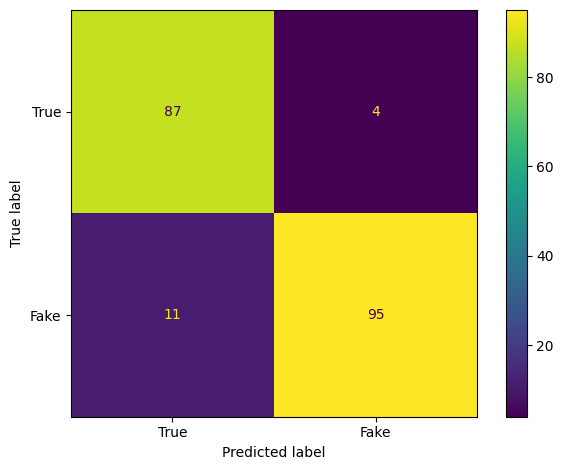

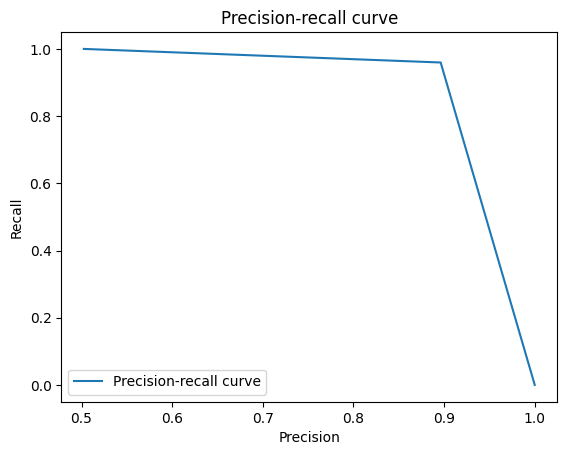

In [22]:
model_tunning = KerasClassifier(build_fn = create_model_tunning , learning_rate = 0.01,  activation= 'relu')
params = {
    'batch_size': [16, 32, 64],
    'epochs': [10, 50, 100],
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.001, 0.01, 0.1],
    'optimizer': ['adam', 'sgd'],
}

# Use GridSearchCV for hyperparameter tuning
grid = GridSearchCV(estimator=model_tunning, param_grid=params, n_jobs = -1, cv=5, error_score='raise')
grid_result = grid.fit(X3_train_scaled, y3_train)

# Summarize results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y3_pred = best_model.predict(X3_test)
accuracy = accuracy_score(y3_test, y3_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
evaluation_metrices(X3_test_scaled, y3_test, best_model)

Here we have used hyperparameter tunning to find out what parameters leads to higher accuracy. From this, we found out that, we can get 92% accuracy using activation': 'relu', 'batch_size': 64, 'epochs': 10, 'learning_rate': 0.01, 'optimizer': 'sgd'

In [29]:
!pip install shap tensorflow


# Using Shap for model interpretability

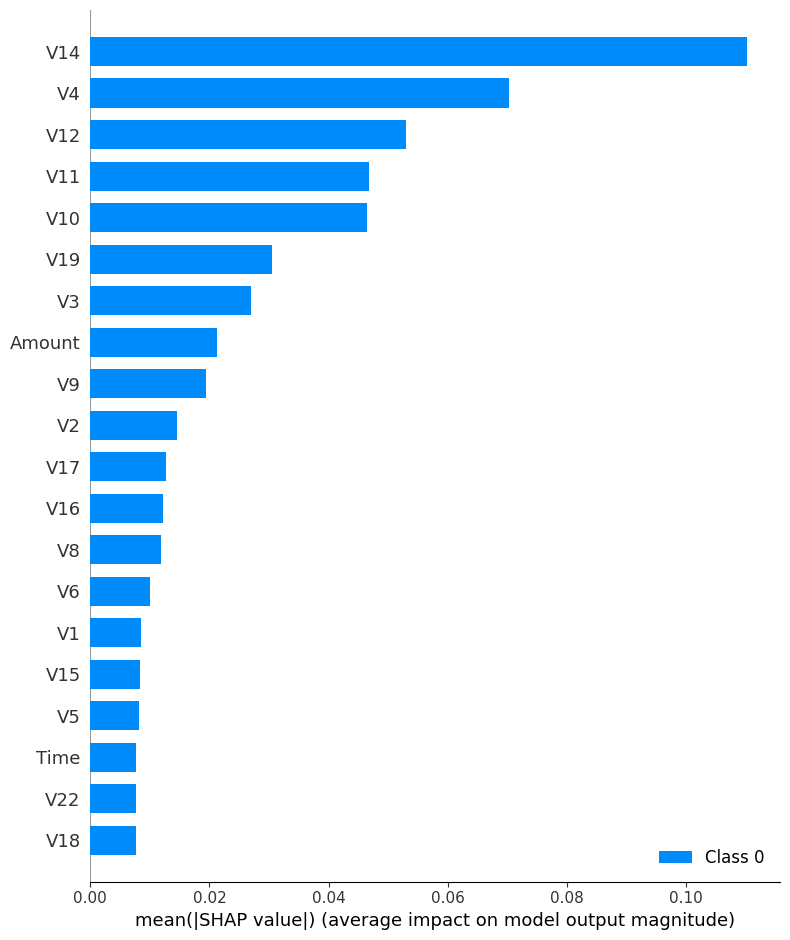

In [33]:
import shap
# Select a subset of the data to explain
X_explain = X3_train_scaled[np.random.choice(X3_train_scaled.shape[0], 100, replace=False)]

# Initialize the SHAP explainer with the trained Keras model
explainer = shap.DeepExplainer(model3, X_explain)

# Calculate SHAP values
shap_values = explainer.shap_values(X_explain)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_explain, feature_names = X3_train.columns)

# Question no 2
**Implement a function to explain the AI model's decisions using a model interpretability method
(e.g., SHAP, LIME). Briefly explain your chosen method and provide a use case where this
method can effectively improve model transparency and accountability.**

Here, above graph represents which feature is most important for predicting the credit card fault analysis. Since the datasets we have are the output of dimensionality reduction, from this graph we can see that, V14 features are the most important for predicting the fault analysis. SHAP summary plot visualizes the SHAP values to understand feature importance and the impact of each feature on model predictions

**Use case of SHAP:**
* Generally, we treat the deep learning models as a black box. We don't know which features are important
* Let's take an example of a Bank Loan Approval System. We feed the details about age, location, salary, and other financial metrics. Some customers may be unsure why their loans are rejected. So, if he/she wants to understand why the loan is denied, we can use the SHAP plot to describe the contributing features for loan approval or rejection.

# Question no 3

**Q1 - Part3 -> Please briefly explain how you handled any class imbalance, missing values, or other pre-processing requirements.**

Ans -> In this project, the class imbalance is handled using downsampling. There is no missing value in the datasets. If there is some missing value in a record, then we can handle that missing value with the following techniques
    1. Dropping the record with missing values
    2. Imputation of (mean, median, mode) of that column

Other Preprocessing includes the Normalization using StandardScaler. Many deep learning models perform well on the normalized training datasets.

If there is a large number of features, we can use principle component analysis (PCA) or other dimensionality reduction techniques to reduce the number of features without reducing the actual details.
If there are any other categorical values, we can convert those categorical values into numerical values. This includes one-hot encoding algorithm, Binary encoding, etc

# Question no 4

**Given a set of performance metrics from your AI model (e.g., precision, recall, F1 score), how
would you analyze and interpret these results? What conclusions can you draw about the model’s
effectiveness, its potential biases, and areas of improvement?**

Ans: 
* Precision: How much predicted positive was actually correct. (TP/(TP+FP))
* Recall : How much predicted positive is there over all positive. (TP/(TP+FN))
* Accuracy : How much is correctly predicted from overall data. ((TP+TN)/(TP+TN+FP+FN))

**Analyzing the metrices:**
* High Precision and Low Recall : fewer false positive, and missing many actual positive
* Low Precision and High Recall : Captures Actual positive but missing false positive
* High F1 value : Good balance between data.

**Model Effectiveness:**
* High f1 score (Greater area under F1 curve)
* For imbalanced data, f1 score is used to define the model accuracy
* If there is high accuracy but lower F1 score, then the model is biased towards the one of the class.
* Excessive number of FP and FN indicate the ineffective model.

**Increasing model performance:**
* Balanced dataset and reduce bias
* Adjusting hyperparameters to improve performance
* Apply normalization to increase the model performance, as every features has same range of data.
